[Fashion-mnist dataset sit] (https://www.kaggle.com/zalando-research/fashionmnist/data/)

### Data preprocessing

In [6]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

DATA_ROOT_DIR = '/media/yinyunjie/WD_HDD/dataSets/fashion-mnist/data/fashionmnist'

train_data = pd.read_csv(DATA_ROOT_DIR + '/fashion-mnist_train.csv')
test_data = pd.read_csv(DATA_ROOT_DIR + '/fashion-mnist_test.csv')

num_classes = 10
img_rows, img_cols, img_channels = 28, 28, 1
input_shape = (img_rows, img_cols, img_channels)

# train data (pixels)
X = np.array(train_data.iloc[:, 1:])
# label
y = to_categorical(train_data.iloc[:, 0])

# split into train and val set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# test
X_test = np.array(test_data.iloc[:, 1:])
y_test = to_categorical(np.array(test_data.iloc[:, 0]))

# reshape data
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

# normalization
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.

### CNN Model

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_model_six_conv(input_shape):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', 
                     kernel_initializer='he_normal', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model
    

In [9]:
batch_size = 256
epochs = 30

model = create_model_six_conv((img_rows, img_cols, img_channels))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

### Training

In [10]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30


  256/48000 [..............................] - ETA: 6:08 - loss: 2.3296 - acc: 0.0938

  512/48000 [..............................] - ETA: 4:29 - loss: 2.3336 - acc: 0.1074

  768/48000 [..............................] - ETA: 3:49 - loss: 2.3189 - acc: 0.1146

 1024/48000 [..............................] - ETA: 3:28 - loss: 2.3072 - acc: 0.1162

 1280/48000 [..............................] - ETA: 3:14 - loss: 2.2953 - acc: 0.1203

 1536/48000 [..............................] - ETA: 3:05 - loss: 2.2828 - acc: 0.1309

 1792/48000 [>.............................] - ETA: 2:59 - loss: 2.2695 - acc: 0.1423

 2048/48000 [>.............................] - ETA: 2:53 - loss: 2.2572 - acc: 0.1504

 2304/48000 [>.............................] - ETA: 2:49 - loss: 2.2330 - acc: 0.1727

 2560/48000 [>.............................] - ETA: 2:45 - loss: 2.2071 - acc: 0.1863

 2816/48000 [>.............................] - ETA: 2:42 - loss: 2.1738 - acc: 0.1971

 3072/48000 [>.............................] - ETA: 2:39 - loss: 2.1418 - acc: 0.2090

 3328/48000 [=>............................] - ETA: 2:37 - loss: 2.1147 - acc: 0.2188

 3584/48000 [=>............................] - ETA: 2:35 - loss: 2.0852 - acc: 0.2299

 3840/48000 [=>............................] - ETA: 2:33 - loss: 2.0544 - acc: 0.2396

 4096/48000 [=>............................] - ETA: 2:31 - loss: 2.0285 - acc: 0.2480

 4352/48000 [=>............................] - ETA: 2:29 - loss: 1.9968 - acc: 0.2574

 4608/48000 [=>............................] - ETA: 2:27 - loss: 1.9713 - acc: 0.2652

 4864/48000 [==>...........................] - ETA: 2:26 - loss: 1.9462 - acc: 0.2745

 5120/48000 [==>...........................] - ETA: 2:25 - loss: 1.9269 - acc: 0.2824

 5376/48000 [==>...........................] - ETA: 2:23 - loss: 1.9012 - acc: 0.2915

 5632/48000 [==>...........................] - ETA: 2:22 - loss: 1.8807 - acc: 0.3018

 5888/48000 [==>...........................] - ETA: 2:21 - loss: 1.8627 - acc: 0.3081

 6144/48000 [==>...........................] - ETA: 2:19 - loss: 1.8372 - acc: 0.3154

 6400/48000 [===>..........................] - ETA: 2:18 - loss: 1.8170 - acc: 0.3219

 6656/48000 [===>..........................] - ETA: 2:17 - loss: 1.7993 - acc: 0.3271

 6912/48000 [===>..........................] - ETA: 2:16 - loss: 1.7798 - acc: 0.3335

 7168/48000 [===>..........................] - ETA: 2:15 - loss: 1.7630 - acc: 0.3410

 7424/48000 [===>..........................] - ETA: 2:13 - loss: 1.7382 - acc: 0.3504

 7680/48000 [===>..........................] - ETA: 2:12 - loss: 1.7194 - acc: 0.3586

 7936/48000 [===>..........................] - ETA: 2:11 - loss: 1.6986 - acc: 0.3661

 8192/48000 [====>.........................] - ETA: 2:10 - loss: 1.6803 - acc: 0.3741

 8448/48000 [====>.........................] - ETA: 2:09 - loss: 1.6626 - acc: 0.3826

 8704/48000 [====>.........................] - ETA: 2:08 - loss: 1.6443 - acc: 0.3901

 8960/48000 [====>.........................] - ETA: 2:07 - loss: 1.6249 - acc: 0.3969

 9216/48000 [====>.........................] - ETA: 2:06 - loss: 1.6067 - acc: 0.4036

 9472/48000 [====>.........................] - ETA: 2:05 - loss: 1.5886 - acc: 0.4098

 9728/48000 [=====>........................] - ETA: 2:05 - loss: 1.5750 - acc: 0.4154

 9984/48000 [=====>........................] - ETA: 2:04 - loss: 1.5587 - acc: 0.4205

10240/48000 [=====>........................] - ETA: 2:03 - loss: 1.5443 - acc: 0.4260

10496/48000 [=====>........................] - ETA: 2:02 - loss: 1.5280 - acc: 0.4322

10752/48000 [=====>........................] - ETA: 2:01 - loss: 1.5129 - acc: 0.4375

11008/48000 [=====>........................] - ETA: 2:00 - loss: 1.5028 - acc: 0.4423

11264/48000 [======>.......................] - ETA: 1:59 - loss: 1.4889 - acc: 0.4489

11520/48000 [======>.......................] - ETA: 1:58 - loss: 1.4778 - acc: 0.4534

11776/48000 [======>.......................] - ETA: 1:57 - loss: 1.4677 - acc: 0.4571

12032/48000 [======>.......................] - ETA: 1:56 - loss: 1.4571 - acc: 0.4616

12288/48000 [======>.......................] - ETA: 1:55 - loss: 1.4471 - acc: 0.4662

12544/48000 [======>.......................] - ETA: 1:54 - loss: 1.4378 - acc: 0.4699

12800/48000 [=======>......................] - ETA: 1:53 - loss: 1.4288 - acc: 0.4736

13056/48000 [=======>......................] - ETA: 1:52 - loss: 1.4171 - acc: 0.4782

13312/48000 [=======>......................] - ETA: 1:51 - loss: 1.4059 - acc: 0.4825

13568/48000 [=======>......................] - ETA: 1:51 - loss: 1.3982 - acc: 0.4863

13824/48000 [=======>......................] - ETA: 1:50 - loss: 1.3890 - acc: 0.4896

14080/48000 [=======>......................] - ETA: 1:49 - loss: 1.3790 - acc: 0.4931

14336/48000 [=======>......................] - ETA: 1:48 - loss: 1.3692 - acc: 0.4969

14592/48000 [========>.....................] - ETA: 1:47 - loss: 1.3602 - acc: 0.5001

14848/48000 [========>.....................] - ETA: 1:46 - loss: 1.3502 - acc: 0.5039

15104/48000 [========>.....................] - ETA: 1:45 - loss: 1.3401 - acc: 0.5080

15360/48000 [========>.....................] - ETA: 1:45 - loss: 1.3316 - acc: 0.5116

15616/48000 [========>.....................] - ETA: 1:44 - loss: 1.3241 - acc: 0.5144

15872/48000 [========>.....................] - ETA: 1:43 - loss: 1.3173 - acc: 0.5168

16128/48000 [=========>....................] - ETA: 1:42 - loss: 1.3108 - acc: 0.5195

16384/48000 [=========>....................] - ETA: 1:41 - loss: 1.3028 - acc: 0.5225

16640/48000 [=========>....................] - ETA: 1:40 - loss: 1.2966 - acc: 0.5249

16896/48000 [=========>....................] - ETA: 1:39 - loss: 1.2883 - acc: 0.5286

17152/48000 [=========>....................] - ETA: 1:38 - loss: 1.2806 - acc: 0.5313

17408/48000 [=========>....................] - ETA: 1:38 - loss: 1.2725 - acc: 0.5340

17664/48000 [==========>...................] - ETA: 1:37 - loss: 1.2661 - acc: 0.5367

17920/48000 [==========>...................] - ETA: 1:36 - loss: 1.2577 - acc: 0.5394

18176/48000 [==========>...................] - ETA: 1:35 - loss: 1.2524 - acc: 0.5411

18432/48000 [==========>...................] - ETA: 1:34 - loss: 1.2455 - acc: 0.5434

18688/48000 [==========>...................] - ETA: 1:33 - loss: 1.2387 - acc: 0.5462

18944/48000 [==========>...................] - ETA: 1:33 - loss: 1.2328 - acc: 0.5487

19200/48000 [===========>..................] - ETA: 1:32 - loss: 1.2272 - acc: 0.5507

19456/48000 [===========>..................] - ETA: 1:31 - loss: 1.2210 - acc: 0.5529

19712/48000 [===========>..................] - ETA: 1:30 - loss: 1.2156 - acc: 0.5551

19968/48000 [===========>..................] - ETA: 1:29 - loss: 1.2105 - acc: 0.5572

20224/48000 [===========>..................] - ETA: 1:28 - loss: 1.2055 - acc: 0.5590

20480/48000 [===========>..................] - ETA: 1:27 - loss: 1.1986 - acc: 0.5612

20736/48000 [===========>..................] - ETA: 1:27 - loss: 1.1931 - acc: 0.5634

20992/48000 [============>.................] - ETA: 1:26 - loss: 1.1885 - acc: 0.5650

21248/48000 [============>.................] - ETA: 1:25 - loss: 1.1847 - acc: 0.5660

21504/48000 [============>.................] - ETA: 1:24 - loss: 1.1791 - acc: 0.5679

21760/48000 [============>.................] - ETA: 1:23 - loss: 1.1741 - acc: 0.5697

22016/48000 [============>.................] - ETA: 1:22 - loss: 1.1699 - acc: 0.5711

22272/48000 [============>.................] - ETA: 1:22 - loss: 1.1645 - acc: 0.5731

22528/48000 [=============>................] - ETA: 1:21 - loss: 1.1602 - acc: 0.5750

22784/48000 [=============>................] - ETA: 1:20 - loss: 1.1554 - acc: 0.5765

23040/48000 [=============>................] - ETA: 1:19 - loss: 1.1519 - acc: 0.5780

23296/48000 [=============>................] - ETA: 1:18 - loss: 1.1477 - acc: 0.5796

23552/48000 [=============>................] - ETA: 1:17 - loss: 1.1458 - acc: 0.5805

23808/48000 [=============>................] - ETA: 1:17 - loss: 1.1407 - acc: 0.5827

24064/48000 [==============>...............] - ETA: 1:16 - loss: 1.1366 - acc: 0.5845

24320/48000 [==============>...............] - ETA: 1:15 - loss: 1.1326 - acc: 0.5861

24576/48000 [==============>...............] - ETA: 1:14 - loss: 1.1283 - acc: 0.5874

24832/48000 [==============>...............] - ETA: 1:13 - loss: 1.1250 - acc: 0.5887

25088/48000 [==============>...............] - ETA: 1:12 - loss: 1.1219 - acc: 0.5898

25344/48000 [==============>...............] - ETA: 1:12 - loss: 1.1179 - acc: 0.5916

25600/48000 [===============>..............] - ETA: 1:11 - loss: 1.1130 - acc: 0.5931

25856/48000 [===============>..............] - ETA: 1:10 - loss: 1.1081 - acc: 0.5951

26112/48000 [===============>..............] - ETA: 1:09 - loss: 1.1031 - acc: 0.5968

26368/48000 [===============>..............] - ETA: 1:08 - loss: 1.0997 - acc: 0.5987

26624/48000 [===============>..............] - ETA: 1:07 - loss: 1.0962 - acc: 0.5999

26880/48000 [===============>..............] - ETA: 1:07 - loss: 1.0929 - acc: 0.6009

27136/48000 [===============>..............] - ETA: 1:06 - loss: 1.0903 - acc: 0.6019

27392/48000 [================>.............] - ETA: 1:05 - loss: 1.0878 - acc: 0.6029

27648/48000 [================>.............] - ETA: 1:04 - loss: 1.0850 - acc: 0.6040

27904/48000 [================>.............] - ETA: 1:03 - loss: 1.0810 - acc: 0.6055

28160/48000 [================>.............] - ETA: 1:02 - loss: 1.0766 - acc: 0.6070

28416/48000 [================>.............] - ETA: 1:02 - loss: 1.0734 - acc: 0.6081

28672/48000 [================>.............] - ETA: 1:01 - loss: 1.0698 - acc: 0.6093

28928/48000 [=================>............] - ETA: 1:00 - loss: 1.0669 - acc: 0.6106

29184/48000 [=================>............] - ETA: 59s - loss: 1.0645 - acc: 0.6115 

29440/48000 [=================>............] - ETA: 58s - loss: 1.0606 - acc: 0.6129

29696/48000 [=================>............] - ETA: 58s - loss: 1.0574 - acc: 0.6141

29952/48000 [=================>............] - ETA: 57s - loss: 1.0534 - acc: 0.6155

30208/48000 [=================>............] - ETA: 56s - loss: 1.0497 - acc: 0.6167

30464/48000 [==================>...........] - ETA: 55s - loss: 1.0478 - acc: 0.6175

30720/48000 [==================>...........] - ETA: 54s - loss: 1.0447 - acc: 0.6184

30976/48000 [==================>...........] - ETA: 53s - loss: 1.0411 - acc: 0.6197

31232/48000 [==================>...........] - ETA: 53s - loss: 1.0376 - acc: 0.6210

31488/48000 [==================>...........] - ETA: 52s - loss: 1.0348 - acc: 0.6221

31744/48000 [==================>...........] - ETA: 51s - loss: 1.0320 - acc: 0.6231

32000/48000 [===================>..........] - ETA: 50s - loss: 1.0291 - acc: 0.6241

32256/48000 [===================>..........] - ETA: 49s - loss: 1.0263 - acc: 0.6254

32512/48000 [===================>..........] - ETA: 49s - loss: 1.0237 - acc: 0.6265

32768/48000 [===================>..........] - ETA: 48s - loss: 1.0202 - acc: 0.6277

33024/48000 [===================>..........] - ETA: 47s - loss: 1.0180 - acc: 0.6285

33280/48000 [===================>..........] - ETA: 46s - loss: 1.0148 - acc: 0.6297

33536/48000 [===================>..........] - ETA: 45s - loss: 1.0116 - acc: 0.6308

33792/48000 [====================>.........] - ETA: 44s - loss: 1.0085 - acc: 0.6317

34048/48000 [====================>.........] - ETA: 44s - loss: 1.0054 - acc: 0.6330

34304/48000 [====================>.........] - ETA: 43s - loss: 1.0043 - acc: 0.6336

34560/48000 [====================>.........] - ETA: 42s - loss: 1.0013 - acc: 0.6348

34816/48000 [====================>.........] - ETA: 41s - loss: 0.9982 - acc: 0.6360

35072/48000 [====================>.........] - ETA: 40s - loss: 0.9968 - acc: 0.6366

35328/48000 [=====================>........] - ETA: 40s - loss: 0.9950 - acc: 0.6373

35584/48000 [=====================>........] - ETA: 39s - loss: 0.9929 - acc: 0.6380

35840/48000 [=====================>........] - ETA: 38s - loss: 0.9904 - acc: 0.6388

36096/48000 [=====================>........] - ETA: 37s - loss: 0.9888 - acc: 0.6397

36352/48000 [=====================>........] - ETA: 36s - loss: 0.9870 - acc: 0.6403

36608/48000 [=====================>........] - ETA: 36s - loss: 0.9840 - acc: 0.6416

36864/48000 [======================>.......] - ETA: 35s - loss: 0.9825 - acc: 0.6421

37120/48000 [======================>.......] - ETA: 34s - loss: 0.9802 - acc: 0.6427

37376/48000 [======================>.......] - ETA: 33s - loss: 0.9772 - acc: 0.6439

37632/48000 [======================>.......] - ETA: 32s - loss: 0.9743 - acc: 0.6450

37888/48000 [======================>.......] - ETA: 31s - loss: 0.9718 - acc: 0.6458

38144/48000 [======================>.......] - ETA: 31s - loss: 0.9699 - acc: 0.6464

38400/48000 [=======================>......] - ETA: 30s - loss: 0.9667 - acc: 0.6475

38656/48000 [=======================>......] - ETA: 29s - loss: 0.9644 - acc: 0.6482

38912/48000 [=======================>......] - ETA: 28s - loss: 0.9623 - acc: 0.6490

39168/48000 [=======================>......] - ETA: 27s - loss: 0.9608 - acc: 0.6497

39424/48000 [=======================>......] - ETA: 27s - loss: 0.9589 - acc: 0.6502

39680/48000 [=======================>......] - ETA: 26s - loss: 0.9567 - acc: 0.6507

39936/48000 [=======================>......] - ETA: 25s - loss: 0.9540 - acc: 0.6516

40192/48000 [========================>.....] - ETA: 24s - loss: 0.9511 - acc: 0.6527

40448/48000 [========================>.....] - ETA: 23s - loss: 0.9485 - acc: 0.6536

40704/48000 [========================>.....] - ETA: 23s - loss: 0.9468 - acc: 0.6542

40960/48000 [========================>.....] - ETA: 22s - loss: 0.9448 - acc: 0.6550

41216/48000 [========================>.....] - ETA: 21s - loss: 0.9431 - acc: 0.6553

41472/48000 [========================>.....] - ETA: 20s - loss: 0.9414 - acc: 0.6561

41728/48000 [=========================>....] - ETA: 19s - loss: 0.9397 - acc: 0.6567

41984/48000 [=========================>....] - ETA: 18s - loss: 0.9374 - acc: 0.6575

42240/48000 [=========================>....] - ETA: 18s - loss: 0.9347 - acc: 0.6586

42496/48000 [=========================>....] - ETA: 17s - loss: 0.9324 - acc: 0.6595

42752/48000 [=========================>....] - ETA: 16s - loss: 0.9301 - acc: 0.6603

43008/48000 [=========================>....] - ETA: 15s - loss: 0.9279 - acc: 0.6613

43264/48000 [==========================>...] - ETA: 14s - loss: 0.9261 - acc: 0.6621

43520/48000 [==========================>...] - ETA: 14s - loss: 0.9246 - acc: 0.6628

43776/48000 [==========================>...] - ETA: 13s - loss: 0.9231 - acc: 0.6634

44032/48000 [==========================>...] - ETA: 12s - loss: 0.9209 - acc: 0.6641

44288/48000 [==========================>...] - ETA: 11s - loss: 0.9189 - acc: 0.6647

44544/48000 [==========================>...] - ETA: 10s - loss: 0.9174 - acc: 0.6655

44800/48000 [===========================>..] - ETA: 10s - loss: 0.9157 - acc: 0.6660

45056/48000 [===========================>..] - ETA: 9s - loss: 0.9134 - acc: 0.6667 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.9118 - acc: 0.6674

45568/48000 [===========================>..] - ETA: 7s - loss: 0.9103 - acc: 0.6679

45824/48000 [===========================>..] - ETA: 6s - loss: 0.9081 - acc: 0.6686

46080/48000 [===========================>..] - ETA: 6s - loss: 0.9063 - acc: 0.6693

46336/48000 [===========================>..] - ETA: 5s - loss: 0.9048 - acc: 0.6700

46592/48000 [============================>.] - ETA: 4s - loss: 0.9031 - acc: 0.6707

46848/48000 [============================>.] - ETA: 3s - loss: 0.9013 - acc: 0.6714

47104/48000 [============================>.] - ETA: 2s - loss: 0.8992 - acc: 0.6722

47360/48000 [============================>.] - ETA: 2s - loss: 0.8973 - acc: 0.6730

47616/48000 [============================>.] - ETA: 1s - loss: 0.8960 - acc: 0.6735

47872/48000 [============================>.] - ETA: 0s - loss: 0.8945 - acc: 0.6740

48000/48000 [==============================] - 162s 3ms/step - loss: 0.8938 - acc: 0.6743 - val_loss: 0.4818 - val_acc: 0.8198


Epoch 2/30


  256/48000 [..............................] - ETA: 2:31 - loss: 0.4977 - acc: 0.8008

  512/48000 [..............................] - ETA: 2:29 - loss: 0.5108 - acc: 0.7988

  768/48000 [..............................] - ETA: 2:28 - loss: 0.5523 - acc: 0.7812

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.5675 - acc: 0.7783

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.5759 - acc: 0.7781

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.5659 - acc: 0.7858

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.5673 - acc: 0.7868

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.5689 - acc: 0.7876

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.5611 - acc: 0.7899

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.5528 - acc: 0.7941

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.5491 - acc: 0.7983

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.5506 - acc: 0.7992

 3328/48000 [=>............................] - ETA: 2:20 - loss: 0.5616 - acc: 0.7951

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.5677 - acc: 0.7932

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.5674 - acc: 0.7919

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.5587 - acc: 0.7947

 4352/48000 [=>............................] - ETA: 2:17 - loss: 0.5614 - acc: 0.7941

 4608/48000 [=>............................] - ETA: 2:16 - loss: 0.5599 - acc: 0.7938

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.5649 - acc: 0.7921

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.5619 - acc: 0.7928

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.5591 - acc: 0.7939

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.5603 - acc: 0.7933

 5888/48000 [==>...........................] - ETA: 2:12 - loss: 0.5567 - acc: 0.7942

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.5594 - acc: 0.7930

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.5576 - acc: 0.7937

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.5609 - acc: 0.7925

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.5610 - acc: 0.7918

 7168/48000 [===>..........................] - ETA: 2:08 - loss: 0.5602 - acc: 0.7927

 7424/48000 [===>..........................] - ETA: 2:07 - loss: 0.5624 - acc: 0.7918

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.5607 - acc: 0.7926

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.5607 - acc: 0.7926

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.5562 - acc: 0.7944

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.5553 - acc: 0.7950

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.5544 - acc: 0.7950

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.5553 - acc: 0.7943

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.5523 - acc: 0.7952

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.5508 - acc: 0.7965

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.5544 - acc: 0.7953

 9984/48000 [=====>........................] - ETA: 1:59 - loss: 0.5544 - acc: 0.7961

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.5516 - acc: 0.7974

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.5494 - acc: 0.7974

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.5475 - acc: 0.7981

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.5469 - acc: 0.7985

11264/48000 [======>.......................] - ETA: 1:55 - loss: 0.5466 - acc: 0.7983

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.5457 - acc: 0.7990

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.5429 - acc: 0.8003

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.5428 - acc: 0.8008

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.5429 - acc: 0.8010

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.5418 - acc: 0.8017

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.5415 - acc: 0.8023

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.5415 - acc: 0.8027

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.5408 - acc: 0.8028

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.5401 - acc: 0.8034

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.5410 - acc: 0.8029

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.5403 - acc: 0.8034

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.5405 - acc: 0.8033

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.5415 - acc: 0.8030

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.5408 - acc: 0.8030

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.5426 - acc: 0.8020

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.5436 - acc: 0.8019

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.5446 - acc: 0.8014

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.5443 - acc: 0.8012

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.5443 - acc: 0.8012

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.5441 - acc: 0.8013

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.5432 - acc: 0.8016

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.5414 - acc: 0.8024

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.5406 - acc: 0.8027

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.5409 - acc: 0.8026

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.5396 - acc: 0.8030

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.5381 - acc: 0.8036

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.5378 - acc: 0.8035

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.5376 - acc: 0.8034

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.5376 - acc: 0.8031

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.5380 - acc: 0.8031

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.5361 - acc: 0.8039

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.5349 - acc: 0.8044

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.5349 - acc: 0.8045

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.5338 - acc: 0.8050

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.5336 - acc: 0.8051

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.5354 - acc: 0.8049

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.5360 - acc: 0.8047

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.5351 - acc: 0.8050

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.5342 - acc: 0.8053

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.5325 - acc: 0.8059

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.5324 - acc: 0.8059

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.5325 - acc: 0.8057

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.5322 - acc: 0.8057

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.5316 - acc: 0.8061

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.5316 - acc: 0.8062

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.5310 - acc: 0.8066

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.5303 - acc: 0.8066

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.5304 - acc: 0.8069

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.5307 - acc: 0.8070

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.5293 - acc: 0.8076

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.5303 - acc: 0.8075

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.5292 - acc: 0.8080

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.5289 - acc: 0.8086

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.5282 - acc: 0.8089

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.5276 - acc: 0.8093

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.5282 - acc: 0.8089

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.5281 - acc: 0.8088

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.5291 - acc: 0.8086

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.5286 - acc: 0.8087

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.5288 - acc: 0.8086

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.5280 - acc: 0.8089

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.5273 - acc: 0.8094

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.5268 - acc: 0.8096

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.5263 - acc: 0.8098

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.5256 - acc: 0.8101

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.5255 - acc: 0.8100

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.5260 - acc: 0.8100

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.5250 - acc: 0.8103

28928/48000 [=================>............] - ETA: 59s - loss: 0.5242 - acc: 0.8106 

29184/48000 [=================>............] - ETA: 58s - loss: 0.5237 - acc: 0.8109

29440/48000 [=================>............] - ETA: 58s - loss: 0.5234 - acc: 0.8108

29696/48000 [=================>............] - ETA: 57s - loss: 0.5225 - acc: 0.8110

29952/48000 [=================>............] - ETA: 56s - loss: 0.5227 - acc: 0.8110

30208/48000 [=================>............] - ETA: 55s - loss: 0.5220 - acc: 0.8111

30464/48000 [==================>...........] - ETA: 54s - loss: 0.5208 - acc: 0.8115

30720/48000 [==================>...........] - ETA: 54s - loss: 0.5202 - acc: 0.8116

30976/48000 [==================>...........] - ETA: 53s - loss: 0.5198 - acc: 0.8116

31232/48000 [==================>...........] - ETA: 52s - loss: 0.5194 - acc: 0.8117

31488/48000 [==================>...........] - ETA: 51s - loss: 0.5194 - acc: 0.8118

31744/48000 [==================>...........] - ETA: 50s - loss: 0.5190 - acc: 0.8119

32000/48000 [===================>..........] - ETA: 50s - loss: 0.5183 - acc: 0.8121

32256/48000 [===================>..........] - ETA: 49s - loss: 0.5184 - acc: 0.8120

32512/48000 [===================>..........] - ETA: 48s - loss: 0.5176 - acc: 0.8124

32768/48000 [===================>..........] - ETA: 47s - loss: 0.5176 - acc: 0.8123

33024/48000 [===================>..........] - ETA: 46s - loss: 0.5168 - acc: 0.8126

33280/48000 [===================>..........] - ETA: 46s - loss: 0.5167 - acc: 0.8127

33536/48000 [===================>..........] - ETA: 45s - loss: 0.5160 - acc: 0.8130

33792/48000 [====================>.........] - ETA: 44s - loss: 0.5164 - acc: 0.8132

34048/48000 [====================>.........] - ETA: 43s - loss: 0.5157 - acc: 0.8134

34304/48000 [====================>.........] - ETA: 42s - loss: 0.5157 - acc: 0.8135

34560/48000 [====================>.........] - ETA: 42s - loss: 0.5159 - acc: 0.8135

34816/48000 [====================>.........] - ETA: 41s - loss: 0.5157 - acc: 0.8136

35072/48000 [====================>.........] - ETA: 40s - loss: 0.5153 - acc: 0.8138

35328/48000 [=====================>........] - ETA: 39s - loss: 0.5150 - acc: 0.8137

35584/48000 [=====================>........] - ETA: 38s - loss: 0.5148 - acc: 0.8138

35840/48000 [=====================>........] - ETA: 38s - loss: 0.5150 - acc: 0.8136

36096/48000 [=====================>........] - ETA: 37s - loss: 0.5152 - acc: 0.8135

36352/48000 [=====================>........] - ETA: 36s - loss: 0.5145 - acc: 0.8138

36608/48000 [=====================>........] - ETA: 35s - loss: 0.5150 - acc: 0.8136

36864/48000 [======================>.......] - ETA: 34s - loss: 0.5146 - acc: 0.8139

37120/48000 [======================>.......] - ETA: 34s - loss: 0.5143 - acc: 0.8141

37376/48000 [======================>.......] - ETA: 33s - loss: 0.5130 - acc: 0.8147

37632/48000 [======================>.......] - ETA: 32s - loss: 0.5134 - acc: 0.8149

37888/48000 [======================>.......] - ETA: 31s - loss: 0.5133 - acc: 0.8151

38144/48000 [======================>.......] - ETA: 30s - loss: 0.5130 - acc: 0.8153

38400/48000 [=======================>......] - ETA: 30s - loss: 0.5136 - acc: 0.8151

38656/48000 [=======================>......] - ETA: 29s - loss: 0.5133 - acc: 0.8151

38912/48000 [=======================>......] - ETA: 28s - loss: 0.5125 - acc: 0.8155

39168/48000 [=======================>......] - ETA: 27s - loss: 0.5125 - acc: 0.8155

39424/48000 [=======================>......] - ETA: 26s - loss: 0.5125 - acc: 0.8155

39680/48000 [=======================>......] - ETA: 26s - loss: 0.5117 - acc: 0.8158

39936/48000 [=======================>......] - ETA: 25s - loss: 0.5116 - acc: 0.8158

40192/48000 [========================>.....] - ETA: 24s - loss: 0.5112 - acc: 0.8157

40448/48000 [========================>.....] - ETA: 23s - loss: 0.5106 - acc: 0.8160

40704/48000 [========================>.....] - ETA: 22s - loss: 0.5106 - acc: 0.8162

40960/48000 [========================>.....] - ETA: 22s - loss: 0.5106 - acc: 0.8160

41216/48000 [========================>.....] - ETA: 21s - loss: 0.5096 - acc: 0.8163

41472/48000 [========================>.....] - ETA: 20s - loss: 0.5094 - acc: 0.8165

41728/48000 [=========================>....] - ETA: 19s - loss: 0.5091 - acc: 0.8167

41984/48000 [=========================>....] - ETA: 18s - loss: 0.5090 - acc: 0.8167

42240/48000 [=========================>....] - ETA: 18s - loss: 0.5088 - acc: 0.8166

42496/48000 [=========================>....] - ETA: 17s - loss: 0.5080 - acc: 0.8169

42752/48000 [=========================>....] - ETA: 16s - loss: 0.5075 - acc: 0.8170

43008/48000 [=========================>....] - ETA: 15s - loss: 0.5066 - acc: 0.8174

43264/48000 [==========================>...] - ETA: 14s - loss: 0.5061 - acc: 0.8175

43520/48000 [==========================>...] - ETA: 14s - loss: 0.5058 - acc: 0.8177

43776/48000 [==========================>...] - ETA: 13s - loss: 0.5057 - acc: 0.8178

44032/48000 [==========================>...] - ETA: 12s - loss: 0.5056 - acc: 0.8179

44288/48000 [==========================>...] - ETA: 11s - loss: 0.5052 - acc: 0.8181

44544/48000 [==========================>...] - ETA: 10s - loss: 0.5053 - acc: 0.8182

44800/48000 [===========================>..] - ETA: 10s - loss: 0.5056 - acc: 0.8180

45056/48000 [===========================>..] - ETA: 9s - loss: 0.5052 - acc: 0.8181 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.5045 - acc: 0.8183

45568/48000 [===========================>..] - ETA: 7s - loss: 0.5044 - acc: 0.8184

45824/48000 [===========================>..] - ETA: 6s - loss: 0.5042 - acc: 0.8185

46080/48000 [===========================>..] - ETA: 6s - loss: 0.5038 - acc: 0.8187

46336/48000 [===========================>..] - ETA: 5s - loss: 0.5036 - acc: 0.8188

46592/48000 [============================>.] - ETA: 4s - loss: 0.5035 - acc: 0.8188

46848/48000 [============================>.] - ETA: 3s - loss: 0.5031 - acc: 0.8189

47104/48000 [============================>.] - ETA: 2s - loss: 0.5022 - acc: 0.8192

47360/48000 [============================>.] - ETA: 1s - loss: 0.5022 - acc: 0.8192

47616/48000 [============================>.] - ETA: 1s - loss: 0.5018 - acc: 0.8192

47872/48000 [============================>.] - ETA: 0s - loss: 0.5017 - acc: 0.8192

48000/48000 [==============================] - 161s 3ms/step - loss: 0.5016 - acc: 0.8193 - val_loss: 0.3704 - val_acc: 0.8634


Epoch 3/30


  256/48000 [..............................] - ETA: 2:33 - loss: 0.3982 - acc: 0.8633

  512/48000 [..............................] - ETA: 2:30 - loss: 0.4255 - acc: 0.8496

  768/48000 [..............................] - ETA: 2:28 - loss: 0.4464 - acc: 0.8385

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.4268 - acc: 0.8486

 1280/48000 [..............................] - ETA: 2:27 - loss: 0.4303 - acc: 0.8469

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.4244 - acc: 0.8509

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.4096 - acc: 0.8571

 2048/48000 [>.............................] - ETA: 2:24 - loss: 0.4179 - acc: 0.8540

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.4230 - acc: 0.8546

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.4223 - acc: 0.8551

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.4175 - acc: 0.8580

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.4145 - acc: 0.8581

 3328/48000 [=>............................] - ETA: 2:20 - loss: 0.4245 - acc: 0.8534

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.4271 - acc: 0.8530

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.4227 - acc: 0.8547

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.4240 - acc: 0.8533

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.4194 - acc: 0.8550

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.4245 - acc: 0.8516

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.4292 - acc: 0.8507

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.4287 - acc: 0.8496

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.4296 - acc: 0.8499

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.4329 - acc: 0.8494

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.4330 - acc: 0.8487

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.4291 - acc: 0.8494

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.4275 - acc: 0.8497

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.4273 - acc: 0.8487

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.4286 - acc: 0.8484

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.4274 - acc: 0.8491

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.4269 - acc: 0.8486

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.4272 - acc: 0.8486

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.4243 - acc: 0.8497

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.4282 - acc: 0.8484

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.4290 - acc: 0.8472

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.4272 - acc: 0.8477

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.4247 - acc: 0.8483

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.4242 - acc: 0.8486

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.4237 - acc: 0.8486

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.4264 - acc: 0.8475

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.4257 - acc: 0.8472

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.4264 - acc: 0.8471

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.4262 - acc: 0.8471

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.4255 - acc: 0.8466

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.4261 - acc: 0.8466

11264/48000 [======>.......................] - ETA: 1:55 - loss: 0.4265 - acc: 0.8469

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.4284 - acc: 0.8468

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.4287 - acc: 0.8466

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.4279 - acc: 0.8466

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.4275 - acc: 0.8466

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.4275 - acc: 0.8469

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.4260 - acc: 0.8479

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.4265 - acc: 0.8480

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.4272 - acc: 0.8481

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.4273 - acc: 0.8479

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.4279 - acc: 0.8477

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.4289 - acc: 0.8471

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.4280 - acc: 0.8467

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.4282 - acc: 0.8467

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.4269 - acc: 0.8473

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.4271 - acc: 0.8471

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.4267 - acc: 0.8471

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.4256 - acc: 0.8473

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.4237 - acc: 0.8481

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.4240 - acc: 0.8481

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.4231 - acc: 0.8483

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.4229 - acc: 0.8486

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.4235 - acc: 0.8485

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.4253 - acc: 0.8482

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.4253 - acc: 0.8485

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.4253 - acc: 0.8483

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.4243 - acc: 0.8484

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.4228 - acc: 0.8491

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.4232 - acc: 0.8489

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.4228 - acc: 0.8492

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.4226 - acc: 0.8490

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.4231 - acc: 0.8489

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.4232 - acc: 0.8488

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.4235 - acc: 0.8486

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.4233 - acc: 0.8487

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.4222 - acc: 0.8491

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.4228 - acc: 0.8492

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.4226 - acc: 0.8492

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.4221 - acc: 0.8496

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.4220 - acc: 0.8498

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.4210 - acc: 0.8504

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.4206 - acc: 0.8503

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.4196 - acc: 0.8507

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.4186 - acc: 0.8509

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.4186 - acc: 0.8509

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.4176 - acc: 0.8512

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.4177 - acc: 0.8514

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.4177 - acc: 0.8512

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.4180 - acc: 0.8511

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.4170 - acc: 0.8516

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.4164 - acc: 0.8516

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.4161 - acc: 0.8519

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.4153 - acc: 0.8520

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.4159 - acc: 0.8518

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.4162 - acc: 0.8514

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.4164 - acc: 0.8513

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.4165 - acc: 0.8512

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.4154 - acc: 0.8517

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.4141 - acc: 0.8522

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.4141 - acc: 0.8522

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.4134 - acc: 0.8525

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.4127 - acc: 0.8528

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.4125 - acc: 0.8528

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.4131 - acc: 0.8527

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.4130 - acc: 0.8529

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.4128 - acc: 0.8527

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.4116 - acc: 0.8533

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.4120 - acc: 0.8532

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.4117 - acc: 0.8532

28928/48000 [=================>............] - ETA: 59s - loss: 0.4126 - acc: 0.8529 

29184/48000 [=================>............] - ETA: 58s - loss: 0.4118 - acc: 0.8532

29440/48000 [=================>............] - ETA: 58s - loss: 0.4122 - acc: 0.8531

29696/48000 [=================>............] - ETA: 57s - loss: 0.4123 - acc: 0.8530

29952/48000 [=================>............] - ETA: 56s - loss: 0.4126 - acc: 0.8529

30208/48000 [=================>............] - ETA: 55s - loss: 0.4122 - acc: 0.8530

30464/48000 [==================>...........] - ETA: 54s - loss: 0.4129 - acc: 0.8529

30720/48000 [==================>...........] - ETA: 54s - loss: 0.4134 - acc: 0.8526

30976/48000 [==================>...........] - ETA: 53s - loss: 0.4129 - acc: 0.8527

31232/48000 [==================>...........] - ETA: 52s - loss: 0.4130 - acc: 0.8529

31488/48000 [==================>...........] - ETA: 51s - loss: 0.4129 - acc: 0.8532

31744/48000 [==================>...........] - ETA: 50s - loss: 0.4128 - acc: 0.8531

32000/48000 [===================>..........] - ETA: 50s - loss: 0.4126 - acc: 0.8532

32256/48000 [===================>..........] - ETA: 49s - loss: 0.4130 - acc: 0.8532

32512/48000 [===================>..........] - ETA: 48s - loss: 0.4133 - acc: 0.8531

32768/48000 [===================>..........] - ETA: 47s - loss: 0.4130 - acc: 0.8531

33024/48000 [===================>..........] - ETA: 46s - loss: 0.4122 - acc: 0.8535

33280/48000 [===================>..........] - ETA: 46s - loss: 0.4116 - acc: 0.8537

33536/48000 [===================>..........] - ETA: 45s - loss: 0.4113 - acc: 0.8536

33792/48000 [====================>.........] - ETA: 44s - loss: 0.4108 - acc: 0.8537

34048/48000 [====================>.........] - ETA: 43s - loss: 0.4103 - acc: 0.8538

34304/48000 [====================>.........] - ETA: 42s - loss: 0.4106 - acc: 0.8537

34560/48000 [====================>.........] - ETA: 42s - loss: 0.4109 - acc: 0.8537

34816/48000 [====================>.........] - ETA: 41s - loss: 0.4107 - acc: 0.8540

35072/48000 [====================>.........] - ETA: 40s - loss: 0.4109 - acc: 0.8538

35328/48000 [=====================>........] - ETA: 39s - loss: 0.4111 - acc: 0.8536

35584/48000 [=====================>........] - ETA: 38s - loss: 0.4113 - acc: 0.8537

35840/48000 [=====================>........] - ETA: 38s - loss: 0.4110 - acc: 0.8538

36096/48000 [=====================>........] - ETA: 37s - loss: 0.4111 - acc: 0.8537

36352/48000 [=====================>........] - ETA: 36s - loss: 0.4109 - acc: 0.8538

36608/48000 [=====================>........] - ETA: 35s - loss: 0.4104 - acc: 0.8540

36864/48000 [======================>.......] - ETA: 34s - loss: 0.4099 - acc: 0.8542

37120/48000 [======================>.......] - ETA: 34s - loss: 0.4095 - acc: 0.8543

37376/48000 [======================>.......] - ETA: 33s - loss: 0.4094 - acc: 0.8543

37632/48000 [======================>.......] - ETA: 32s - loss: 0.4089 - acc: 0.8545

37888/48000 [======================>.......] - ETA: 31s - loss: 0.4089 - acc: 0.8545

38144/48000 [======================>.......] - ETA: 30s - loss: 0.4092 - acc: 0.8546

38400/48000 [=======================>......] - ETA: 30s - loss: 0.4096 - acc: 0.8545

38656/48000 [=======================>......] - ETA: 29s - loss: 0.4099 - acc: 0.8543

38912/48000 [=======================>......] - ETA: 28s - loss: 0.4099 - acc: 0.8543

39168/48000 [=======================>......] - ETA: 27s - loss: 0.4097 - acc: 0.8545

39424/48000 [=======================>......] - ETA: 26s - loss: 0.4092 - acc: 0.8546

39680/48000 [=======================>......] - ETA: 26s - loss: 0.4095 - acc: 0.8544

39936/48000 [=======================>......] - ETA: 25s - loss: 0.4095 - acc: 0.8543

40192/48000 [========================>.....] - ETA: 24s - loss: 0.4100 - acc: 0.8541

40448/48000 [========================>.....] - ETA: 23s - loss: 0.4100 - acc: 0.8541

40704/48000 [========================>.....] - ETA: 22s - loss: 0.4098 - acc: 0.8543

40960/48000 [========================>.....] - ETA: 21s - loss: 0.4098 - acc: 0.8544

41216/48000 [========================>.....] - ETA: 21s - loss: 0.4095 - acc: 0.8546

41472/48000 [========================>.....] - ETA: 20s - loss: 0.4094 - acc: 0.8546

41728/48000 [=========================>....] - ETA: 19s - loss: 0.4099 - acc: 0.8546

41984/48000 [=========================>....] - ETA: 18s - loss: 0.4092 - acc: 0.8549

42240/48000 [=========================>....] - ETA: 17s - loss: 0.4088 - acc: 0.8551

42496/48000 [=========================>....] - ETA: 17s - loss: 0.4089 - acc: 0.8551

42752/48000 [=========================>....] - ETA: 16s - loss: 0.4089 - acc: 0.8550

43008/48000 [=========================>....] - ETA: 15s - loss: 0.4090 - acc: 0.8551

43264/48000 [==========================>...] - ETA: 14s - loss: 0.4087 - acc: 0.8552

43520/48000 [==========================>...] - ETA: 13s - loss: 0.4085 - acc: 0.8552

43776/48000 [==========================>...] - ETA: 13s - loss: 0.4091 - acc: 0.8549

44032/48000 [==========================>...] - ETA: 12s - loss: 0.4090 - acc: 0.8552

44288/48000 [==========================>...] - ETA: 11s - loss: 0.4091 - acc: 0.8551

44544/48000 [==========================>...] - ETA: 10s - loss: 0.4092 - acc: 0.8551

44800/48000 [===========================>..] - ETA: 9s - loss: 0.4090 - acc: 0.8554 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.4091 - acc: 0.8554

45312/48000 [===========================>..] - ETA: 8s - loss: 0.4089 - acc: 0.8555

45568/48000 [===========================>..] - ETA: 7s - loss: 0.4087 - acc: 0.8558

45824/48000 [===========================>..] - ETA: 6s - loss: 0.4084 - acc: 0.8559

46080/48000 [===========================>..] - ETA: 5s - loss: 0.4082 - acc: 0.8561

46336/48000 [===========================>..] - ETA: 5s - loss: 0.4084 - acc: 0.8560

46592/48000 [============================>.] - ETA: 4s - loss: 0.4084 - acc: 0.8560

46848/48000 [============================>.] - ETA: 3s - loss: 0.4084 - acc: 0.8559

47104/48000 [============================>.] - ETA: 2s - loss: 0.4076 - acc: 0.8561

47360/48000 [============================>.] - ETA: 1s - loss: 0.4075 - acc: 0.8562

47616/48000 [============================>.] - ETA: 1s - loss: 0.4069 - acc: 0.8566

47872/48000 [============================>.] - ETA: 0s - loss: 0.4064 - acc: 0.8567

48000/48000 [==============================] - 161s 3ms/step - loss: 0.4063 - acc: 0.8568 - val_loss: 0.3327 - val_acc: 0.8805


Epoch 4/30


  256/48000 [..............................] - ETA: 2:30 - loss: 0.3900 - acc: 0.8594

  512/48000 [..............................] - ETA: 2:28 - loss: 0.4030 - acc: 0.8594

  768/48000 [..............................] - ETA: 2:27 - loss: 0.3745 - acc: 0.8737

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.3746 - acc: 0.8760

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.3753 - acc: 0.8750

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.3920 - acc: 0.8704

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.3822 - acc: 0.8722

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.3760 - acc: 0.8755

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.3663 - acc: 0.8759

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.3693 - acc: 0.8734

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.3695 - acc: 0.8732

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.3786 - acc: 0.8727

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.3815 - acc: 0.8693

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.3815 - acc: 0.8689

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.3780 - acc: 0.8698

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.3788 - acc: 0.8691

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.3751 - acc: 0.8713

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.3740 - acc: 0.8717

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.3735 - acc: 0.8713

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.3734 - acc: 0.8707

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.3722 - acc: 0.8713

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.3721 - acc: 0.8707

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.3735 - acc: 0.8701

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.3710 - acc: 0.8706

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.3775 - acc: 0.8689

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.3799 - acc: 0.8681

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.3773 - acc: 0.8691

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.3734 - acc: 0.8701

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.3749 - acc: 0.8699

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.3734 - acc: 0.8708

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.3725 - acc: 0.8706

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.3697 - acc: 0.8718

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.3675 - acc: 0.8724

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.3673 - acc: 0.8725

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.3679 - acc: 0.8723

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.3675 - acc: 0.8726

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.3741 - acc: 0.8705

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.3742 - acc: 0.8704

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.3738 - acc: 0.8698

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.3749 - acc: 0.8687

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.3731 - acc: 0.8691

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.3711 - acc: 0.8702

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.3699 - acc: 0.8708

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.3685 - acc: 0.8710

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.3681 - acc: 0.8714

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.3680 - acc: 0.8713

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.3675 - acc: 0.8713

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.3685 - acc: 0.8708

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.3696 - acc: 0.8707

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.3695 - acc: 0.8705

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.3689 - acc: 0.8706

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.3697 - acc: 0.8701

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.3706 - acc: 0.8695

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.3701 - acc: 0.8694

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.3692 - acc: 0.8699

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.3687 - acc: 0.8699

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.3691 - acc: 0.8697

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.3668 - acc: 0.8706

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.3670 - acc: 0.8708

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.3670 - acc: 0.8707

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.3665 - acc: 0.8710

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.3658 - acc: 0.8711

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.3669 - acc: 0.8708

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.3659 - acc: 0.8711

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.3645 - acc: 0.8713

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.3650 - acc: 0.8707

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.3644 - acc: 0.8710

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.3638 - acc: 0.8714

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.3626 - acc: 0.8718

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.3611 - acc: 0.8723

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.3606 - acc: 0.8724

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.3610 - acc: 0.8725

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.3612 - acc: 0.8721

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.3616 - acc: 0.8717

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.3604 - acc: 0.8721

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.3603 - acc: 0.8720

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.3605 - acc: 0.8722

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.3606 - acc: 0.8721

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.3601 - acc: 0.8722

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.3609 - acc: 0.8718

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.3622 - acc: 0.8714

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.3624 - acc: 0.8711

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.3625 - acc: 0.8714

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.3624 - acc: 0.8716

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.3619 - acc: 0.8716

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.3626 - acc: 0.8713

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.3642 - acc: 0.8710

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.3637 - acc: 0.8710

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.3634 - acc: 0.8711

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.3635 - acc: 0.8711

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.3624 - acc: 0.8714

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.3619 - acc: 0.8713

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.3621 - acc: 0.8713

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.3618 - acc: 0.8715

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.3623 - acc: 0.8710

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.3625 - acc: 0.8706

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.3624 - acc: 0.8707

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.3621 - acc: 0.8708

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.3622 - acc: 0.8708

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.3615 - acc: 0.8712

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.3617 - acc: 0.8714

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.3619 - acc: 0.8715

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.3618 - acc: 0.8714

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.3625 - acc: 0.8711

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.3627 - acc: 0.8710

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.3637 - acc: 0.8708

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.3636 - acc: 0.8709

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.3633 - acc: 0.8710

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.3634 - acc: 0.8709

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.3634 - acc: 0.8710

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.3638 - acc: 0.8708

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.3641 - acc: 0.8707

28928/48000 [=================>............] - ETA: 59s - loss: 0.3637 - acc: 0.8708 

29184/48000 [=================>............] - ETA: 58s - loss: 0.3634 - acc: 0.8709

29440/48000 [=================>............] - ETA: 58s - loss: 0.3636 - acc: 0.8709

29696/48000 [=================>............] - ETA: 57s - loss: 0.3630 - acc: 0.8712

29952/48000 [=================>............] - ETA: 56s - loss: 0.3624 - acc: 0.8714

30208/48000 [=================>............] - ETA: 55s - loss: 0.3619 - acc: 0.8717

30464/48000 [==================>...........] - ETA: 54s - loss: 0.3615 - acc: 0.8719

30720/48000 [==================>...........] - ETA: 54s - loss: 0.3613 - acc: 0.8720

30976/48000 [==================>...........] - ETA: 53s - loss: 0.3608 - acc: 0.8722

31232/48000 [==================>...........] - ETA: 52s - loss: 0.3611 - acc: 0.8719

31488/48000 [==================>...........] - ETA: 51s - loss: 0.3616 - acc: 0.8718

31744/48000 [==================>...........] - ETA: 50s - loss: 0.3613 - acc: 0.8718

32000/48000 [===================>..........] - ETA: 50s - loss: 0.3615 - acc: 0.8717

32256/48000 [===================>..........] - ETA: 49s - loss: 0.3612 - acc: 0.8719

32512/48000 [===================>..........] - ETA: 48s - loss: 0.3615 - acc: 0.8718

32768/48000 [===================>..........] - ETA: 47s - loss: 0.3609 - acc: 0.8719

33024/48000 [===================>..........] - ETA: 46s - loss: 0.3614 - acc: 0.8717

33280/48000 [===================>..........] - ETA: 46s - loss: 0.3619 - acc: 0.8716

33536/48000 [===================>..........] - ETA: 45s - loss: 0.3622 - acc: 0.8715

33792/48000 [====================>.........] - ETA: 44s - loss: 0.3622 - acc: 0.8716

34048/48000 [====================>.........] - ETA: 43s - loss: 0.3619 - acc: 0.8717

34304/48000 [====================>.........] - ETA: 42s - loss: 0.3619 - acc: 0.8717

34560/48000 [====================>.........] - ETA: 42s - loss: 0.3613 - acc: 0.8720

34816/48000 [====================>.........] - ETA: 41s - loss: 0.3607 - acc: 0.8722

35072/48000 [====================>.........] - ETA: 40s - loss: 0.3606 - acc: 0.8722

35328/48000 [=====================>........] - ETA: 39s - loss: 0.3606 - acc: 0.8724

35584/48000 [=====================>........] - ETA: 38s - loss: 0.3600 - acc: 0.8726

35840/48000 [=====================>........] - ETA: 38s - loss: 0.3598 - acc: 0.8725

36096/48000 [=====================>........] - ETA: 37s - loss: 0.3596 - acc: 0.8727

36352/48000 [=====================>........] - ETA: 36s - loss: 0.3596 - acc: 0.8727

36608/48000 [=====================>........] - ETA: 35s - loss: 0.3597 - acc: 0.8729

36864/48000 [======================>.......] - ETA: 34s - loss: 0.3597 - acc: 0.8730

37120/48000 [======================>.......] - ETA: 34s - loss: 0.3595 - acc: 0.8732

37376/48000 [======================>.......] - ETA: 33s - loss: 0.3595 - acc: 0.8732

37632/48000 [======================>.......] - ETA: 32s - loss: 0.3590 - acc: 0.8732

37888/48000 [======================>.......] - ETA: 31s - loss: 0.3582 - acc: 0.8735

38144/48000 [======================>.......] - ETA: 30s - loss: 0.3583 - acc: 0.8733

38400/48000 [=======================>......] - ETA: 30s - loss: 0.3585 - acc: 0.8731

38656/48000 [=======================>......] - ETA: 29s - loss: 0.3579 - acc: 0.8734

38912/48000 [=======================>......] - ETA: 28s - loss: 0.3584 - acc: 0.8731

39168/48000 [=======================>......] - ETA: 27s - loss: 0.3587 - acc: 0.8731

39424/48000 [=======================>......] - ETA: 26s - loss: 0.3591 - acc: 0.8728

39680/48000 [=======================>......] - ETA: 26s - loss: 0.3593 - acc: 0.8728

39936/48000 [=======================>......] - ETA: 25s - loss: 0.3600 - acc: 0.8725

40192/48000 [========================>.....] - ETA: 24s - loss: 0.3594 - acc: 0.8728

40448/48000 [========================>.....] - ETA: 23s - loss: 0.3591 - acc: 0.8729

40704/48000 [========================>.....] - ETA: 22s - loss: 0.3596 - acc: 0.8727

40960/48000 [========================>.....] - ETA: 22s - loss: 0.3596 - acc: 0.8728

41216/48000 [========================>.....] - ETA: 21s - loss: 0.3592 - acc: 0.8729

41472/48000 [========================>.....] - ETA: 20s - loss: 0.3591 - acc: 0.8728

41728/48000 [=========================>....] - ETA: 19s - loss: 0.3591 - acc: 0.8728

41984/48000 [=========================>....] - ETA: 18s - loss: 0.3588 - acc: 0.8729

42240/48000 [=========================>....] - ETA: 18s - loss: 0.3592 - acc: 0.8727

42496/48000 [=========================>....] - ETA: 17s - loss: 0.3590 - acc: 0.8728

42752/48000 [=========================>....] - ETA: 16s - loss: 0.3588 - acc: 0.8730

43008/48000 [=========================>....] - ETA: 15s - loss: 0.3588 - acc: 0.8731

43264/48000 [==========================>...] - ETA: 14s - loss: 0.3588 - acc: 0.8730

43520/48000 [==========================>...] - ETA: 14s - loss: 0.3588 - acc: 0.8729

43776/48000 [==========================>...] - ETA: 13s - loss: 0.3593 - acc: 0.8729

44032/48000 [==========================>...] - ETA: 12s - loss: 0.3595 - acc: 0.8729

44288/48000 [==========================>...] - ETA: 11s - loss: 0.3595 - acc: 0.8728

44544/48000 [==========================>...] - ETA: 10s - loss: 0.3590 - acc: 0.8730

44800/48000 [===========================>..] - ETA: 10s - loss: 0.3590 - acc: 0.8730

45056/48000 [===========================>..] - ETA: 9s - loss: 0.3588 - acc: 0.8730 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.3583 - acc: 0.8731

45568/48000 [===========================>..] - ETA: 7s - loss: 0.3582 - acc: 0.8731

45824/48000 [===========================>..] - ETA: 6s - loss: 0.3577 - acc: 0.8733

46080/48000 [===========================>..] - ETA: 6s - loss: 0.3574 - acc: 0.8734

46336/48000 [===========================>..] - ETA: 5s - loss: 0.3576 - acc: 0.8733

46592/48000 [============================>.] - ETA: 4s - loss: 0.3578 - acc: 0.8731

46848/48000 [============================>.] - ETA: 3s - loss: 0.3581 - acc: 0.8730

47104/48000 [============================>.] - ETA: 2s - loss: 0.3579 - acc: 0.8730

47360/48000 [============================>.] - ETA: 2s - loss: 0.3583 - acc: 0.8728

47616/48000 [============================>.] - ETA: 1s - loss: 0.3581 - acc: 0.8729

47872/48000 [============================>.] - ETA: 0s - loss: 0.3581 - acc: 0.8730

48000/48000 [==============================] - 161s 3ms/step - loss: 0.3579 - acc: 0.8731 - val_loss: 0.2952 - val_acc: 0.8912


Epoch 5/30


  256/48000 [..............................] - ETA: 2:41 - loss: 0.4224 - acc: 0.8477

  512/48000 [..............................] - ETA: 2:34 - loss: 0.3684 - acc: 0.8672

  768/48000 [..............................] - ETA: 2:31 - loss: 0.3411 - acc: 0.8802

 1024/48000 [..............................] - ETA: 2:29 - loss: 0.3370 - acc: 0.8779

 1280/48000 [..............................] - ETA: 2:28 - loss: 0.3353 - acc: 0.8758

 1536/48000 [..............................] - ETA: 2:27 - loss: 0.3304 - acc: 0.8783

 1792/48000 [>.............................] - ETA: 2:25 - loss: 0.3318 - acc: 0.8772

 2048/48000 [>.............................] - ETA: 2:24 - loss: 0.3381 - acc: 0.8774

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.3348 - acc: 0.8798

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.3376 - acc: 0.8781

 2816/48000 [>.............................] - ETA: 2:22 - loss: 0.3403 - acc: 0.8771

 3072/48000 [>.............................] - ETA: 2:21 - loss: 0.3445 - acc: 0.8760

 3328/48000 [=>............................] - ETA: 2:20 - loss: 0.3373 - acc: 0.8777

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.3417 - acc: 0.8761

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.3398 - acc: 0.8786

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.3431 - acc: 0.8792

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.3373 - acc: 0.8805

 4608/48000 [=>............................] - ETA: 2:16 - loss: 0.3369 - acc: 0.8804

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.3347 - acc: 0.8822

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.3347 - acc: 0.8832

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.3354 - acc: 0.8830

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.3321 - acc: 0.8844

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.3290 - acc: 0.8850

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.3263 - acc: 0.8856

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.3249 - acc: 0.8866

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.3253 - acc: 0.8863

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.3257 - acc: 0.8861

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.3249 - acc: 0.8867

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.3264 - acc: 0.8869

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.3271 - acc: 0.8872

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.3265 - acc: 0.8873

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.3278 - acc: 0.8868

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.3276 - acc: 0.8872

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.3252 - acc: 0.8879

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.3295 - acc: 0.8867

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.3288 - acc: 0.8874

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.3277 - acc: 0.8884

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.3270 - acc: 0.8887

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.3261 - acc: 0.8887

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.3267 - acc: 0.8890

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.3260 - acc: 0.8887

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.3261 - acc: 0.8888

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.3254 - acc: 0.8887

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.3245 - acc: 0.8888

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.3250 - acc: 0.8884

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.3259 - acc: 0.8881

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.3249 - acc: 0.8880

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.3245 - acc: 0.8876

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.3253 - acc: 0.8873

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.3256 - acc: 0.8872

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.3258 - acc: 0.8870

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.3240 - acc: 0.8877

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.3233 - acc: 0.8878

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.3234 - acc: 0.8880

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.3259 - acc: 0.8872

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.3257 - acc: 0.8873

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.3243 - acc: 0.8882

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.3245 - acc: 0.8881

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.3249 - acc: 0.8880

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.3241 - acc: 0.8883

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.3237 - acc: 0.8885

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.3253 - acc: 0.8880

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.3250 - acc: 0.8877

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.3245 - acc: 0.8879

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.3252 - acc: 0.8877

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.3242 - acc: 0.8881

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.3242 - acc: 0.8882

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.3250 - acc: 0.8881

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.3238 - acc: 0.8885

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.3246 - acc: 0.8885

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.3238 - acc: 0.8888

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.3236 - acc: 0.8886

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.3235 - acc: 0.8887

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.3225 - acc: 0.8890

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.3218 - acc: 0.8892

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.3224 - acc: 0.8890

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.3223 - acc: 0.8889

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.3217 - acc: 0.8889

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.3223 - acc: 0.8885

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.3219 - acc: 0.8889

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.3210 - acc: 0.8893

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.3209 - acc: 0.8890

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.3204 - acc: 0.8893

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.3204 - acc: 0.8893

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.3199 - acc: 0.8892

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.3194 - acc: 0.8893

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.3195 - acc: 0.8892

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.3192 - acc: 0.8892

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.3191 - acc: 0.8891

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.3197 - acc: 0.8888

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.3203 - acc: 0.8887

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.3212 - acc: 0.8885

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.3208 - acc: 0.8887

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.3222 - acc: 0.8882

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.3224 - acc: 0.8881

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.3226 - acc: 0.8881

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.3223 - acc: 0.8882

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.3224 - acc: 0.8881

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.3226 - acc: 0.8881

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.3222 - acc: 0.8880

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.3226 - acc: 0.8876

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.3228 - acc: 0.8874

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.3226 - acc: 0.8876

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.3220 - acc: 0.8877

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.3214 - acc: 0.8879

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.3220 - acc: 0.8878

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.3223 - acc: 0.8877

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.3224 - acc: 0.8876

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.3222 - acc: 0.8874

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.3220 - acc: 0.8875

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.3223 - acc: 0.8873

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.3227 - acc: 0.8872

28928/48000 [=================>............] - ETA: 59s - loss: 0.3227 - acc: 0.8871 

29184/48000 [=================>............] - ETA: 58s - loss: 0.3224 - acc: 0.8871

29440/48000 [=================>............] - ETA: 57s - loss: 0.3231 - acc: 0.8867

29696/48000 [=================>............] - ETA: 57s - loss: 0.3235 - acc: 0.8864

29952/48000 [=================>............] - ETA: 56s - loss: 0.3237 - acc: 0.8864

30208/48000 [=================>............] - ETA: 55s - loss: 0.3237 - acc: 0.8865

30464/48000 [==================>...........] - ETA: 54s - loss: 0.3235 - acc: 0.8865

30720/48000 [==================>...........] - ETA: 53s - loss: 0.3238 - acc: 0.8866

30976/48000 [==================>...........] - ETA: 53s - loss: 0.3244 - acc: 0.8864

31232/48000 [==================>...........] - ETA: 52s - loss: 0.3248 - acc: 0.8863

31488/48000 [==================>...........] - ETA: 51s - loss: 0.3248 - acc: 0.8860

31744/48000 [==================>...........] - ETA: 50s - loss: 0.3244 - acc: 0.8861

32000/48000 [===================>..........] - ETA: 49s - loss: 0.3242 - acc: 0.8861

32256/48000 [===================>..........] - ETA: 49s - loss: 0.3242 - acc: 0.8861

32512/48000 [===================>..........] - ETA: 48s - loss: 0.3238 - acc: 0.8863

32768/48000 [===================>..........] - ETA: 47s - loss: 0.3241 - acc: 0.8861

33024/48000 [===================>..........] - ETA: 46s - loss: 0.3240 - acc: 0.8861

33280/48000 [===================>..........] - ETA: 45s - loss: 0.3236 - acc: 0.8861

33536/48000 [===================>..........] - ETA: 45s - loss: 0.3231 - acc: 0.8864

33792/48000 [====================>.........] - ETA: 44s - loss: 0.3234 - acc: 0.8862

34048/48000 [====================>.........] - ETA: 43s - loss: 0.3232 - acc: 0.8861

34304/48000 [====================>.........] - ETA: 42s - loss: 0.3236 - acc: 0.8860

34560/48000 [====================>.........] - ETA: 41s - loss: 0.3233 - acc: 0.8862

34816/48000 [====================>.........] - ETA: 41s - loss: 0.3232 - acc: 0.8862

35072/48000 [====================>.........] - ETA: 40s - loss: 0.3233 - acc: 0.8860

35328/48000 [=====================>........] - ETA: 39s - loss: 0.3231 - acc: 0.8860

35584/48000 [=====================>........] - ETA: 38s - loss: 0.3233 - acc: 0.8857

35840/48000 [=====================>........] - ETA: 37s - loss: 0.3227 - acc: 0.8859

36096/48000 [=====================>........] - ETA: 37s - loss: 0.3231 - acc: 0.8859

36352/48000 [=====================>........] - ETA: 36s - loss: 0.3232 - acc: 0.8858

36608/48000 [=====================>........] - ETA: 35s - loss: 0.3233 - acc: 0.8858

36864/48000 [======================>.......] - ETA: 34s - loss: 0.3235 - acc: 0.8857

37120/48000 [======================>.......] - ETA: 33s - loss: 0.3234 - acc: 0.8856

37376/48000 [======================>.......] - ETA: 33s - loss: 0.3237 - acc: 0.8854

37632/48000 [======================>.......] - ETA: 32s - loss: 0.3246 - acc: 0.8852

37888/48000 [======================>.......] - ETA: 31s - loss: 0.3244 - acc: 0.8853

38144/48000 [======================>.......] - ETA: 30s - loss: 0.3243 - acc: 0.8855

38400/48000 [=======================>......] - ETA: 29s - loss: 0.3248 - acc: 0.8854

38656/48000 [=======================>......] - ETA: 29s - loss: 0.3242 - acc: 0.8856

38912/48000 [=======================>......] - ETA: 28s - loss: 0.3242 - acc: 0.8856

39168/48000 [=======================>......] - ETA: 27s - loss: 0.3243 - acc: 0.8854

39424/48000 [=======================>......] - ETA: 26s - loss: 0.3247 - acc: 0.8852

39680/48000 [=======================>......] - ETA: 26s - loss: 0.3245 - acc: 0.8854

39936/48000 [=======================>......] - ETA: 25s - loss: 0.3248 - acc: 0.8853

40192/48000 [========================>.....] - ETA: 24s - loss: 0.3255 - acc: 0.8850

40448/48000 [========================>.....] - ETA: 23s - loss: 0.3253 - acc: 0.8850

40704/48000 [========================>.....] - ETA: 22s - loss: 0.3252 - acc: 0.8850

40960/48000 [========================>.....] - ETA: 22s - loss: 0.3252 - acc: 0.8851

41216/48000 [========================>.....] - ETA: 21s - loss: 0.3251 - acc: 0.8850

41472/48000 [========================>.....] - ETA: 20s - loss: 0.3252 - acc: 0.8851

41728/48000 [=========================>....] - ETA: 19s - loss: 0.3250 - acc: 0.8852

41984/48000 [=========================>....] - ETA: 18s - loss: 0.3250 - acc: 0.8852

42240/48000 [=========================>....] - ETA: 18s - loss: 0.3246 - acc: 0.8853

42496/48000 [=========================>....] - ETA: 17s - loss: 0.3251 - acc: 0.8850

42752/48000 [=========================>....] - ETA: 16s - loss: 0.3250 - acc: 0.8853

43008/48000 [=========================>....] - ETA: 15s - loss: 0.3243 - acc: 0.8856

43264/48000 [==========================>...] - ETA: 14s - loss: 0.3238 - acc: 0.8858

43520/48000 [==========================>...] - ETA: 14s - loss: 0.3235 - acc: 0.8859

43776/48000 [==========================>...] - ETA: 13s - loss: 0.3232 - acc: 0.8860

44032/48000 [==========================>...] - ETA: 12s - loss: 0.3236 - acc: 0.8859

44288/48000 [==========================>...] - ETA: 11s - loss: 0.3233 - acc: 0.8859

44544/48000 [==========================>...] - ETA: 10s - loss: 0.3239 - acc: 0.8858

44800/48000 [===========================>..] - ETA: 9s - loss: 0.3235 - acc: 0.8860 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.3235 - acc: 0.8860

45312/48000 [===========================>..] - ETA: 8s - loss: 0.3234 - acc: 0.8861

45568/48000 [===========================>..] - ETA: 7s - loss: 0.3231 - acc: 0.8862

45824/48000 [===========================>..] - ETA: 6s - loss: 0.3230 - acc: 0.8863

46080/48000 [===========================>..] - ETA: 5s - loss: 0.3231 - acc: 0.8863

46336/48000 [===========================>..] - ETA: 5s - loss: 0.3230 - acc: 0.8862

46592/48000 [============================>.] - ETA: 4s - loss: 0.3229 - acc: 0.8863

46848/48000 [============================>.] - ETA: 3s - loss: 0.3230 - acc: 0.8863

47104/48000 [============================>.] - ETA: 2s - loss: 0.3232 - acc: 0.8862

47360/48000 [============================>.] - ETA: 1s - loss: 0.3233 - acc: 0.8861

47616/48000 [============================>.] - ETA: 1s - loss: 0.3235 - acc: 0.8861

47872/48000 [============================>.] - ETA: 0s - loss: 0.3235 - acc: 0.8860

48000/48000 [==============================] - 161s 3ms/step - loss: 0.3235 - acc: 0.8860 - val_loss: 0.2793 - val_acc: 0.8961


Epoch 6/30


  256/48000 [..............................] - ETA: 2:31 - loss: 0.3879 - acc: 0.8555

  512/48000 [..............................] - ETA: 2:29 - loss: 0.3365 - acc: 0.8730

  768/48000 [..............................] - ETA: 2:27 - loss: 0.3228 - acc: 0.8776

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.3379 - acc: 0.8730

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.3288 - acc: 0.8758

 1536/48000 [..............................] - ETA: 2:24 - loss: 0.3265 - acc: 0.8789

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.3228 - acc: 0.8806

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.3184 - acc: 0.8809

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.3169 - acc: 0.8802

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.3082 - acc: 0.8824

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.3085 - acc: 0.8810

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.3082 - acc: 0.8809

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.3021 - acc: 0.8834

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.3044 - acc: 0.8845

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.3087 - acc: 0.8839

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.3062 - acc: 0.8845

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.3006 - acc: 0.8860

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.3040 - acc: 0.8854

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.3042 - acc: 0.8859

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.3028 - acc: 0.8867

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.3039 - acc: 0.8858

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.3047 - acc: 0.8858

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.3015 - acc: 0.8872

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.3001 - acc: 0.8875

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.2981 - acc: 0.8884

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.2974 - acc: 0.8890

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.2975 - acc: 0.8890

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.2955 - acc: 0.8895

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.3001 - acc: 0.8883

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.2994 - acc: 0.8885

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.2973 - acc: 0.8899

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.2967 - acc: 0.8901

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.2982 - acc: 0.8904

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.2978 - acc: 0.8904

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.2978 - acc: 0.8901

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.2970 - acc: 0.8902

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.2967 - acc: 0.8898

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.2975 - acc: 0.8898

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.2966 - acc: 0.8899

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.2970 - acc: 0.8898

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.2976 - acc: 0.8895

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.2976 - acc: 0.8900

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.2969 - acc: 0.8904

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.2962 - acc: 0.8906

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.2966 - acc: 0.8907

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.2964 - acc: 0.8906

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.2955 - acc: 0.8910

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.2956 - acc: 0.8910

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.2947 - acc: 0.8914

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.2940 - acc: 0.8916

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.2930 - acc: 0.8919

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.2932 - acc: 0.8915

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.2934 - acc: 0.8911

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.2912 - acc: 0.8921

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.2926 - acc: 0.8916

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.2920 - acc: 0.8918

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.2926 - acc: 0.8918

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.2936 - acc: 0.8910

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.2928 - acc: 0.8913

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.2934 - acc: 0.8908

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.2955 - acc: 0.8903

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.2971 - acc: 0.8896

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.2964 - acc: 0.8901

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.2972 - acc: 0.8901

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.2971 - acc: 0.8902

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.2972 - acc: 0.8902

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.2972 - acc: 0.8899

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.2965 - acc: 0.8900

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.2964 - acc: 0.8899

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.2967 - acc: 0.8898

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.2966 - acc: 0.8899

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.2965 - acc: 0.8896

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.2962 - acc: 0.8900

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.2961 - acc: 0.8901

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.2969 - acc: 0.8897

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.2973 - acc: 0.8895

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.2982 - acc: 0.8893

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.2983 - acc: 0.8894

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.2985 - acc: 0.8894

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.2989 - acc: 0.8893

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.2993 - acc: 0.8891

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.2989 - acc: 0.8892

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.2996 - acc: 0.8888

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.2998 - acc: 0.8889

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.3006 - acc: 0.8888

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.3006 - acc: 0.8890

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.3005 - acc: 0.8891

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.3000 - acc: 0.8893

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.2998 - acc: 0.8898

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.2990 - acc: 0.8901

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.2996 - acc: 0.8899

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.2988 - acc: 0.8905

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.2996 - acc: 0.8902

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.2989 - acc: 0.8907

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.2986 - acc: 0.8908

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.2985 - acc: 0.8907

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.2981 - acc: 0.8910

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.2982 - acc: 0.8914

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.2986 - acc: 0.8915

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.2980 - acc: 0.8917

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.2989 - acc: 0.8914

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.2981 - acc: 0.8917

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.2977 - acc: 0.8920

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.2974 - acc: 0.8923

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.2971 - acc: 0.8926

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.2970 - acc: 0.8927

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.2968 - acc: 0.8927

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.2969 - acc: 0.8928

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.2966 - acc: 0.8930

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.2967 - acc: 0.8931

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.2964 - acc: 0.8933

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.2970 - acc: 0.8931

28928/48000 [=================>............] - ETA: 59s - loss: 0.2972 - acc: 0.8930 

29184/48000 [=================>............] - ETA: 58s - loss: 0.2970 - acc: 0.8931

29440/48000 [=================>............] - ETA: 57s - loss: 0.2971 - acc: 0.8930

29696/48000 [=================>............] - ETA: 57s - loss: 0.2968 - acc: 0.8932

29952/48000 [=================>............] - ETA: 56s - loss: 0.2966 - acc: 0.8932

30208/48000 [=================>............] - ETA: 55s - loss: 0.2962 - acc: 0.8933

30464/48000 [==================>...........] - ETA: 54s - loss: 0.2964 - acc: 0.8933

30720/48000 [==================>...........] - ETA: 53s - loss: 0.2966 - acc: 0.8935

30976/48000 [==================>...........] - ETA: 53s - loss: 0.2964 - acc: 0.8937

31232/48000 [==================>...........] - ETA: 52s - loss: 0.2962 - acc: 0.8935

31488/48000 [==================>...........] - ETA: 51s - loss: 0.2962 - acc: 0.8936

31744/48000 [==================>...........] - ETA: 50s - loss: 0.2955 - acc: 0.8938

32000/48000 [===================>..........] - ETA: 49s - loss: 0.2954 - acc: 0.8940

32256/48000 [===================>..........] - ETA: 49s - loss: 0.2953 - acc: 0.8940

32512/48000 [===================>..........] - ETA: 48s - loss: 0.2947 - acc: 0.8942

32768/48000 [===================>..........] - ETA: 47s - loss: 0.2948 - acc: 0.8943

33024/48000 [===================>..........] - ETA: 46s - loss: 0.2950 - acc: 0.8943

33280/48000 [===================>..........] - ETA: 45s - loss: 0.2954 - acc: 0.8942

33536/48000 [===================>..........] - ETA: 45s - loss: 0.2958 - acc: 0.8940

33792/48000 [====================>.........] - ETA: 44s - loss: 0.2953 - acc: 0.8941

34048/48000 [====================>.........] - ETA: 43s - loss: 0.2951 - acc: 0.8941

34304/48000 [====================>.........] - ETA: 42s - loss: 0.2947 - acc: 0.8944

34560/48000 [====================>.........] - ETA: 41s - loss: 0.2947 - acc: 0.8945

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2944 - acc: 0.8948

35072/48000 [====================>.........] - ETA: 40s - loss: 0.2947 - acc: 0.8947

35328/48000 [=====================>........] - ETA: 39s - loss: 0.2949 - acc: 0.8945

35584/48000 [=====================>........] - ETA: 38s - loss: 0.2955 - acc: 0.8945

35840/48000 [=====================>........] - ETA: 37s - loss: 0.2956 - acc: 0.8945

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2951 - acc: 0.8946

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2947 - acc: 0.8946

36608/48000 [=====================>........] - ETA: 35s - loss: 0.2949 - acc: 0.8947

36864/48000 [======================>.......] - ETA: 34s - loss: 0.2952 - acc: 0.8945

37120/48000 [======================>.......] - ETA: 33s - loss: 0.2952 - acc: 0.8946

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2954 - acc: 0.8946

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2951 - acc: 0.8946

37888/48000 [======================>.......] - ETA: 31s - loss: 0.2954 - acc: 0.8946

38144/48000 [======================>.......] - ETA: 30s - loss: 0.2957 - acc: 0.8946

38400/48000 [=======================>......] - ETA: 29s - loss: 0.2956 - acc: 0.8947

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2959 - acc: 0.8946

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2961 - acc: 0.8945

39168/48000 [=======================>......] - ETA: 27s - loss: 0.2964 - acc: 0.8944

39424/48000 [=======================>......] - ETA: 26s - loss: 0.2962 - acc: 0.8945

39680/48000 [=======================>......] - ETA: 25s - loss: 0.2968 - acc: 0.8942

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2969 - acc: 0.8942

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2968 - acc: 0.8942

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2967 - acc: 0.8943

40704/48000 [========================>.....] - ETA: 22s - loss: 0.2972 - acc: 0.8940

40960/48000 [========================>.....] - ETA: 21s - loss: 0.2973 - acc: 0.8940

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2975 - acc: 0.8939

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2975 - acc: 0.8940

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2974 - acc: 0.8940

41984/48000 [=========================>....] - ETA: 18s - loss: 0.2969 - acc: 0.8942

42240/48000 [=========================>....] - ETA: 17s - loss: 0.2971 - acc: 0.8941

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2968 - acc: 0.8942

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2970 - acc: 0.8940

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2973 - acc: 0.8939

43264/48000 [==========================>...] - ETA: 14s - loss: 0.2972 - acc: 0.8939

43520/48000 [==========================>...] - ETA: 13s - loss: 0.2968 - acc: 0.8940

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2969 - acc: 0.8939

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2975 - acc: 0.8936

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2972 - acc: 0.8936

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2968 - acc: 0.8937

44800/48000 [===========================>..] - ETA: 9s - loss: 0.2966 - acc: 0.8938 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2966 - acc: 0.8938

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2966 - acc: 0.8938

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2966 - acc: 0.8939

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2970 - acc: 0.8936

46080/48000 [===========================>..] - ETA: 5s - loss: 0.2974 - acc: 0.8934

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2969 - acc: 0.8936

46592/48000 [============================>.] - ETA: 4s - loss: 0.2968 - acc: 0.8936

46848/48000 [============================>.] - ETA: 3s - loss: 0.2969 - acc: 0.8936

47104/48000 [============================>.] - ETA: 2s - loss: 0.2969 - acc: 0.8936

47360/48000 [============================>.] - ETA: 1s - loss: 0.2969 - acc: 0.8936

47616/48000 [============================>.] - ETA: 1s - loss: 0.2966 - acc: 0.8937

47872/48000 [============================>.] - ETA: 0s - loss: 0.2966 - acc: 0.8936

48000/48000 [==============================] - 161s 3ms/step - loss: 0.2963 - acc: 0.8937 - val_loss: 0.2738 - val_acc: 0.8974


Epoch 7/30


  256/48000 [..............................] - ETA: 2:29 - loss: 0.3167 - acc: 0.8828

  512/48000 [..............................] - ETA: 2:29 - loss: 0.2899 - acc: 0.8906

  768/48000 [..............................] - ETA: 2:27 - loss: 0.2888 - acc: 0.8945

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.2913 - acc: 0.8926

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.2962 - acc: 0.8898

 1536/48000 [..............................] - ETA: 2:24 - loss: 0.3030 - acc: 0.8906

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.2908 - acc: 0.8962

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.2916 - acc: 0.8955

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.2932 - acc: 0.8941

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.2918 - acc: 0.8961

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.2981 - acc: 0.8935

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.2921 - acc: 0.8949

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.2955 - acc: 0.8942

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.2915 - acc: 0.8948

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.2916 - acc: 0.8951

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.2934 - acc: 0.8948

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.2901 - acc: 0.8952

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.2878 - acc: 0.8952

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.2902 - acc: 0.8960

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.2893 - acc: 0.8963

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.2917 - acc: 0.8956

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.2878 - acc: 0.8961

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.2884 - acc: 0.8959

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.2880 - acc: 0.8957

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.2864 - acc: 0.8962

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.2868 - acc: 0.8971

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.2874 - acc: 0.8966

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.2889 - acc: 0.8956

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.2896 - acc: 0.8951

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.2877 - acc: 0.8960

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.2877 - acc: 0.8968

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.2908 - acc: 0.8956

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.2888 - acc: 0.8958

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.2866 - acc: 0.8965

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.2866 - acc: 0.8965

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.2855 - acc: 0.8967

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.2881 - acc: 0.8954

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.2862 - acc: 0.8960

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.2882 - acc: 0.8954

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.2872 - acc: 0.8959

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.2870 - acc: 0.8962

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.2871 - acc: 0.8965

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.2890 - acc: 0.8961

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.2898 - acc: 0.8957

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.2899 - acc: 0.8958

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.2905 - acc: 0.8957

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.2904 - acc: 0.8954

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.2894 - acc: 0.8956

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.2888 - acc: 0.8960

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.2907 - acc: 0.8954

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.2914 - acc: 0.8955

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.2900 - acc: 0.8963

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.2892 - acc: 0.8967

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.2884 - acc: 0.8966

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.2876 - acc: 0.8967

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.2869 - acc: 0.8971

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.2869 - acc: 0.8974

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.2868 - acc: 0.8971

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.2878 - acc: 0.8963

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.2867 - acc: 0.8969

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.2852 - acc: 0.8977

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.2848 - acc: 0.8981

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.2847 - acc: 0.8983

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.2854 - acc: 0.8981

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.2853 - acc: 0.8982

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.2857 - acc: 0.8980

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.2862 - acc: 0.8979

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.2862 - acc: 0.8979

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.2864 - acc: 0.8976

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.2862 - acc: 0.8978

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.2856 - acc: 0.8978

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.2859 - acc: 0.8977

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.2865 - acc: 0.8976

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.2854 - acc: 0.8983

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.2848 - acc: 0.8986

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.2841 - acc: 0.8988

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.2839 - acc: 0.8989

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.2831 - acc: 0.8991

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.2828 - acc: 0.8994

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.2826 - acc: 0.8995

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.2819 - acc: 0.8997

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.2823 - acc: 0.8996

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.2830 - acc: 0.8992

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.2827 - acc: 0.8994

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.2825 - acc: 0.8994

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.2815 - acc: 0.8999

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.2814 - acc: 0.8999

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.2812 - acc: 0.9002

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.2811 - acc: 0.9001

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.2812 - acc: 0.9001

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.2816 - acc: 0.9001

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.2817 - acc: 0.9000

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.2817 - acc: 0.9000

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.2820 - acc: 0.8998

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.2820 - acc: 0.8998

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.2820 - acc: 0.8999

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.2818 - acc: 0.9000

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.2815 - acc: 0.9000

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.2815 - acc: 0.9000

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.2815 - acc: 0.9000

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.2816 - acc: 0.8999

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.2818 - acc: 0.9000

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.2815 - acc: 0.9000

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.2808 - acc: 0.9002

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.2809 - acc: 0.9003

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.2805 - acc: 0.9005

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.2805 - acc: 0.9006

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.2806 - acc: 0.9006

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.2809 - acc: 0.9007

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.2806 - acc: 0.9007

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.2811 - acc: 0.9007

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.2810 - acc: 0.9006

28928/48000 [=================>............] - ETA: 59s - loss: 0.2811 - acc: 0.9008 

29184/48000 [=================>............] - ETA: 58s - loss: 0.2815 - acc: 0.9006

29440/48000 [=================>............] - ETA: 57s - loss: 0.2812 - acc: 0.9005

29696/48000 [=================>............] - ETA: 57s - loss: 0.2811 - acc: 0.9005

29952/48000 [=================>............] - ETA: 56s - loss: 0.2809 - acc: 0.9006

30208/48000 [=================>............] - ETA: 55s - loss: 0.2807 - acc: 0.9007

30464/48000 [==================>...........] - ETA: 54s - loss: 0.2805 - acc: 0.9008

30720/48000 [==================>...........] - ETA: 53s - loss: 0.2808 - acc: 0.9008

30976/48000 [==================>...........] - ETA: 53s - loss: 0.2809 - acc: 0.9008

31232/48000 [==================>...........] - ETA: 52s - loss: 0.2811 - acc: 0.9008

31488/48000 [==================>...........] - ETA: 51s - loss: 0.2806 - acc: 0.9009

31744/48000 [==================>...........] - ETA: 50s - loss: 0.2808 - acc: 0.9009

32000/48000 [===================>..........] - ETA: 49s - loss: 0.2804 - acc: 0.9010

32256/48000 [===================>..........] - ETA: 49s - loss: 0.2802 - acc: 0.9012

32512/48000 [===================>..........] - ETA: 48s - loss: 0.2799 - acc: 0.9014

32768/48000 [===================>..........] - ETA: 47s - loss: 0.2799 - acc: 0.9013

33024/48000 [===================>..........] - ETA: 46s - loss: 0.2797 - acc: 0.9012

33280/48000 [===================>..........] - ETA: 45s - loss: 0.2801 - acc: 0.9011

33536/48000 [===================>..........] - ETA: 45s - loss: 0.2801 - acc: 0.9010

33792/48000 [====================>.........] - ETA: 44s - loss: 0.2798 - acc: 0.9012

34048/48000 [====================>.........] - ETA: 43s - loss: 0.2796 - acc: 0.9012

34304/48000 [====================>.........] - ETA: 42s - loss: 0.2806 - acc: 0.9010

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2808 - acc: 0.9009

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2815 - acc: 0.9006

35072/48000 [====================>.........] - ETA: 40s - loss: 0.2813 - acc: 0.9007

35328/48000 [=====================>........] - ETA: 39s - loss: 0.2807 - acc: 0.9008

35584/48000 [=====================>........] - ETA: 38s - loss: 0.2811 - acc: 0.9007

35840/48000 [=====================>........] - ETA: 37s - loss: 0.2815 - acc: 0.9007

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2816 - acc: 0.9008

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2821 - acc: 0.9008

36608/48000 [=====================>........] - ETA: 35s - loss: 0.2821 - acc: 0.9007

36864/48000 [======================>.......] - ETA: 34s - loss: 0.2821 - acc: 0.9007

37120/48000 [======================>.......] - ETA: 33s - loss: 0.2825 - acc: 0.9005

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2824 - acc: 0.9005

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2822 - acc: 0.9004

37888/48000 [======================>.......] - ETA: 31s - loss: 0.2823 - acc: 0.9004

38144/48000 [======================>.......] - ETA: 30s - loss: 0.2821 - acc: 0.9004

38400/48000 [=======================>......] - ETA: 29s - loss: 0.2819 - acc: 0.9005

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2829 - acc: 0.9002

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2829 - acc: 0.9001

39168/48000 [=======================>......] - ETA: 27s - loss: 0.2829 - acc: 0.9000

39424/48000 [=======================>......] - ETA: 26s - loss: 0.2831 - acc: 0.8999

39680/48000 [=======================>......] - ETA: 25s - loss: 0.2830 - acc: 0.9000

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2831 - acc: 0.8999

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2830 - acc: 0.9001

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2830 - acc: 0.9000

40704/48000 [========================>.....] - ETA: 22s - loss: 0.2830 - acc: 0.9000

40960/48000 [========================>.....] - ETA: 21s - loss: 0.2825 - acc: 0.9002

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2825 - acc: 0.9001

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2826 - acc: 0.9000

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2824 - acc: 0.9000

41984/48000 [=========================>....] - ETA: 18s - loss: 0.2825 - acc: 0.9000

42240/48000 [=========================>....] - ETA: 17s - loss: 0.2825 - acc: 0.8999

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2820 - acc: 0.9001

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2821 - acc: 0.9001

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2821 - acc: 0.9002

43264/48000 [==========================>...] - ETA: 14s - loss: 0.2821 - acc: 0.9003

43520/48000 [==========================>...] - ETA: 13s - loss: 0.2818 - acc: 0.9005

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2818 - acc: 0.9004

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2817 - acc: 0.9004

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2819 - acc: 0.9004

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2816 - acc: 0.9006

44800/48000 [===========================>..] - ETA: 9s - loss: 0.2814 - acc: 0.9006 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2809 - acc: 0.9008

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2805 - acc: 0.9009

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2801 - acc: 0.9010

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2803 - acc: 0.9009

46080/48000 [===========================>..] - ETA: 5s - loss: 0.2799 - acc: 0.9009

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2797 - acc: 0.9009

46592/48000 [============================>.] - ETA: 4s - loss: 0.2792 - acc: 0.9011

46848/48000 [============================>.] - ETA: 3s - loss: 0.2793 - acc: 0.9010

47104/48000 [============================>.] - ETA: 2s - loss: 0.2792 - acc: 0.9010

47360/48000 [============================>.] - ETA: 1s - loss: 0.2795 - acc: 0.9011

47616/48000 [============================>.] - ETA: 1s - loss: 0.2794 - acc: 0.9012

47872/48000 [============================>.] - ETA: 0s - loss: 0.2792 - acc: 0.9011

48000/48000 [==============================] - 161s 3ms/step - loss: 0.2790 - acc: 0.9011 - val_loss: 0.2518 - val_acc: 0.9073


Epoch 8/30


  256/48000 [..............................] - ETA: 2:29 - loss: 0.2231 - acc: 0.9219

  512/48000 [..............................] - ETA: 2:29 - loss: 0.2508 - acc: 0.9102

  768/48000 [..............................] - ETA: 2:27 - loss: 0.2593 - acc: 0.9023

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.2512 - acc: 0.9072

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.2663 - acc: 0.8992

 1536/48000 [..............................] - ETA: 2:27 - loss: 0.2539 - acc: 0.9069

 1792/48000 [>.............................] - ETA: 2:25 - loss: 0.2555 - acc: 0.9057

 2048/48000 [>.............................] - ETA: 2:24 - loss: 0.2436 - acc: 0.9097

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.2452 - acc: 0.9071

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.2406 - acc: 0.9105

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.2429 - acc: 0.9102

 3072/48000 [>.............................] - ETA: 2:21 - loss: 0.2453 - acc: 0.9102

 3328/48000 [=>............................] - ETA: 2:20 - loss: 0.2470 - acc: 0.9105

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.2488 - acc: 0.9096

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.2472 - acc: 0.9107

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.2451 - acc: 0.9116

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.2454 - acc: 0.9104

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.2505 - acc: 0.9093

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.2501 - acc: 0.9095

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.2495 - acc: 0.9100

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.2495 - acc: 0.9098

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.2539 - acc: 0.9082

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.2502 - acc: 0.9096

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.2514 - acc: 0.9093

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.2511 - acc: 0.9092

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.2502 - acc: 0.9094

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.2514 - acc: 0.9086

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.2500 - acc: 0.9097

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.2502 - acc: 0.9098

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.2522 - acc: 0.9096

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.2528 - acc: 0.9095

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.2530 - acc: 0.9095

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.2530 - acc: 0.9094

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.2532 - acc: 0.9091

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.2538 - acc: 0.9090

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.2528 - acc: 0.9094

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.2525 - acc: 0.9101

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.2524 - acc: 0.9101

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.2527 - acc: 0.9106

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.2541 - acc: 0.9097

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.2524 - acc: 0.9103

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.2529 - acc: 0.9101

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.2522 - acc: 0.9104

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.2527 - acc: 0.9102

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.2551 - acc: 0.9095

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.2561 - acc: 0.9091

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.2564 - acc: 0.9090

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.2572 - acc: 0.9089

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.2566 - acc: 0.9088

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.2568 - acc: 0.9091

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.2575 - acc: 0.9089

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.2586 - acc: 0.9083

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.2602 - acc: 0.9074

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.2607 - acc: 0.9075

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.2598 - acc: 0.9080

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.2598 - acc: 0.9081

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.2592 - acc: 0.9082

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.2601 - acc: 0.9079

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.2610 - acc: 0.9076

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.2611 - acc: 0.9077

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.2616 - acc: 0.9073

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.2619 - acc: 0.9073

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.2624 - acc: 0.9069

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.2629 - acc: 0.9069

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.2629 - acc: 0.9069

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.2619 - acc: 0.9073

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.2623 - acc: 0.9074

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.2626 - acc: 0.9069

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.2627 - acc: 0.9067

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.2639 - acc: 0.9061

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.2626 - acc: 0.9066

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.2617 - acc: 0.9068

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.2613 - acc: 0.9069

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.2611 - acc: 0.9067

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.2612 - acc: 0.9064

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.2624 - acc: 0.9061

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.2621 - acc: 0.9063

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.2621 - acc: 0.9061

20224/48000 [===========>..................] - ETA: 1:27 - loss: 0.2616 - acc: 0.9065

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.2615 - acc: 0.9067

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.2624 - acc: 0.9066

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.2615 - acc: 0.9069

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.2609 - acc: 0.9070

21504/48000 [============>.................] - ETA: 1:23 - loss: 0.2615 - acc: 0.9069

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.2619 - acc: 0.9068

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.2619 - acc: 0.9068

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.2610 - acc: 0.9072

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.2619 - acc: 0.9070

22784/48000 [=============>................] - ETA: 1:19 - loss: 0.2617 - acc: 0.9072

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.2613 - acc: 0.9073

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.2616 - acc: 0.9071

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.2608 - acc: 0.9075

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.2609 - acc: 0.9074

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.2610 - acc: 0.9073

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.2620 - acc: 0.9072

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.2619 - acc: 0.9073

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.2618 - acc: 0.9072

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.2619 - acc: 0.9070

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.2626 - acc: 0.9069

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.2620 - acc: 0.9071

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.2624 - acc: 0.9070

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.2621 - acc: 0.9072

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.2622 - acc: 0.9071

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.2621 - acc: 0.9071

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.2626 - acc: 0.9070

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.2626 - acc: 0.9069

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.2626 - acc: 0.9068

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.2634 - acc: 0.9066

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.2635 - acc: 0.9065

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.2633 - acc: 0.9066

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.2636 - acc: 0.9065

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.2634 - acc: 0.9067

28928/48000 [=================>............] - ETA: 59s - loss: 0.2637 - acc: 0.9067 

29184/48000 [=================>............] - ETA: 58s - loss: 0.2639 - acc: 0.9065

29440/48000 [=================>............] - ETA: 58s - loss: 0.2645 - acc: 0.9064

29696/48000 [=================>............] - ETA: 57s - loss: 0.2651 - acc: 0.9060

29952/48000 [=================>............] - ETA: 56s - loss: 0.2654 - acc: 0.9057

30208/48000 [=================>............] - ETA: 55s - loss: 0.2652 - acc: 0.9057

30464/48000 [==================>...........] - ETA: 54s - loss: 0.2650 - acc: 0.9058

30720/48000 [==================>...........] - ETA: 54s - loss: 0.2648 - acc: 0.9059

30976/48000 [==================>...........] - ETA: 53s - loss: 0.2649 - acc: 0.9058

31232/48000 [==================>...........] - ETA: 52s - loss: 0.2655 - acc: 0.9058

31488/48000 [==================>...........] - ETA: 51s - loss: 0.2655 - acc: 0.9057

31744/48000 [==================>...........] - ETA: 50s - loss: 0.2649 - acc: 0.9060

32000/48000 [===================>..........] - ETA: 50s - loss: 0.2659 - acc: 0.9057

32256/48000 [===================>..........] - ETA: 49s - loss: 0.2657 - acc: 0.9056

32512/48000 [===================>..........] - ETA: 48s - loss: 0.2655 - acc: 0.9057

32768/48000 [===================>..........] - ETA: 47s - loss: 0.2656 - acc: 0.9057

33024/48000 [===================>..........] - ETA: 46s - loss: 0.2661 - acc: 0.9056

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2662 - acc: 0.9056

33536/48000 [===================>..........] - ETA: 45s - loss: 0.2660 - acc: 0.9056

33792/48000 [====================>.........] - ETA: 44s - loss: 0.2658 - acc: 0.9056

34048/48000 [====================>.........] - ETA: 43s - loss: 0.2655 - acc: 0.9058

34304/48000 [====================>.........] - ETA: 42s - loss: 0.2655 - acc: 0.9057

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2651 - acc: 0.9058

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2652 - acc: 0.9057

35072/48000 [====================>.........] - ETA: 40s - loss: 0.2652 - acc: 0.9057

35328/48000 [=====================>........] - ETA: 39s - loss: 0.2647 - acc: 0.9059

35584/48000 [=====================>........] - ETA: 38s - loss: 0.2647 - acc: 0.9059

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2647 - acc: 0.9059

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2642 - acc: 0.9061

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2641 - acc: 0.9062

36608/48000 [=====================>........] - ETA: 35s - loss: 0.2643 - acc: 0.9061

36864/48000 [======================>.......] - ETA: 34s - loss: 0.2641 - acc: 0.9062

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2641 - acc: 0.9063

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2647 - acc: 0.9061

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2647 - acc: 0.9061

37888/48000 [======================>.......] - ETA: 31s - loss: 0.2644 - acc: 0.9063

38144/48000 [======================>.......] - ETA: 30s - loss: 0.2640 - acc: 0.9066

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2645 - acc: 0.9064

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2647 - acc: 0.9062

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2650 - acc: 0.9062

39168/48000 [=======================>......] - ETA: 27s - loss: 0.2659 - acc: 0.9058

39424/48000 [=======================>......] - ETA: 26s - loss: 0.2660 - acc: 0.9057

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2663 - acc: 0.9056

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2665 - acc: 0.9056

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2662 - acc: 0.9058

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2664 - acc: 0.9058

40704/48000 [========================>.....] - ETA: 22s - loss: 0.2663 - acc: 0.9059

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2663 - acc: 0.9058

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2665 - acc: 0.9058

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2667 - acc: 0.9058

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2667 - acc: 0.9057

41984/48000 [=========================>....] - ETA: 18s - loss: 0.2665 - acc: 0.9057

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2669 - acc: 0.9056

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2667 - acc: 0.9056

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2667 - acc: 0.9056

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2665 - acc: 0.9057

43264/48000 [==========================>...] - ETA: 14s - loss: 0.2665 - acc: 0.9056

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2665 - acc: 0.9056

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2663 - acc: 0.9057

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2667 - acc: 0.9056

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2665 - acc: 0.9057

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2662 - acc: 0.9058

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2665 - acc: 0.9056

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2665 - acc: 0.9057 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2665 - acc: 0.9056

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2665 - acc: 0.9057

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2663 - acc: 0.9057

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2660 - acc: 0.9059

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2664 - acc: 0.9059

46592/48000 [============================>.] - ETA: 4s - loss: 0.2665 - acc: 0.9058

46848/48000 [============================>.] - ETA: 3s - loss: 0.2667 - acc: 0.9057

47104/48000 [============================>.] - ETA: 2s - loss: 0.2667 - acc: 0.9058

47360/48000 [============================>.] - ETA: 2s - loss: 0.2664 - acc: 0.9058

47616/48000 [============================>.] - ETA: 1s - loss: 0.2664 - acc: 0.9059

47872/48000 [============================>.] - ETA: 0s - loss: 0.2666 - acc: 0.9059

48000/48000 [==============================] - 161s 3ms/step - loss: 0.2666 - acc: 0.9059 - val_loss: 0.2364 - val_acc: 0.9113


Epoch 9/30


  256/48000 [..............................] - ETA: 2:32 - loss: 0.2530 - acc: 0.9102

  512/48000 [..............................] - ETA: 2:30 - loss: 0.2521 - acc: 0.9082

  768/48000 [..............................] - ETA: 2:28 - loss: 0.2627 - acc: 0.9062

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.2669 - acc: 0.9053

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.2664 - acc: 0.9047

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.2617 - acc: 0.9023

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.2545 - acc: 0.9051

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.2519 - acc: 0.9053

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.2528 - acc: 0.9058

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.2509 - acc: 0.9078

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.2548 - acc: 0.9084

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.2483 - acc: 0.9115

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.2450 - acc: 0.9117

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.2493 - acc: 0.9104

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.2507 - acc: 0.9109

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.2539 - acc: 0.9102

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.2528 - acc: 0.9106

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.2536 - acc: 0.9099

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.2523 - acc: 0.9104

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.2478 - acc: 0.9125

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.2474 - acc: 0.9129

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.2496 - acc: 0.9109

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.2481 - acc: 0.9110

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.2479 - acc: 0.9103

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.2470 - acc: 0.9103

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.2428 - acc: 0.9120

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.2440 - acc: 0.9117

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.2435 - acc: 0.9121

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.2429 - acc: 0.9120

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.2411 - acc: 0.9124

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.2419 - acc: 0.9122

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.2406 - acc: 0.9127

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.2386 - acc: 0.9132

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.2396 - acc: 0.9127

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.2404 - acc: 0.9127

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.2383 - acc: 0.9133

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.2382 - acc: 0.9130

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.2406 - acc: 0.9125

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.2400 - acc: 0.9134

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.2380 - acc: 0.9139

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.2370 - acc: 0.9141

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.2388 - acc: 0.9135

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.2399 - acc: 0.9131

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.2409 - acc: 0.9126

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.2415 - acc: 0.9121

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.2405 - acc: 0.9124

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.2396 - acc: 0.9126

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.2406 - acc: 0.9125

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.2394 - acc: 0.9130

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.2417 - acc: 0.9123

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.2424 - acc: 0.9118

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.2417 - acc: 0.9120

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.2437 - acc: 0.9118

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.2433 - acc: 0.9116

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.2434 - acc: 0.9115

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.2435 - acc: 0.9117

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.2440 - acc: 0.9113

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.2440 - acc: 0.9114

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.2447 - acc: 0.9113

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.2450 - acc: 0.9110

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.2439 - acc: 0.9113

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.2436 - acc: 0.9116

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.2438 - acc: 0.9116

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.2449 - acc: 0.9114

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.2445 - acc: 0.9115

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.2449 - acc: 0.9116

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.2447 - acc: 0.9117

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.2451 - acc: 0.9112

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.2443 - acc: 0.9116

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.2445 - acc: 0.9116

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.2449 - acc: 0.9115

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.2458 - acc: 0.9113

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.2457 - acc: 0.9115

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.2452 - acc: 0.9115

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.2447 - acc: 0.9116

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.2447 - acc: 0.9116

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.2451 - acc: 0.9113

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.2450 - acc: 0.9114

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.2457 - acc: 0.9113

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.2453 - acc: 0.9115

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.2455 - acc: 0.9114

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.2458 - acc: 0.9116

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.2457 - acc: 0.9117

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.2450 - acc: 0.9117

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.2456 - acc: 0.9115

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.2459 - acc: 0.9116

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.2454 - acc: 0.9117

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.2449 - acc: 0.9120

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.2452 - acc: 0.9118

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.2453 - acc: 0.9118

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.2455 - acc: 0.9114

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.2450 - acc: 0.9117

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.2452 - acc: 0.9116

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.2452 - acc: 0.9117

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.2453 - acc: 0.9115

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.2453 - acc: 0.9113

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.2457 - acc: 0.9112

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.2453 - acc: 0.9112

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.2456 - acc: 0.9112

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.2453 - acc: 0.9113

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.2453 - acc: 0.9116

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.2451 - acc: 0.9117

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.2449 - acc: 0.9115

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.2455 - acc: 0.9113

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.2452 - acc: 0.9113

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.2450 - acc: 0.9113

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.2453 - acc: 0.9111

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.2453 - acc: 0.9112

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.2451 - acc: 0.9112

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.2454 - acc: 0.9112

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.2446 - acc: 0.9115

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.2448 - acc: 0.9114

28928/48000 [=================>............] - ETA: 59s - loss: 0.2448 - acc: 0.9116 

29184/48000 [=================>............] - ETA: 58s - loss: 0.2442 - acc: 0.9118

29440/48000 [=================>............] - ETA: 58s - loss: 0.2443 - acc: 0.9118

29696/48000 [=================>............] - ETA: 57s - loss: 0.2444 - acc: 0.9119

29952/48000 [=================>............] - ETA: 56s - loss: 0.2445 - acc: 0.9120

30208/48000 [=================>............] - ETA: 55s - loss: 0.2442 - acc: 0.9120

30464/48000 [==================>...........] - ETA: 54s - loss: 0.2445 - acc: 0.9120

30720/48000 [==================>...........] - ETA: 54s - loss: 0.2443 - acc: 0.9121

30976/48000 [==================>...........] - ETA: 53s - loss: 0.2440 - acc: 0.9122

31232/48000 [==================>...........] - ETA: 52s - loss: 0.2439 - acc: 0.9122

31488/48000 [==================>...........] - ETA: 51s - loss: 0.2435 - acc: 0.9123

31744/48000 [==================>...........] - ETA: 50s - loss: 0.2441 - acc: 0.9120

32000/48000 [===================>..........] - ETA: 50s - loss: 0.2439 - acc: 0.9120

32256/48000 [===================>..........] - ETA: 49s - loss: 0.2436 - acc: 0.9122

32512/48000 [===================>..........] - ETA: 48s - loss: 0.2435 - acc: 0.9121

32768/48000 [===================>..........] - ETA: 47s - loss: 0.2438 - acc: 0.9120

33024/48000 [===================>..........] - ETA: 46s - loss: 0.2442 - acc: 0.9122

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2446 - acc: 0.9119

33536/48000 [===================>..........] - ETA: 45s - loss: 0.2446 - acc: 0.9119

33792/48000 [====================>.........] - ETA: 44s - loss: 0.2447 - acc: 0.9118

34048/48000 [====================>.........] - ETA: 43s - loss: 0.2447 - acc: 0.9119

34304/48000 [====================>.........] - ETA: 42s - loss: 0.2452 - acc: 0.9117

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2457 - acc: 0.9115

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2456 - acc: 0.9116

35072/48000 [====================>.........] - ETA: 40s - loss: 0.2456 - acc: 0.9116

35328/48000 [=====================>........] - ETA: 39s - loss: 0.2454 - acc: 0.9116

35584/48000 [=====================>........] - ETA: 38s - loss: 0.2455 - acc: 0.9116

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2457 - acc: 0.9114

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2451 - acc: 0.9116

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2453 - acc: 0.9115

36608/48000 [=====================>........] - ETA: 35s - loss: 0.2456 - acc: 0.9114

36864/48000 [======================>.......] - ETA: 34s - loss: 0.2452 - acc: 0.9116

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2455 - acc: 0.9116

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2459 - acc: 0.9114

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2463 - acc: 0.9114

37888/48000 [======================>.......] - ETA: 31s - loss: 0.2465 - acc: 0.9113

38144/48000 [======================>.......] - ETA: 30s - loss: 0.2463 - acc: 0.9113

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2458 - acc: 0.9116

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2451 - acc: 0.9118

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2451 - acc: 0.9119

39168/48000 [=======================>......] - ETA: 27s - loss: 0.2447 - acc: 0.9119

39424/48000 [=======================>......] - ETA: 26s - loss: 0.2453 - acc: 0.9118

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2453 - acc: 0.9118

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2448 - acc: 0.9121

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2446 - acc: 0.9121

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2450 - acc: 0.9121

40704/48000 [========================>.....] - ETA: 22s - loss: 0.2461 - acc: 0.9119

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2458 - acc: 0.9120

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2460 - acc: 0.9119

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2454 - acc: 0.9120

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2454 - acc: 0.9121

41984/48000 [=========================>....] - ETA: 18s - loss: 0.2455 - acc: 0.9121

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2453 - acc: 0.9122

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2454 - acc: 0.9121

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2451 - acc: 0.9123

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2450 - acc: 0.9123

43264/48000 [==========================>...] - ETA: 14s - loss: 0.2454 - acc: 0.9122

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2456 - acc: 0.9122

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2455 - acc: 0.9121

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2458 - acc: 0.9119

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2460 - acc: 0.9118

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2455 - acc: 0.9121

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2455 - acc: 0.9121

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2455 - acc: 0.9121 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2455 - acc: 0.9121

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2454 - acc: 0.9121

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2458 - acc: 0.9121

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2459 - acc: 0.9120

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2463 - acc: 0.9119

46592/48000 [============================>.] - ETA: 4s - loss: 0.2464 - acc: 0.9118

46848/48000 [============================>.] - ETA: 3s - loss: 0.2464 - acc: 0.9118

47104/48000 [============================>.] - ETA: 2s - loss: 0.2460 - acc: 0.9119

47360/48000 [============================>.] - ETA: 2s - loss: 0.2461 - acc: 0.9118

47616/48000 [============================>.] - ETA: 1s - loss: 0.2459 - acc: 0.9119

47872/48000 [============================>.] - ETA: 0s - loss: 0.2457 - acc: 0.9120

48000/48000 [==============================] - 161s 3ms/step - loss: 0.2461 - acc: 0.9119 - val_loss: 0.2414 - val_acc: 0.9092


Epoch 10/30


  256/48000 [..............................] - ETA: 2:31 - loss: 0.2267 - acc: 0.9180

  512/48000 [..............................] - ETA: 2:29 - loss: 0.2138 - acc: 0.9258

  768/48000 [..............................] - ETA: 2:28 - loss: 0.2201 - acc: 0.9271

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.2174 - acc: 0.9258

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.2270 - acc: 0.9234

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.2208 - acc: 0.9264

 1792/48000 [>.............................] - ETA: 2:25 - loss: 0.2146 - acc: 0.9286

 2048/48000 [>.............................] - ETA: 2:24 - loss: 0.2205 - acc: 0.9258

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.2216 - acc: 0.9232

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.2194 - acc: 0.9227

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.2243 - acc: 0.9215

 3072/48000 [>.............................] - ETA: 2:21 - loss: 0.2257 - acc: 0.9206

 3328/48000 [=>............................] - ETA: 2:20 - loss: 0.2251 - acc: 0.9213

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.2327 - acc: 0.9185

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.2261 - acc: 0.9211

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.2278 - acc: 0.9211

 4352/48000 [=>............................] - ETA: 2:17 - loss: 0.2289 - acc: 0.9191

 4608/48000 [=>............................] - ETA: 2:16 - loss: 0.2263 - acc: 0.9204

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.2268 - acc: 0.9206

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.2264 - acc: 0.9213

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.2274 - acc: 0.9200

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.2315 - acc: 0.9176

 5888/48000 [==>...........................] - ETA: 2:12 - loss: 0.2323 - acc: 0.9173

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.2320 - acc: 0.9178

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.2309 - acc: 0.9183

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.2311 - acc: 0.9177

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.2303 - acc: 0.9185

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.2290 - acc: 0.9192

 7424/48000 [===>..........................] - ETA: 2:07 - loss: 0.2295 - acc: 0.9199

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.2263 - acc: 0.9208

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.2276 - acc: 0.9206

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.2280 - acc: 0.9204

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.2264 - acc: 0.9205

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.2256 - acc: 0.9207

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.2279 - acc: 0.9203

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.2264 - acc: 0.9209

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.2282 - acc: 0.9203

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.2295 - acc: 0.9195

 9984/48000 [=====>........................] - ETA: 1:59 - loss: 0.2298 - acc: 0.9194

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.2302 - acc: 0.9188

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.2309 - acc: 0.9184

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.2300 - acc: 0.9187

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.2296 - acc: 0.9189

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.2304 - acc: 0.9189

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.2311 - acc: 0.9185

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.2314 - acc: 0.9185

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.2311 - acc: 0.9191

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.2319 - acc: 0.9189

12544/48000 [======>.......................] - ETA: 1:51 - loss: 0.2323 - acc: 0.9186

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.2309 - acc: 0.9188

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.2312 - acc: 0.9189

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.2304 - acc: 0.9188

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.2300 - acc: 0.9187

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.2311 - acc: 0.9185

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.2330 - acc: 0.9180

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.2338 - acc: 0.9173

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.2329 - acc: 0.9176

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.2317 - acc: 0.9178

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.2318 - acc: 0.9178

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.2330 - acc: 0.9176

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.2346 - acc: 0.9170

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.2343 - acc: 0.9170

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.2339 - acc: 0.9170

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.2327 - acc: 0.9176

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.2326 - acc: 0.9175

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.2323 - acc: 0.9174

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.2320 - acc: 0.9173

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.2304 - acc: 0.9181

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.2309 - acc: 0.9181

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.2306 - acc: 0.9182

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.2319 - acc: 0.9182

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.2323 - acc: 0.9183

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.2323 - acc: 0.9186

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.2328 - acc: 0.9184

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.2325 - acc: 0.9184

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.2328 - acc: 0.9182

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.2328 - acc: 0.9183

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.2323 - acc: 0.9185

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.2323 - acc: 0.9183

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.2327 - acc: 0.9182

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.2326 - acc: 0.9181

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.2326 - acc: 0.9182

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.2328 - acc: 0.9182

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.2330 - acc: 0.9182

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.2320 - acc: 0.9186

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.2322 - acc: 0.9182

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.2324 - acc: 0.9181

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.2320 - acc: 0.9182

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.2325 - acc: 0.9181

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.2331 - acc: 0.9176

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.2329 - acc: 0.9175

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.2334 - acc: 0.9177

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.2335 - acc: 0.9178

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.2343 - acc: 0.9173

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.2343 - acc: 0.9173

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.2341 - acc: 0.9174

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.2337 - acc: 0.9173

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.2336 - acc: 0.9175

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.2336 - acc: 0.9175

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.2329 - acc: 0.9175

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.2328 - acc: 0.9176

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.2327 - acc: 0.9176

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.2330 - acc: 0.9173

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.2335 - acc: 0.9171

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.2340 - acc: 0.9169

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.2344 - acc: 0.9165

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.2342 - acc: 0.9165

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.2345 - acc: 0.9166

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.2348 - acc: 0.9165

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.2349 - acc: 0.9163

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.2352 - acc: 0.9162

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.2354 - acc: 0.9159

28928/48000 [=================>............] - ETA: 59s - loss: 0.2358 - acc: 0.9157 

29184/48000 [=================>............] - ETA: 58s - loss: 0.2361 - acc: 0.9155

29440/48000 [=================>............] - ETA: 58s - loss: 0.2358 - acc: 0.9155

29696/48000 [=================>............] - ETA: 57s - loss: 0.2358 - acc: 0.9156

29952/48000 [=================>............] - ETA: 56s - loss: 0.2365 - acc: 0.9153

30208/48000 [=================>............] - ETA: 55s - loss: 0.2359 - acc: 0.9154

30464/48000 [==================>...........] - ETA: 54s - loss: 0.2361 - acc: 0.9153

30720/48000 [==================>...........] - ETA: 54s - loss: 0.2354 - acc: 0.9157

30976/48000 [==================>...........] - ETA: 53s - loss: 0.2356 - acc: 0.9156

31232/48000 [==================>...........] - ETA: 52s - loss: 0.2353 - acc: 0.9159

31488/48000 [==================>...........] - ETA: 51s - loss: 0.2354 - acc: 0.9158

31744/48000 [==================>...........] - ETA: 50s - loss: 0.2352 - acc: 0.9158

32000/48000 [===================>..........] - ETA: 50s - loss: 0.2347 - acc: 0.9161

32256/48000 [===================>..........] - ETA: 49s - loss: 0.2354 - acc: 0.9158

32512/48000 [===================>..........] - ETA: 48s - loss: 0.2358 - acc: 0.9158

32768/48000 [===================>..........] - ETA: 47s - loss: 0.2360 - acc: 0.9158

33024/48000 [===================>..........] - ETA: 46s - loss: 0.2357 - acc: 0.9160

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2357 - acc: 0.9159

33536/48000 [===================>..........] - ETA: 45s - loss: 0.2357 - acc: 0.9159

33792/48000 [====================>.........] - ETA: 44s - loss: 0.2361 - acc: 0.9157

34048/48000 [====================>.........] - ETA: 43s - loss: 0.2366 - acc: 0.9154

34304/48000 [====================>.........] - ETA: 42s - loss: 0.2366 - acc: 0.9153

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2364 - acc: 0.9154

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2366 - acc: 0.9153

35072/48000 [====================>.........] - ETA: 40s - loss: 0.2361 - acc: 0.9155

35328/48000 [=====================>........] - ETA: 39s - loss: 0.2361 - acc: 0.9154

35584/48000 [=====================>........] - ETA: 38s - loss: 0.2362 - acc: 0.9152

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2361 - acc: 0.9153

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2359 - acc: 0.9153

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2362 - acc: 0.9152

36608/48000 [=====================>........] - ETA: 35s - loss: 0.2365 - acc: 0.9152

36864/48000 [======================>.......] - ETA: 34s - loss: 0.2364 - acc: 0.9151

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2363 - acc: 0.9152

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2364 - acc: 0.9154

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2363 - acc: 0.9154

37888/48000 [======================>.......] - ETA: 31s - loss: 0.2364 - acc: 0.9154

38144/48000 [======================>.......] - ETA: 30s - loss: 0.2362 - acc: 0.9154

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2364 - acc: 0.9153

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2368 - acc: 0.9151

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2370 - acc: 0.9151

39168/48000 [=======================>......] - ETA: 27s - loss: 0.2369 - acc: 0.9151

39424/48000 [=======================>......] - ETA: 26s - loss: 0.2373 - acc: 0.9149

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2370 - acc: 0.9150

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2374 - acc: 0.9150

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2375 - acc: 0.9150

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2378 - acc: 0.9149

40704/48000 [========================>.....] - ETA: 22s - loss: 0.2379 - acc: 0.9148

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2380 - acc: 0.9148

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2380 - acc: 0.9147

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2381 - acc: 0.9147

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2384 - acc: 0.9147

41984/48000 [=========================>....] - ETA: 18s - loss: 0.2384 - acc: 0.9147

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2381 - acc: 0.9149

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2383 - acc: 0.9149

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2379 - acc: 0.9150

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2378 - acc: 0.9149

43264/48000 [==========================>...] - ETA: 14s - loss: 0.2378 - acc: 0.9150

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2376 - acc: 0.9150

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2374 - acc: 0.9150

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2372 - acc: 0.9151

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2377 - acc: 0.9149

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2371 - acc: 0.9151

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2369 - acc: 0.9152

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2367 - acc: 0.9152 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2369 - acc: 0.9151

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2368 - acc: 0.9151

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2367 - acc: 0.9151

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2366 - acc: 0.9151

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2367 - acc: 0.9151

46592/48000 [============================>.] - ETA: 4s - loss: 0.2365 - acc: 0.9152

46848/48000 [============================>.] - ETA: 3s - loss: 0.2368 - acc: 0.9151

47104/48000 [============================>.] - ETA: 2s - loss: 0.2364 - acc: 0.9153

47360/48000 [============================>.] - ETA: 2s - loss: 0.2362 - acc: 0.9153

47616/48000 [============================>.] - ETA: 1s - loss: 0.2364 - acc: 0.9152

47872/48000 [============================>.] - ETA: 0s - loss: 0.2358 - acc: 0.9154

48000/48000 [==============================] - 161s 3ms/step - loss: 0.2358 - acc: 0.9155 - val_loss: 0.2339 - val_acc: 0.9127


Epoch 11/30


  256/48000 [..............................] - ETA: 2:30 - loss: 0.1867 - acc: 0.9453

  512/48000 [..............................] - ETA: 2:29 - loss: 0.2138 - acc: 0.9258

  768/48000 [..............................] - ETA: 2:28 - loss: 0.2069 - acc: 0.9310

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.2247 - acc: 0.9238

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.2358 - acc: 0.9211

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.2336 - acc: 0.9193

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.2325 - acc: 0.9180

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.2264 - acc: 0.9189

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.2342 - acc: 0.9158

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.2299 - acc: 0.9172

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.2328 - acc: 0.9162

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.2367 - acc: 0.9141

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.2308 - acc: 0.9162

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.2296 - acc: 0.9157

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.2284 - acc: 0.9161

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.2271 - acc: 0.9175

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.2266 - acc: 0.9184

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.2288 - acc: 0.9171

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.2282 - acc: 0.9174

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.2294 - acc: 0.9174

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.2284 - acc: 0.9176

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.2274 - acc: 0.9173

 5888/48000 [==>...........................] - ETA: 2:12 - loss: 0.2255 - acc: 0.9180

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.2243 - acc: 0.9181

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.2238 - acc: 0.9184

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.2237 - acc: 0.9180

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.2240 - acc: 0.9180

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.2254 - acc: 0.9171

 7424/48000 [===>..........................] - ETA: 2:07 - loss: 0.2256 - acc: 0.9172

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.2253 - acc: 0.9174

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.2256 - acc: 0.9172

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.2253 - acc: 0.9171

 8448/48000 [====>.........................] - ETA: 2:04 - loss: 0.2273 - acc: 0.9164

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.2271 - acc: 0.9170

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.2283 - acc: 0.9167

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.2290 - acc: 0.9160

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.2300 - acc: 0.9150

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.2298 - acc: 0.9146

 9984/48000 [=====>........................] - ETA: 1:59 - loss: 0.2313 - acc: 0.9135

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.2324 - acc: 0.9134

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.2331 - acc: 0.9134

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.2327 - acc: 0.9130

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.2324 - acc: 0.9135

11264/48000 [======>.......................] - ETA: 1:55 - loss: 0.2319 - acc: 0.9138

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.2334 - acc: 0.9135

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.2346 - acc: 0.9127

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.2346 - acc: 0.9123

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.2344 - acc: 0.9123

12544/48000 [======>.......................] - ETA: 1:51 - loss: 0.2338 - acc: 0.9125

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.2345 - acc: 0.9126

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.2345 - acc: 0.9126

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.2340 - acc: 0.9128

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.2343 - acc: 0.9127

13824/48000 [=======>......................] - ETA: 1:47 - loss: 0.2331 - acc: 0.9134

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.2314 - acc: 0.9142

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.2314 - acc: 0.9139

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.2312 - acc: 0.9138

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.2313 - acc: 0.9135

15104/48000 [========>.....................] - ETA: 1:43 - loss: 0.2311 - acc: 0.9139

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.2313 - acc: 0.9139

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.2308 - acc: 0.9141

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.2304 - acc: 0.9144

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.2309 - acc: 0.9143

16384/48000 [=========>....................] - ETA: 1:39 - loss: 0.2315 - acc: 0.9139

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.2316 - acc: 0.9142

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.2320 - acc: 0.9138

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.2319 - acc: 0.9142

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.2336 - acc: 0.9137

17664/48000 [==========>...................] - ETA: 1:35 - loss: 0.2334 - acc: 0.9138

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.2349 - acc: 0.9131

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.2352 - acc: 0.9130

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.2354 - acc: 0.9129

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.2364 - acc: 0.9127

18944/48000 [==========>...................] - ETA: 1:31 - loss: 0.2366 - acc: 0.9124

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.2369 - acc: 0.9127

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.2375 - acc: 0.9126

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.2367 - acc: 0.9132

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.2363 - acc: 0.9135

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.2363 - acc: 0.9137

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.2358 - acc: 0.9141

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.2352 - acc: 0.9143

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.2346 - acc: 0.9143

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.2348 - acc: 0.9145

21504/48000 [============>.................] - ETA: 1:23 - loss: 0.2347 - acc: 0.9146

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.2352 - acc: 0.9141

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.2351 - acc: 0.9140

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.2350 - acc: 0.9143

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.2348 - acc: 0.9144

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.2344 - acc: 0.9146

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.2352 - acc: 0.9142

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.2350 - acc: 0.9144

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.2345 - acc: 0.9146

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.2345 - acc: 0.9147

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.2343 - acc: 0.9148

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.2349 - acc: 0.9147

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.2347 - acc: 0.9149

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.2345 - acc: 0.9149

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.2347 - acc: 0.9148

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.2350 - acc: 0.9146

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.2348 - acc: 0.9146

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.2352 - acc: 0.9146

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.2349 - acc: 0.9147

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.2347 - acc: 0.9149

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.2343 - acc: 0.9150

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.2339 - acc: 0.9152

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.2335 - acc: 0.9154

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.2335 - acc: 0.9155

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.2330 - acc: 0.9157

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.2337 - acc: 0.9155

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.2338 - acc: 0.9155

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.2331 - acc: 0.9158

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.2329 - acc: 0.9160

28928/48000 [=================>............] - ETA: 59s - loss: 0.2323 - acc: 0.9161 

29184/48000 [=================>............] - ETA: 58s - loss: 0.2324 - acc: 0.9161

29440/48000 [=================>............] - ETA: 58s - loss: 0.2327 - acc: 0.9161

29696/48000 [=================>............] - ETA: 57s - loss: 0.2331 - acc: 0.9162

29952/48000 [=================>............] - ETA: 56s - loss: 0.2329 - acc: 0.9162

30208/48000 [=================>............] - ETA: 55s - loss: 0.2329 - acc: 0.9161

30464/48000 [==================>...........] - ETA: 54s - loss: 0.2324 - acc: 0.9161

30720/48000 [==================>...........] - ETA: 54s - loss: 0.2318 - acc: 0.9164

30976/48000 [==================>...........] - ETA: 53s - loss: 0.2318 - acc: 0.9165

31232/48000 [==================>...........] - ETA: 52s - loss: 0.2320 - acc: 0.9161

31488/48000 [==================>...........] - ETA: 51s - loss: 0.2315 - acc: 0.9163

31744/48000 [==================>...........] - ETA: 50s - loss: 0.2318 - acc: 0.9162

32000/48000 [===================>..........] - ETA: 50s - loss: 0.2322 - acc: 0.9161

32256/48000 [===================>..........] - ETA: 49s - loss: 0.2321 - acc: 0.9161

32512/48000 [===================>..........] - ETA: 48s - loss: 0.2317 - acc: 0.9163

32768/48000 [===================>..........] - ETA: 47s - loss: 0.2314 - acc: 0.9164

33024/48000 [===================>..........] - ETA: 46s - loss: 0.2313 - acc: 0.9164

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2312 - acc: 0.9163

33536/48000 [===================>..........] - ETA: 45s - loss: 0.2313 - acc: 0.9164

33792/48000 [====================>.........] - ETA: 44s - loss: 0.2310 - acc: 0.9164

34048/48000 [====================>.........] - ETA: 43s - loss: 0.2306 - acc: 0.9165

34304/48000 [====================>.........] - ETA: 42s - loss: 0.2307 - acc: 0.9163

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2305 - acc: 0.9164

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2302 - acc: 0.9164

35072/48000 [====================>.........] - ETA: 40s - loss: 0.2303 - acc: 0.9164

35328/48000 [=====================>........] - ETA: 39s - loss: 0.2306 - acc: 0.9164

35584/48000 [=====================>........] - ETA: 38s - loss: 0.2311 - acc: 0.9161

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2309 - acc: 0.9160

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2304 - acc: 0.9163

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2303 - acc: 0.9163

36608/48000 [=====================>........] - ETA: 35s - loss: 0.2301 - acc: 0.9164

36864/48000 [======================>.......] - ETA: 34s - loss: 0.2307 - acc: 0.9162

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2307 - acc: 0.9161

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2315 - acc: 0.9157

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2315 - acc: 0.9158

37888/48000 [======================>.......] - ETA: 31s - loss: 0.2316 - acc: 0.9158

38144/48000 [======================>.......] - ETA: 30s - loss: 0.2318 - acc: 0.9156

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2316 - acc: 0.9158

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2315 - acc: 0.9158

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2312 - acc: 0.9160

39168/48000 [=======================>......] - ETA: 27s - loss: 0.2309 - acc: 0.9160

39424/48000 [=======================>......] - ETA: 26s - loss: 0.2309 - acc: 0.9161

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2307 - acc: 0.9161

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2316 - acc: 0.9158

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2316 - acc: 0.9159

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2316 - acc: 0.9159

40704/48000 [========================>.....] - ETA: 22s - loss: 0.2319 - acc: 0.9159

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2326 - acc: 0.9158

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2323 - acc: 0.9159

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2328 - acc: 0.9158

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2330 - acc: 0.9158

41984/48000 [=========================>....] - ETA: 18s - loss: 0.2333 - acc: 0.9157

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2335 - acc: 0.9156

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2339 - acc: 0.9156

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2337 - acc: 0.9156

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2338 - acc: 0.9155

43264/48000 [==========================>...] - ETA: 14s - loss: 0.2339 - acc: 0.9156

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2340 - acc: 0.9155

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2340 - acc: 0.9154

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2339 - acc: 0.9154

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2339 - acc: 0.9155

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2335 - acc: 0.9156

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2335 - acc: 0.9156

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2333 - acc: 0.9157 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2339 - acc: 0.9157

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2338 - acc: 0.9158

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2341 - acc: 0.9156

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2340 - acc: 0.9156

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2342 - acc: 0.9154

46592/48000 [============================>.] - ETA: 4s - loss: 0.2339 - acc: 0.9155

46848/48000 [============================>.] - ETA: 3s - loss: 0.2339 - acc: 0.9154

47104/48000 [============================>.] - ETA: 2s - loss: 0.2334 - acc: 0.9157

47360/48000 [============================>.] - ETA: 2s - loss: 0.2330 - acc: 0.9159

47616/48000 [============================>.] - ETA: 1s - loss: 0.2332 - acc: 0.9159

47872/48000 [============================>.] - ETA: 0s - loss: 0.2329 - acc: 0.9160

48000/48000 [==============================] - 161s 3ms/step - loss: 0.2329 - acc: 0.9159 - val_loss: 0.2298 - val_acc: 0.9156


Epoch 12/30


  256/48000 [..............................] - ETA: 2:30 - loss: 0.2525 - acc: 0.9297

  512/48000 [..............................] - ETA: 2:28 - loss: 0.2646 - acc: 0.9160

  768/48000 [..............................] - ETA: 2:27 - loss: 0.2641 - acc: 0.9141

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.2603 - acc: 0.9092

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.2573 - acc: 0.9062

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.2536 - acc: 0.9082

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.2455 - acc: 0.9107

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.2413 - acc: 0.9131

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.2364 - acc: 0.9149

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.2337 - acc: 0.9145

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.2357 - acc: 0.9148

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.2360 - acc: 0.9134

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.2338 - acc: 0.9144

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.2370 - acc: 0.9135

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.2316 - acc: 0.9154

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.2324 - acc: 0.9128

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.2341 - acc: 0.9122

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.2392 - acc: 0.9119

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.2399 - acc: 0.9118

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.2424 - acc: 0.9107

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.2415 - acc: 0.9113

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.2393 - acc: 0.9118

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.2380 - acc: 0.9124

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.2392 - acc: 0.9119

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.2381 - acc: 0.9127

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.2346 - acc: 0.9139

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.2333 - acc: 0.9144

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.2309 - acc: 0.9152

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.2304 - acc: 0.9150

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.2292 - acc: 0.9147

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.2284 - acc: 0.9149

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.2274 - acc: 0.9154

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.2291 - acc: 0.9150

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.2265 - acc: 0.9157

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.2252 - acc: 0.9163

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.2250 - acc: 0.9170

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.2232 - acc: 0.9179

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.2237 - acc: 0.9180

 9984/48000 [=====>........................] - ETA: 1:59 - loss: 0.2224 - acc: 0.9183

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.2218 - acc: 0.9187

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.2218 - acc: 0.9187

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.2215 - acc: 0.9185

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.2212 - acc: 0.9191

11264/48000 [======>.......................] - ETA: 1:55 - loss: 0.2214 - acc: 0.9192

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.2223 - acc: 0.9187

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.2224 - acc: 0.9189

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.2226 - acc: 0.9190

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.2239 - acc: 0.9190

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.2229 - acc: 0.9194

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.2220 - acc: 0.9198

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.2225 - acc: 0.9195

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.2232 - acc: 0.9196

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.2229 - acc: 0.9199

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.2228 - acc: 0.9197

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.2235 - acc: 0.9195

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.2218 - acc: 0.9201

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.2216 - acc: 0.9203

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.2213 - acc: 0.9201

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.2209 - acc: 0.9202

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.2216 - acc: 0.9201

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.2203 - acc: 0.9207

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.2208 - acc: 0.9206

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.2208 - acc: 0.9207

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.2204 - acc: 0.9208

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.2209 - acc: 0.9203

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.2221 - acc: 0.9198

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.2211 - acc: 0.9202

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.2205 - acc: 0.9204

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.2198 - acc: 0.9208

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.2196 - acc: 0.9207

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.2204 - acc: 0.9202

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.2203 - acc: 0.9199

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.2206 - acc: 0.9196

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.2207 - acc: 0.9195

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.2207 - acc: 0.9194

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.2209 - acc: 0.9194

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.2203 - acc: 0.9195

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.2201 - acc: 0.9194

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.2203 - acc: 0.9196

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.2205 - acc: 0.9193

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.2211 - acc: 0.9193

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.2203 - acc: 0.9196

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.2195 - acc: 0.9199

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.2188 - acc: 0.9201

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.2187 - acc: 0.9202

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.2188 - acc: 0.9202

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.2185 - acc: 0.9204

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.2176 - acc: 0.9209

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.2179 - acc: 0.9208

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.2180 - acc: 0.9207

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.2182 - acc: 0.9206

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.2182 - acc: 0.9206

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.2185 - acc: 0.9205

24064/48000 [==============>...............] - ETA: 1:15 - loss: 0.2188 - acc: 0.9205

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.2190 - acc: 0.9206

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.2184 - acc: 0.9207

24832/48000 [==============>...............] - ETA: 1:13 - loss: 0.2179 - acc: 0.9210

25088/48000 [==============>...............] - ETA: 1:12 - loss: 0.2179 - acc: 0.9211

25344/48000 [==============>...............] - ETA: 1:11 - loss: 0.2183 - acc: 0.9210

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.2183 - acc: 0.9211

25856/48000 [===============>..............] - ETA: 1:10 - loss: 0.2188 - acc: 0.9210

26112/48000 [===============>..............] - ETA: 1:09 - loss: 0.2193 - acc: 0.9207

26368/48000 [===============>..............] - ETA: 1:08 - loss: 0.2193 - acc: 0.9208

26624/48000 [===============>..............] - ETA: 1:07 - loss: 0.2194 - acc: 0.9207

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.2198 - acc: 0.9206

27136/48000 [===============>..............] - ETA: 1:06 - loss: 0.2204 - acc: 0.9205

27392/48000 [================>.............] - ETA: 1:05 - loss: 0.2202 - acc: 0.9206

27648/48000 [================>.............] - ETA: 1:04 - loss: 0.2201 - acc: 0.9206

27904/48000 [================>.............] - ETA: 1:03 - loss: 0.2194 - acc: 0.9208

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.2200 - acc: 0.9207

28416/48000 [================>.............] - ETA: 1:02 - loss: 0.2194 - acc: 0.9209

28672/48000 [================>.............] - ETA: 1:01 - loss: 0.2195 - acc: 0.9207

28928/48000 [=================>............] - ETA: 1:00 - loss: 0.2193 - acc: 0.9209

29184/48000 [=================>............] - ETA: 59s - loss: 0.2197 - acc: 0.9205 

29440/48000 [=================>............] - ETA: 58s - loss: 0.2202 - acc: 0.9202

29696/48000 [=================>............] - ETA: 57s - loss: 0.2201 - acc: 0.9203

29952/48000 [=================>............] - ETA: 57s - loss: 0.2205 - acc: 0.9201

30208/48000 [=================>............] - ETA: 56s - loss: 0.2207 - acc: 0.9201

30464/48000 [==================>...........] - ETA: 55s - loss: 0.2206 - acc: 0.9202

30720/48000 [==================>...........] - ETA: 54s - loss: 0.2207 - acc: 0.9201

30976/48000 [==================>...........] - ETA: 53s - loss: 0.2205 - acc: 0.9201

31232/48000 [==================>...........] - ETA: 53s - loss: 0.2202 - acc: 0.9201

31488/48000 [==================>...........] - ETA: 52s - loss: 0.2203 - acc: 0.9202

31744/48000 [==================>...........] - ETA: 51s - loss: 0.2203 - acc: 0.9202

32000/48000 [===================>..........] - ETA: 50s - loss: 0.2199 - acc: 0.9203

32256/48000 [===================>..........] - ETA: 49s - loss: 0.2195 - acc: 0.9205

32512/48000 [===================>..........] - ETA: 48s - loss: 0.2194 - acc: 0.9206

32768/48000 [===================>..........] - ETA: 48s - loss: 0.2192 - acc: 0.9206

33024/48000 [===================>..........] - ETA: 47s - loss: 0.2189 - acc: 0.9207

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2190 - acc: 0.9207

33536/48000 [===================>..........] - ETA: 45s - loss: 0.2190 - acc: 0.9208

33792/48000 [====================>.........] - ETA: 44s - loss: 0.2191 - acc: 0.9208

34048/48000 [====================>.........] - ETA: 44s - loss: 0.2189 - acc: 0.9209

34304/48000 [====================>.........] - ETA: 43s - loss: 0.2186 - acc: 0.9209

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2187 - acc: 0.9209

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2187 - acc: 0.9209

35072/48000 [====================>.........] - ETA: 40s - loss: 0.2192 - acc: 0.9208

35328/48000 [=====================>........] - ETA: 40s - loss: 0.2193 - acc: 0.9208

35584/48000 [=====================>........] - ETA: 39s - loss: 0.2193 - acc: 0.9209

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2192 - acc: 0.9210

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2192 - acc: 0.9209

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2192 - acc: 0.9210

36608/48000 [=====================>........] - ETA: 35s - loss: 0.2194 - acc: 0.9208

36864/48000 [======================>.......] - ETA: 35s - loss: 0.2195 - acc: 0.9208

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2195 - acc: 0.9207

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2194 - acc: 0.9208

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2194 - acc: 0.9208

37888/48000 [======================>.......] - ETA: 31s - loss: 0.2192 - acc: 0.9208

38144/48000 [======================>.......] - ETA: 31s - loss: 0.2193 - acc: 0.9208

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2194 - acc: 0.9208

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2191 - acc: 0.9209

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2193 - acc: 0.9207

39168/48000 [=======================>......] - ETA: 27s - loss: 0.2192 - acc: 0.9206

39424/48000 [=======================>......] - ETA: 27s - loss: 0.2188 - acc: 0.9208

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2186 - acc: 0.9209

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2185 - acc: 0.9209

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2182 - acc: 0.9210

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2177 - acc: 0.9211

40704/48000 [========================>.....] - ETA: 22s - loss: 0.2175 - acc: 0.9212

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2176 - acc: 0.9211

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2174 - acc: 0.9213

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2173 - acc: 0.9213

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2171 - acc: 0.9215

41984/48000 [=========================>....] - ETA: 18s - loss: 0.2174 - acc: 0.9215

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2172 - acc: 0.9216

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2174 - acc: 0.9216

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2167 - acc: 0.9217

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2166 - acc: 0.9218

43264/48000 [==========================>...] - ETA: 14s - loss: 0.2165 - acc: 0.9219

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2164 - acc: 0.9219

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2164 - acc: 0.9219

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2165 - acc: 0.9219

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2165 - acc: 0.9219

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2164 - acc: 0.9220

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2163 - acc: 0.9221

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2162 - acc: 0.9222 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2161 - acc: 0.9222

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2159 - acc: 0.9222

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2158 - acc: 0.9223

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2162 - acc: 0.9221

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2160 - acc: 0.9221

46592/48000 [============================>.] - ETA: 4s - loss: 0.2165 - acc: 0.9219

46848/48000 [============================>.] - ETA: 3s - loss: 0.2167 - acc: 0.9217

47104/48000 [============================>.] - ETA: 2s - loss: 0.2174 - acc: 0.9215

47360/48000 [============================>.] - ETA: 2s - loss: 0.2171 - acc: 0.9216

47616/48000 [============================>.] - ETA: 1s - loss: 0.2170 - acc: 0.9216

47872/48000 [============================>.] - ETA: 0s - loss: 0.2169 - acc: 0.9216

48000/48000 [==============================] - 162s 3ms/step - loss: 0.2169 - acc: 0.9217 - val_loss: 0.2258 - val_acc: 0.9164


Epoch 13/30


  256/48000 [..............................] - ETA: 2:31 - loss: 0.2505 - acc: 0.8984

  512/48000 [..............................] - ETA: 2:28 - loss: 0.2309 - acc: 0.9023

  768/48000 [..............................] - ETA: 2:26 - loss: 0.2234 - acc: 0.9154

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.2240 - acc: 0.9160

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.2249 - acc: 0.9156

 1536/48000 [..............................] - ETA: 2:24 - loss: 0.2365 - acc: 0.9154

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.2247 - acc: 0.9213

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.2250 - acc: 0.9199

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.2217 - acc: 0.9219

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.2176 - acc: 0.9238

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.2137 - acc: 0.9258

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.2089 - acc: 0.9274

 3328/48000 [=>............................] - ETA: 2:18 - loss: 0.2091 - acc: 0.9267

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.2096 - acc: 0.9275

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.2098 - acc: 0.9268

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.2100 - acc: 0.9275

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.2078 - acc: 0.9283

 4608/48000 [=>............................] - ETA: 2:14 - loss: 0.2084 - acc: 0.9273

 4864/48000 [==>...........................] - ETA: 2:13 - loss: 0.2097 - acc: 0.9266

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.2111 - acc: 0.9256

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.2086 - acc: 0.9265

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.2107 - acc: 0.9254

 5888/48000 [==>...........................] - ETA: 2:10 - loss: 0.2117 - acc: 0.9243

 6144/48000 [==>...........................] - ETA: 2:09 - loss: 0.2117 - acc: 0.9242

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.2126 - acc: 0.9233

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.2102 - acc: 0.9241

 6912/48000 [===>..........................] - ETA: 2:07 - loss: 0.2087 - acc: 0.9243

 7168/48000 [===>..........................] - ETA: 2:06 - loss: 0.2090 - acc: 0.9240

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.2091 - acc: 0.9240

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.2075 - acc: 0.9243

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.2062 - acc: 0.9250

 8192/48000 [====>.........................] - ETA: 2:03 - loss: 0.2090 - acc: 0.9247

 8448/48000 [====>.........................] - ETA: 2:02 - loss: 0.2095 - acc: 0.9245

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.2092 - acc: 0.9239

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.2106 - acc: 0.9239

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.2106 - acc: 0.9236

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.2113 - acc: 0.9235

 9728/48000 [=====>........................] - ETA: 1:58 - loss: 0.2098 - acc: 0.9244

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.2096 - acc: 0.9245

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.2092 - acc: 0.9246

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.2084 - acc: 0.9246

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.2090 - acc: 0.9246

11008/48000 [=====>........................] - ETA: 1:54 - loss: 0.2088 - acc: 0.9244

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.2073 - acc: 0.9250

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.2062 - acc: 0.9254

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.2060 - acc: 0.9253

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.2051 - acc: 0.9252

12288/48000 [======>.......................] - ETA: 1:50 - loss: 0.2041 - acc: 0.9258

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.2044 - acc: 0.9258

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.2041 - acc: 0.9258

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.2045 - acc: 0.9256

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.2055 - acc: 0.9253

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.2048 - acc: 0.9257

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.2053 - acc: 0.9256

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.2044 - acc: 0.9260

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.2051 - acc: 0.9258

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.2050 - acc: 0.9259

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.2049 - acc: 0.9260

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.2056 - acc: 0.9257

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.2051 - acc: 0.9258

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.2046 - acc: 0.9260

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.2039 - acc: 0.9262

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.2035 - acc: 0.9263

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.2045 - acc: 0.9261

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.2039 - acc: 0.9263

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.2034 - acc: 0.9265

17152/48000 [=========>....................] - ETA: 1:35 - loss: 0.2031 - acc: 0.9268

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.2035 - acc: 0.9268

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.2032 - acc: 0.9270

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.2033 - acc: 0.9269

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.2038 - acc: 0.9266

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.2047 - acc: 0.9265

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.2045 - acc: 0.9265

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.2048 - acc: 0.9264

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.2055 - acc: 0.9258

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.2055 - acc: 0.9259

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.2063 - acc: 0.9254

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.2067 - acc: 0.9255

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.2068 - acc: 0.9254

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.2070 - acc: 0.9252

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.2077 - acc: 0.9248

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.2071 - acc: 0.9252

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.2071 - acc: 0.9252

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.2070 - acc: 0.9253

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.2068 - acc: 0.9255

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.2075 - acc: 0.9254

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.2073 - acc: 0.9254

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.2071 - acc: 0.9255

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.2071 - acc: 0.9255

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.2068 - acc: 0.9256

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.2071 - acc: 0.9254

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.2068 - acc: 0.9256

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.2068 - acc: 0.9256

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.2065 - acc: 0.9256

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.2068 - acc: 0.9254

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.2067 - acc: 0.9254

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.2064 - acc: 0.9255

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.2064 - acc: 0.9254

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.2069 - acc: 0.9251

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.2063 - acc: 0.9255

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.2062 - acc: 0.9254

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.2065 - acc: 0.9256

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.2062 - acc: 0.9257

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.2067 - acc: 0.9256

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.2073 - acc: 0.9253

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.2075 - acc: 0.9254

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.2078 - acc: 0.9252

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.2075 - acc: 0.9252

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.2072 - acc: 0.9252

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.2070 - acc: 0.9253

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.2069 - acc: 0.9252

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.2070 - acc: 0.9252

28928/48000 [=================>............] - ETA: 59s - loss: 0.2069 - acc: 0.9251 

29184/48000 [=================>............] - ETA: 58s - loss: 0.2070 - acc: 0.9251

29440/48000 [=================>............] - ETA: 57s - loss: 0.2072 - acc: 0.9250

29696/48000 [=================>............] - ETA: 56s - loss: 0.2074 - acc: 0.9249

29952/48000 [=================>............] - ETA: 56s - loss: 0.2076 - acc: 0.9248

30208/48000 [=================>............] - ETA: 55s - loss: 0.2076 - acc: 0.9246

30464/48000 [==================>...........] - ETA: 54s - loss: 0.2075 - acc: 0.9248

30720/48000 [==================>...........] - ETA: 53s - loss: 0.2075 - acc: 0.9249

30976/48000 [==================>...........] - ETA: 52s - loss: 0.2072 - acc: 0.9250

31232/48000 [==================>...........] - ETA: 52s - loss: 0.2071 - acc: 0.9251

31488/48000 [==================>...........] - ETA: 51s - loss: 0.2067 - acc: 0.9253

31744/48000 [==================>...........] - ETA: 50s - loss: 0.2069 - acc: 0.9254

32000/48000 [===================>..........] - ETA: 49s - loss: 0.2073 - acc: 0.9253

32256/48000 [===================>..........] - ETA: 48s - loss: 0.2073 - acc: 0.9253

32512/48000 [===================>..........] - ETA: 48s - loss: 0.2074 - acc: 0.9253

32768/48000 [===================>..........] - ETA: 47s - loss: 0.2078 - acc: 0.9252

33024/48000 [===================>..........] - ETA: 46s - loss: 0.2076 - acc: 0.9253

33280/48000 [===================>..........] - ETA: 45s - loss: 0.2076 - acc: 0.9253

33536/48000 [===================>..........] - ETA: 44s - loss: 0.2076 - acc: 0.9253

33792/48000 [====================>.........] - ETA: 44s - loss: 0.2082 - acc: 0.9253

34048/48000 [====================>.........] - ETA: 43s - loss: 0.2079 - acc: 0.9253

34304/48000 [====================>.........] - ETA: 42s - loss: 0.2079 - acc: 0.9253

34560/48000 [====================>.........] - ETA: 41s - loss: 0.2081 - acc: 0.9253

34816/48000 [====================>.........] - ETA: 40s - loss: 0.2082 - acc: 0.9253

35072/48000 [====================>.........] - ETA: 40s - loss: 0.2087 - acc: 0.9250

35328/48000 [=====================>........] - ETA: 39s - loss: 0.2088 - acc: 0.9249

35584/48000 [=====================>........] - ETA: 38s - loss: 0.2095 - acc: 0.9247

35840/48000 [=====================>........] - ETA: 37s - loss: 0.2096 - acc: 0.9246

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2095 - acc: 0.9245

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2094 - acc: 0.9246

36608/48000 [=====================>........] - ETA: 35s - loss: 0.2098 - acc: 0.9246

36864/48000 [======================>.......] - ETA: 34s - loss: 0.2097 - acc: 0.9247

37120/48000 [======================>.......] - ETA: 33s - loss: 0.2097 - acc: 0.9246

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2104 - acc: 0.9243

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2108 - acc: 0.9242

37888/48000 [======================>.......] - ETA: 31s - loss: 0.2111 - acc: 0.9241

38144/48000 [======================>.......] - ETA: 30s - loss: 0.2109 - acc: 0.9242

38400/48000 [=======================>......] - ETA: 29s - loss: 0.2112 - acc: 0.9242

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2120 - acc: 0.9240

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2118 - acc: 0.9241

39168/48000 [=======================>......] - ETA: 27s - loss: 0.2121 - acc: 0.9241

39424/48000 [=======================>......] - ETA: 26s - loss: 0.2121 - acc: 0.9240

39680/48000 [=======================>......] - ETA: 25s - loss: 0.2121 - acc: 0.9240

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2121 - acc: 0.9240

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2125 - acc: 0.9238

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2125 - acc: 0.9238

40704/48000 [========================>.....] - ETA: 22s - loss: 0.2126 - acc: 0.9238

40960/48000 [========================>.....] - ETA: 21s - loss: 0.2130 - acc: 0.9236

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2131 - acc: 0.9235

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2130 - acc: 0.9236

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2132 - acc: 0.9235

41984/48000 [=========================>....] - ETA: 18s - loss: 0.2133 - acc: 0.9235

42240/48000 [=========================>....] - ETA: 17s - loss: 0.2132 - acc: 0.9236

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2134 - acc: 0.9237

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2137 - acc: 0.9235

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2140 - acc: 0.9233

43264/48000 [==========================>...] - ETA: 14s - loss: 0.2140 - acc: 0.9234

43520/48000 [==========================>...] - ETA: 13s - loss: 0.2138 - acc: 0.9235

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2139 - acc: 0.9234

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2142 - acc: 0.9232

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2142 - acc: 0.9233

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2141 - acc: 0.9233

44800/48000 [===========================>..] - ETA: 9s - loss: 0.2137 - acc: 0.9234 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2139 - acc: 0.9233

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2144 - acc: 0.9232

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2139 - acc: 0.9234

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2136 - acc: 0.9235

46080/48000 [===========================>..] - ETA: 5s - loss: 0.2132 - acc: 0.9237

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2134 - acc: 0.9236

46592/48000 [============================>.] - ETA: 4s - loss: 0.2134 - acc: 0.9235

46848/48000 [============================>.] - ETA: 3s - loss: 0.2136 - acc: 0.9234

47104/48000 [============================>.] - ETA: 2s - loss: 0.2135 - acc: 0.9234

47360/48000 [============================>.] - ETA: 1s - loss: 0.2134 - acc: 0.9234

47616/48000 [============================>.] - ETA: 1s - loss: 0.2135 - acc: 0.9235

47872/48000 [============================>.] - ETA: 0s - loss: 0.2134 - acc: 0.9235

48000/48000 [==============================] - 160s 3ms/step - loss: 0.2132 - acc: 0.9236 - val_loss: 0.2180 - val_acc: 0.9198


Epoch 14/30


  256/48000 [..............................] - ETA: 2:29 - loss: 0.1844 - acc: 0.9375

  512/48000 [..............................] - ETA: 2:28 - loss: 0.2160 - acc: 0.9238

  768/48000 [..............................] - ETA: 2:26 - loss: 0.2177 - acc: 0.9206

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.2217 - acc: 0.9209

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.2108 - acc: 0.9219

 1536/48000 [..............................] - ETA: 2:24 - loss: 0.2156 - acc: 0.9206

 1792/48000 [>.............................] - ETA: 2:23 - loss: 0.2224 - acc: 0.9219

 2048/48000 [>.............................] - ETA: 2:22 - loss: 0.2175 - acc: 0.9209

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.2122 - acc: 0.9240

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.2078 - acc: 0.9246

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.2070 - acc: 0.9240

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.2098 - acc: 0.9222

 3328/48000 [=>............................] - ETA: 2:18 - loss: 0.2090 - acc: 0.9216

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.2076 - acc: 0.9208

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.2072 - acc: 0.9224

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.2054 - acc: 0.9233

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.2065 - acc: 0.9237

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.2074 - acc: 0.9245

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.2050 - acc: 0.9256

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.2038 - acc: 0.9258

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.2037 - acc: 0.9256

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.2049 - acc: 0.9247

 5888/48000 [==>...........................] - ETA: 2:10 - loss: 0.2025 - acc: 0.9256

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.2027 - acc: 0.9258

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.2014 - acc: 0.9258

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1991 - acc: 0.9270

 6912/48000 [===>..........................] - ETA: 2:07 - loss: 0.1993 - acc: 0.9266

 7168/48000 [===>..........................] - ETA: 2:06 - loss: 0.2019 - acc: 0.9261

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.2007 - acc: 0.9267

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.2027 - acc: 0.9260

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.2032 - acc: 0.9263

 8192/48000 [====>.........................] - ETA: 2:03 - loss: 0.2013 - acc: 0.9272

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.2016 - acc: 0.9267

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.2022 - acc: 0.9268

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.2038 - acc: 0.9266

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.2060 - acc: 0.9251

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.2053 - acc: 0.9253

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.2062 - acc: 0.9250

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.2056 - acc: 0.9248

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.2047 - acc: 0.9252

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.2038 - acc: 0.9257

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.2031 - acc: 0.9260

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.2054 - acc: 0.9255

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.2040 - acc: 0.9260

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.2034 - acc: 0.9262

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.2031 - acc: 0.9264

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.2037 - acc: 0.9259

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.2026 - acc: 0.9264

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.2029 - acc: 0.9262

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.2030 - acc: 0.9260

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.2029 - acc: 0.9262

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.2038 - acc: 0.9258

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.2029 - acc: 0.9262

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.2027 - acc: 0.9262

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.2024 - acc: 0.9263

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.2020 - acc: 0.9265

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.2014 - acc: 0.9268

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.2008 - acc: 0.9270

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.2007 - acc: 0.9268

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.2008 - acc: 0.9266

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1997 - acc: 0.9271

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1994 - acc: 0.9271

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1992 - acc: 0.9270

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1996 - acc: 0.9268

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1995 - acc: 0.9267

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1993 - acc: 0.9268

17152/48000 [=========>....................] - ETA: 1:35 - loss: 0.1989 - acc: 0.9270

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1985 - acc: 0.9273

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1988 - acc: 0.9273

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1990 - acc: 0.9273

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1989 - acc: 0.9272

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.2000 - acc: 0.9267

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.2009 - acc: 0.9266

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.2004 - acc: 0.9267

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.2010 - acc: 0.9267

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.2005 - acc: 0.9269

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.2011 - acc: 0.9263

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.2008 - acc: 0.9265

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.2004 - acc: 0.9267

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.2003 - acc: 0.9271

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.2007 - acc: 0.9268

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.2013 - acc: 0.9265

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.2013 - acc: 0.9266

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.2011 - acc: 0.9267

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.2009 - acc: 0.9268

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.2003 - acc: 0.9271

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.2005 - acc: 0.9271

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.2009 - acc: 0.9270

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.2004 - acc: 0.9271

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.2006 - acc: 0.9273

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.2002 - acc: 0.9272

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.2006 - acc: 0.9270

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.2010 - acc: 0.9269

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.2018 - acc: 0.9268

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.2014 - acc: 0.9269

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.2008 - acc: 0.9271

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.2005 - acc: 0.9271

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.2003 - acc: 0.9270

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1999 - acc: 0.9271

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.2007 - acc: 0.9270

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.2001 - acc: 0.9273

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1999 - acc: 0.9274

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1996 - acc: 0.9276

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1988 - acc: 0.9280

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1987 - acc: 0.9281

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1989 - acc: 0.9278

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.2000 - acc: 0.9275

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.2000 - acc: 0.9275

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.2006 - acc: 0.9272

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.2009 - acc: 0.9272

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.2006 - acc: 0.9272

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.2008 - acc: 0.9271

28928/48000 [=================>............] - ETA: 59s - loss: 0.2007 - acc: 0.9271 

29184/48000 [=================>............] - ETA: 58s - loss: 0.2005 - acc: 0.9271

29440/48000 [=================>............] - ETA: 57s - loss: 0.2005 - acc: 0.9271

29696/48000 [=================>............] - ETA: 56s - loss: 0.2009 - acc: 0.9268

29952/48000 [=================>............] - ETA: 56s - loss: 0.2007 - acc: 0.9269

30208/48000 [=================>............] - ETA: 55s - loss: 0.2007 - acc: 0.9268

30464/48000 [==================>...........] - ETA: 54s - loss: 0.2008 - acc: 0.9267

30720/48000 [==================>...........] - ETA: 53s - loss: 0.2009 - acc: 0.9265

30976/48000 [==================>...........] - ETA: 52s - loss: 0.2006 - acc: 0.9267

31232/48000 [==================>...........] - ETA: 52s - loss: 0.2002 - acc: 0.9269

31488/48000 [==================>...........] - ETA: 51s - loss: 0.2004 - acc: 0.9270

31744/48000 [==================>...........] - ETA: 50s - loss: 0.2005 - acc: 0.9270

32000/48000 [===================>..........] - ETA: 49s - loss: 0.2008 - acc: 0.9270

32256/48000 [===================>..........] - ETA: 48s - loss: 0.2008 - acc: 0.9271

32512/48000 [===================>..........] - ETA: 48s - loss: 0.2009 - acc: 0.9270

32768/48000 [===================>..........] - ETA: 47s - loss: 0.2006 - acc: 0.9270

33024/48000 [===================>..........] - ETA: 46s - loss: 0.2005 - acc: 0.9271

33280/48000 [===================>..........] - ETA: 45s - loss: 0.2007 - acc: 0.9270

33536/48000 [===================>..........] - ETA: 44s - loss: 0.2012 - acc: 0.9267

33792/48000 [====================>.........] - ETA: 44s - loss: 0.2014 - acc: 0.9267

34048/48000 [====================>.........] - ETA: 43s - loss: 0.2009 - acc: 0.9268

34304/48000 [====================>.........] - ETA: 42s - loss: 0.2012 - acc: 0.9267

34560/48000 [====================>.........] - ETA: 41s - loss: 0.2012 - acc: 0.9266

34816/48000 [====================>.........] - ETA: 40s - loss: 0.2010 - acc: 0.9267

35072/48000 [====================>.........] - ETA: 40s - loss: 0.2012 - acc: 0.9266

35328/48000 [=====================>........] - ETA: 39s - loss: 0.2010 - acc: 0.9267

35584/48000 [=====================>........] - ETA: 38s - loss: 0.2004 - acc: 0.9269

35840/48000 [=====================>........] - ETA: 37s - loss: 0.2001 - acc: 0.9270

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2001 - acc: 0.9269

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2004 - acc: 0.9269

36608/48000 [=====================>........] - ETA: 35s - loss: 0.2009 - acc: 0.9268

36864/48000 [======================>.......] - ETA: 34s - loss: 0.2009 - acc: 0.9269

37120/48000 [======================>.......] - ETA: 33s - loss: 0.2011 - acc: 0.9270

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2009 - acc: 0.9271

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2009 - acc: 0.9271

37888/48000 [======================>.......] - ETA: 31s - loss: 0.2011 - acc: 0.9270

38144/48000 [======================>.......] - ETA: 30s - loss: 0.2019 - acc: 0.9268

38400/48000 [=======================>......] - ETA: 29s - loss: 0.2016 - acc: 0.9269

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2018 - acc: 0.9268

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2021 - acc: 0.9266

39168/48000 [=======================>......] - ETA: 27s - loss: 0.2023 - acc: 0.9266

39424/48000 [=======================>......] - ETA: 26s - loss: 0.2026 - acc: 0.9265

39680/48000 [=======================>......] - ETA: 25s - loss: 0.2024 - acc: 0.9267

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2026 - acc: 0.9265

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2027 - acc: 0.9264

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2027 - acc: 0.9263

40704/48000 [========================>.....] - ETA: 22s - loss: 0.2032 - acc: 0.9262

40960/48000 [========================>.....] - ETA: 21s - loss: 0.2030 - acc: 0.9262

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2033 - acc: 0.9260

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2031 - acc: 0.9260

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2029 - acc: 0.9261

41984/48000 [=========================>....] - ETA: 18s - loss: 0.2029 - acc: 0.9261

42240/48000 [=========================>....] - ETA: 17s - loss: 0.2026 - acc: 0.9262

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2024 - acc: 0.9262

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2028 - acc: 0.9261

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2026 - acc: 0.9261

43264/48000 [==========================>...] - ETA: 14s - loss: 0.2024 - acc: 0.9261

43520/48000 [==========================>...] - ETA: 13s - loss: 0.2020 - acc: 0.9263

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2016 - acc: 0.9264

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2014 - acc: 0.9265

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2014 - acc: 0.9265

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2011 - acc: 0.9267

44800/48000 [===========================>..] - ETA: 9s - loss: 0.2015 - acc: 0.9265 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2019 - acc: 0.9266

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2018 - acc: 0.9265

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2020 - acc: 0.9264

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2016 - acc: 0.9266

46080/48000 [===========================>..] - ETA: 5s - loss: 0.2016 - acc: 0.9265

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2018 - acc: 0.9264

46592/48000 [============================>.] - ETA: 4s - loss: 0.2018 - acc: 0.9264

46848/48000 [============================>.] - ETA: 3s - loss: 0.2018 - acc: 0.9264

47104/48000 [============================>.] - ETA: 2s - loss: 0.2016 - acc: 0.9266

47360/48000 [============================>.] - ETA: 1s - loss: 0.2016 - acc: 0.9266

47616/48000 [============================>.] - ETA: 1s - loss: 0.2018 - acc: 0.9265

47872/48000 [============================>.] - ETA: 0s - loss: 0.2022 - acc: 0.9264

48000/48000 [==============================] - 160s 3ms/step - loss: 0.2023 - acc: 0.9264 - val_loss: 0.2105 - val_acc: 0.9229


Epoch 15/30


  256/48000 [..............................] - ETA: 2:30 - loss: 0.2047 - acc: 0.9062

  512/48000 [..............................] - ETA: 2:29 - loss: 0.1939 - acc: 0.9258

  768/48000 [..............................] - ETA: 2:27 - loss: 0.2034 - acc: 0.9206

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.1997 - acc: 0.9238

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.2051 - acc: 0.9234

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1994 - acc: 0.9245

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1924 - acc: 0.9297

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.2049 - acc: 0.9272

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.2049 - acc: 0.9271

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.2040 - acc: 0.9277

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.2098 - acc: 0.9244

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.2062 - acc: 0.9255

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.2033 - acc: 0.9267

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.2048 - acc: 0.9266

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.2062 - acc: 0.9258

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.2030 - acc: 0.9270

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.2020 - acc: 0.9281

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1996 - acc: 0.9293

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1980 - acc: 0.9297

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1986 - acc: 0.9303

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.2016 - acc: 0.9301

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.2016 - acc: 0.9306

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.2009 - acc: 0.9302

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.2025 - acc: 0.9290

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.2078 - acc: 0.9275

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.2062 - acc: 0.9276

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.2072 - acc: 0.9266

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.2074 - acc: 0.9266

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.2080 - acc: 0.9263

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.2076 - acc: 0.9264

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.2065 - acc: 0.9262

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.2055 - acc: 0.9263

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.2036 - acc: 0.9266

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.2024 - acc: 0.9270

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.2010 - acc: 0.9279

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1992 - acc: 0.9285

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.1986 - acc: 0.9281

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1971 - acc: 0.9288

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1962 - acc: 0.9289

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1974 - acc: 0.9286

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1970 - acc: 0.9292

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.1967 - acc: 0.9293

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1960 - acc: 0.9296

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1960 - acc: 0.9296

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1951 - acc: 0.9302

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1950 - acc: 0.9305

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1947 - acc: 0.9306

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1946 - acc: 0.9305

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1941 - acc: 0.9307

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1940 - acc: 0.9307

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1940 - acc: 0.9308

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1940 - acc: 0.9308

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1928 - acc: 0.9312

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1940 - acc: 0.9308

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1937 - acc: 0.9304

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1927 - acc: 0.9306

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.1920 - acc: 0.9310

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1922 - acc: 0.9310

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1912 - acc: 0.9314

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1922 - acc: 0.9311

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1919 - acc: 0.9312

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1924 - acc: 0.9316

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1921 - acc: 0.9320

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1919 - acc: 0.9321

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1922 - acc: 0.9317

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1919 - acc: 0.9321

17152/48000 [=========>....................] - ETA: 1:35 - loss: 0.1922 - acc: 0.9322

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1921 - acc: 0.9321

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1933 - acc: 0.9314

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1931 - acc: 0.9315

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1929 - acc: 0.9314

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.1934 - acc: 0.9312

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1929 - acc: 0.9313

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1929 - acc: 0.9312

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.1932 - acc: 0.9310

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.1926 - acc: 0.9313

19712/48000 [===========>..................] - ETA: 1:27 - loss: 0.1927 - acc: 0.9310

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1936 - acc: 0.9308

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1932 - acc: 0.9309

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.1924 - acc: 0.9313

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.1926 - acc: 0.9310

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1925 - acc: 0.9310

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1926 - acc: 0.9309

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1928 - acc: 0.9308

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.1928 - acc: 0.9307

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.1923 - acc: 0.9310

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1922 - acc: 0.9311

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1928 - acc: 0.9308

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1932 - acc: 0.9307

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.1928 - acc: 0.9309

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.1927 - acc: 0.9308

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1928 - acc: 0.9307

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1928 - acc: 0.9307

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1922 - acc: 0.9308

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.1926 - acc: 0.9307

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.1924 - acc: 0.9307

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1926 - acc: 0.9308

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1925 - acc: 0.9309

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1919 - acc: 0.9311

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.1913 - acc: 0.9313

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.1920 - acc: 0.9312

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1921 - acc: 0.9313

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1918 - acc: 0.9314

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1920 - acc: 0.9314

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1917 - acc: 0.9314

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1914 - acc: 0.9315

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1914 - acc: 0.9315

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1913 - acc: 0.9313

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1917 - acc: 0.9312

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.1920 - acc: 0.9310

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.1924 - acc: 0.9307

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1929 - acc: 0.9306

28928/48000 [=================>............] - ETA: 59s - loss: 0.1926 - acc: 0.9306 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1926 - acc: 0.9306

29440/48000 [=================>............] - ETA: 57s - loss: 0.1928 - acc: 0.9303

29696/48000 [=================>............] - ETA: 56s - loss: 0.1927 - acc: 0.9304

29952/48000 [=================>............] - ETA: 56s - loss: 0.1925 - acc: 0.9304

30208/48000 [=================>............] - ETA: 55s - loss: 0.1922 - acc: 0.9305

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1924 - acc: 0.9304

30720/48000 [==================>...........] - ETA: 53s - loss: 0.1927 - acc: 0.9302

30976/48000 [==================>...........] - ETA: 52s - loss: 0.1922 - acc: 0.9304

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1920 - acc: 0.9304

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1922 - acc: 0.9305

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1919 - acc: 0.9307

32000/48000 [===================>..........] - ETA: 49s - loss: 0.1919 - acc: 0.9306

32256/48000 [===================>..........] - ETA: 48s - loss: 0.1920 - acc: 0.9306

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1918 - acc: 0.9306

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1926 - acc: 0.9302

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1932 - acc: 0.9301

33280/48000 [===================>..........] - ETA: 45s - loss: 0.1931 - acc: 0.9301

33536/48000 [===================>..........] - ETA: 44s - loss: 0.1932 - acc: 0.9301

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1934 - acc: 0.9301

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1932 - acc: 0.9301

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1933 - acc: 0.9301

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1931 - acc: 0.9300

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1932 - acc: 0.9301

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1931 - acc: 0.9302

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1936 - acc: 0.9300

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1939 - acc: 0.9299

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1940 - acc: 0.9298

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1940 - acc: 0.9298

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1941 - acc: 0.9297

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1939 - acc: 0.9297

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1941 - acc: 0.9295

37120/48000 [======================>.......] - ETA: 33s - loss: 0.1942 - acc: 0.9294

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1945 - acc: 0.9293

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1947 - acc: 0.9292

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1950 - acc: 0.9292

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1953 - acc: 0.9290

38400/48000 [=======================>......] - ETA: 29s - loss: 0.1950 - acc: 0.9291

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1949 - acc: 0.9291

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1948 - acc: 0.9291

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1945 - acc: 0.9292

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1949 - acc: 0.9291

39680/48000 [=======================>......] - ETA: 25s - loss: 0.1948 - acc: 0.9290

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1946 - acc: 0.9290

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1944 - acc: 0.9292

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1944 - acc: 0.9292

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1944 - acc: 0.9292

40960/48000 [========================>.....] - ETA: 21s - loss: 0.1943 - acc: 0.9291

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1945 - acc: 0.9289

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1946 - acc: 0.9289

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1950 - acc: 0.9288

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1947 - acc: 0.9289

42240/48000 [=========================>....] - ETA: 17s - loss: 0.1948 - acc: 0.9289

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1950 - acc: 0.9288

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1951 - acc: 0.9288

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1947 - acc: 0.9290

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1946 - acc: 0.9291

43520/48000 [==========================>...] - ETA: 13s - loss: 0.1947 - acc: 0.9291

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1945 - acc: 0.9291

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1943 - acc: 0.9292

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1944 - acc: 0.9292

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1946 - acc: 0.9291

44800/48000 [===========================>..] - ETA: 9s - loss: 0.1948 - acc: 0.9292 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1954 - acc: 0.9290

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1956 - acc: 0.9290

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1955 - acc: 0.9290

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1958 - acc: 0.9289

46080/48000 [===========================>..] - ETA: 5s - loss: 0.1958 - acc: 0.9289

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1958 - acc: 0.9289

46592/48000 [============================>.] - ETA: 4s - loss: 0.1960 - acc: 0.9288

46848/48000 [============================>.] - ETA: 3s - loss: 0.1958 - acc: 0.9288

47104/48000 [============================>.] - ETA: 2s - loss: 0.1957 - acc: 0.9288

47360/48000 [============================>.] - ETA: 1s - loss: 0.1957 - acc: 0.9288

47616/48000 [============================>.] - ETA: 1s - loss: 0.1955 - acc: 0.9288

47872/48000 [============================>.] - ETA: 0s - loss: 0.1957 - acc: 0.9289

48000/48000 [==============================] - 160s 3ms/step - loss: 0.1956 - acc: 0.9290 - val_loss: 0.2170 - val_acc: 0.9217


Epoch 16/30


  256/48000 [..............................] - ETA: 2:27 - loss: 0.1929 - acc: 0.9336

  512/48000 [..............................] - ETA: 2:27 - loss: 0.1788 - acc: 0.9375

  768/48000 [..............................] - ETA: 2:27 - loss: 0.1711 - acc: 0.9375

 1024/48000 [..............................] - ETA: 2:25 - loss: 0.1605 - acc: 0.9424

 1280/48000 [..............................] - ETA: 2:24 - loss: 0.1629 - acc: 0.9414

 1536/48000 [..............................] - ETA: 2:24 - loss: 0.1548 - acc: 0.9440

 1792/48000 [>.............................] - ETA: 2:23 - loss: 0.1569 - acc: 0.9436

 2048/48000 [>.............................] - ETA: 2:22 - loss: 0.1616 - acc: 0.9429

 2304/48000 [>.............................] - ETA: 2:21 - loss: 0.1670 - acc: 0.9405

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.1706 - acc: 0.9395

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.1678 - acc: 0.9403

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.1681 - acc: 0.9388

 3328/48000 [=>............................] - ETA: 2:18 - loss: 0.1703 - acc: 0.9360

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.1727 - acc: 0.9344

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.1745 - acc: 0.9341

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.1689 - acc: 0.9353

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.1666 - acc: 0.9361

 4608/48000 [=>............................] - ETA: 2:14 - loss: 0.1676 - acc: 0.9355

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1665 - acc: 0.9356

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1662 - acc: 0.9354

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.1689 - acc: 0.9347

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.1695 - acc: 0.9347

 5888/48000 [==>...........................] - ETA: 2:10 - loss: 0.1698 - acc: 0.9348

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.1668 - acc: 0.9360

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1673 - acc: 0.9358

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1680 - acc: 0.9357

 6912/48000 [===>..........................] - ETA: 2:07 - loss: 0.1669 - acc: 0.9368

 7168/48000 [===>..........................] - ETA: 2:06 - loss: 0.1661 - acc: 0.9369

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1656 - acc: 0.9370

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1646 - acc: 0.9375

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.1663 - acc: 0.9371

 8192/48000 [====>.........................] - ETA: 2:03 - loss: 0.1670 - acc: 0.9366

 8448/48000 [====>.........................] - ETA: 2:02 - loss: 0.1679 - acc: 0.9361

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1683 - acc: 0.9365

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1695 - acc: 0.9365

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1685 - acc: 0.9370

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.1676 - acc: 0.9374

 9728/48000 [=====>........................] - ETA: 1:58 - loss: 0.1673 - acc: 0.9371

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1663 - acc: 0.9376

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1659 - acc: 0.9372

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1661 - acc: 0.9372

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.1673 - acc: 0.9368

11008/48000 [=====>........................] - ETA: 1:54 - loss: 0.1670 - acc: 0.9367

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1671 - acc: 0.9365

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1677 - acc: 0.9365

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1691 - acc: 0.9363

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1689 - acc: 0.9367

12288/48000 [======>.......................] - ETA: 1:50 - loss: 0.1682 - acc: 0.9371

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1684 - acc: 0.9372

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1683 - acc: 0.9373

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1692 - acc: 0.9373

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1712 - acc: 0.9369

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1722 - acc: 0.9365

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1725 - acc: 0.9364

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1728 - acc: 0.9366

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1725 - acc: 0.9369

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.1730 - acc: 0.9368

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1727 - acc: 0.9371

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1731 - acc: 0.9369

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1729 - acc: 0.9367

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1736 - acc: 0.9369

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1734 - acc: 0.9371

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1733 - acc: 0.9373

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1738 - acc: 0.9371

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1749 - acc: 0.9368

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1754 - acc: 0.9362

17152/48000 [=========>....................] - ETA: 1:35 - loss: 0.1759 - acc: 0.9359

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1756 - acc: 0.9356

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1761 - acc: 0.9352

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1759 - acc: 0.9353

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1766 - acc: 0.9350

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.1769 - acc: 0.9351

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1769 - acc: 0.9353

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1776 - acc: 0.9350

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.1779 - acc: 0.9349

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.1789 - acc: 0.9342

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.1785 - acc: 0.9343

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1787 - acc: 0.9342

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1779 - acc: 0.9345

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.1785 - acc: 0.9344

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.1779 - acc: 0.9347

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1780 - acc: 0.9346

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1785 - acc: 0.9345

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1789 - acc: 0.9343

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.1791 - acc: 0.9342

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.1793 - acc: 0.9341

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1791 - acc: 0.9340

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1793 - acc: 0.9339

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1792 - acc: 0.9340

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.1796 - acc: 0.9338

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.1799 - acc: 0.9335

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1795 - acc: 0.9337

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1799 - acc: 0.9336

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1797 - acc: 0.9336

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.1797 - acc: 0.9336

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.1793 - acc: 0.9338

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1797 - acc: 0.9337

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1797 - acc: 0.9338

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1796 - acc: 0.9340

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.1799 - acc: 0.9339

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.1800 - acc: 0.9338

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1801 - acc: 0.9338

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1799 - acc: 0.9339

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1799 - acc: 0.9339

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1800 - acc: 0.9338

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1800 - acc: 0.9339

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1803 - acc: 0.9339

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1808 - acc: 0.9337

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1806 - acc: 0.9338

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.1807 - acc: 0.9338

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.1803 - acc: 0.9338

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1813 - acc: 0.9337

28928/48000 [=================>............] - ETA: 59s - loss: 0.1812 - acc: 0.9337 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1814 - acc: 0.9335

29440/48000 [=================>............] - ETA: 57s - loss: 0.1815 - acc: 0.9335

29696/48000 [=================>............] - ETA: 57s - loss: 0.1809 - acc: 0.9338

29952/48000 [=================>............] - ETA: 56s - loss: 0.1807 - acc: 0.9339

30208/48000 [=================>............] - ETA: 55s - loss: 0.1809 - acc: 0.9339

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1805 - acc: 0.9340

30720/48000 [==================>...........] - ETA: 53s - loss: 0.1809 - acc: 0.9339

30976/48000 [==================>...........] - ETA: 53s - loss: 0.1809 - acc: 0.9339

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1809 - acc: 0.9338

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1807 - acc: 0.9338

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1805 - acc: 0.9340

32000/48000 [===================>..........] - ETA: 49s - loss: 0.1808 - acc: 0.9340

32256/48000 [===================>..........] - ETA: 49s - loss: 0.1812 - acc: 0.9339

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1816 - acc: 0.9337

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1820 - acc: 0.9335

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1820 - acc: 0.9334

33280/48000 [===================>..........] - ETA: 45s - loss: 0.1819 - acc: 0.9334

33536/48000 [===================>..........] - ETA: 45s - loss: 0.1822 - acc: 0.9334

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1829 - acc: 0.9330

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1827 - acc: 0.9330

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1831 - acc: 0.9329

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1830 - acc: 0.9330

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1836 - acc: 0.9327

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1836 - acc: 0.9328

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1834 - acc: 0.9328

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1838 - acc: 0.9327

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1836 - acc: 0.9329

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1836 - acc: 0.9328

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1838 - acc: 0.9329

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1838 - acc: 0.9329

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1839 - acc: 0.9329

37120/48000 [======================>.......] - ETA: 33s - loss: 0.1835 - acc: 0.9331

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1833 - acc: 0.9332

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1833 - acc: 0.9332

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1838 - acc: 0.9330

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1841 - acc: 0.9329

38400/48000 [=======================>......] - ETA: 29s - loss: 0.1842 - acc: 0.9328

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1842 - acc: 0.9328

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1841 - acc: 0.9329

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1840 - acc: 0.9330

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1841 - acc: 0.9331

39680/48000 [=======================>......] - ETA: 25s - loss: 0.1842 - acc: 0.9331

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1841 - acc: 0.9331

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1843 - acc: 0.9330

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1843 - acc: 0.9330

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1843 - acc: 0.9331

40960/48000 [========================>.....] - ETA: 21s - loss: 0.1844 - acc: 0.9330

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1841 - acc: 0.9331

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1836 - acc: 0.9333

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1838 - acc: 0.9333

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1838 - acc: 0.9333

42240/48000 [=========================>....] - ETA: 17s - loss: 0.1836 - acc: 0.9334

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1835 - acc: 0.9334

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1832 - acc: 0.9335

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1837 - acc: 0.9333

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1837 - acc: 0.9333

43520/48000 [==========================>...] - ETA: 13s - loss: 0.1841 - acc: 0.9333

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1842 - acc: 0.9333

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1843 - acc: 0.9333

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1846 - acc: 0.9333

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1852 - acc: 0.9331

44800/48000 [===========================>..] - ETA: 9s - loss: 0.1855 - acc: 0.9330 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1857 - acc: 0.9330

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1858 - acc: 0.9328

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1859 - acc: 0.9329

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1861 - acc: 0.9328

46080/48000 [===========================>..] - ETA: 5s - loss: 0.1861 - acc: 0.9329

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1867 - acc: 0.9328

46592/48000 [============================>.] - ETA: 4s - loss: 0.1870 - acc: 0.9328

46848/48000 [============================>.] - ETA: 3s - loss: 0.1868 - acc: 0.9329

47104/48000 [============================>.] - ETA: 2s - loss: 0.1866 - acc: 0.9330

47360/48000 [============================>.] - ETA: 1s - loss: 0.1867 - acc: 0.9330

47616/48000 [============================>.] - ETA: 1s - loss: 0.1867 - acc: 0.9329

47872/48000 [============================>.] - ETA: 0s - loss: 0.1868 - acc: 0.9330

48000/48000 [==============================] - 160s 3ms/step - loss: 0.1868 - acc: 0.9330 - val_loss: 0.2134 - val_acc: 0.9221


Epoch 17/30


  256/48000 [..............................] - ETA: 2:30 - loss: 0.1561 - acc: 0.9375

  512/48000 [..............................] - ETA: 2:27 - loss: 0.1685 - acc: 0.9336

  768/48000 [..............................] - ETA: 2:27 - loss: 0.1738 - acc: 0.9388

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.1838 - acc: 0.9375

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.1771 - acc: 0.9383

 1536/48000 [..............................] - ETA: 2:24 - loss: 0.1714 - acc: 0.9401

 1792/48000 [>.............................] - ETA: 2:23 - loss: 0.1739 - acc: 0.9381

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1700 - acc: 0.9365

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.1708 - acc: 0.9362

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.1682 - acc: 0.9371

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.1695 - acc: 0.9364

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.1700 - acc: 0.9359

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.1721 - acc: 0.9363

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.1715 - acc: 0.9367

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.1715 - acc: 0.9375

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.1707 - acc: 0.9375

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.1678 - acc: 0.9384

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1683 - acc: 0.9379

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1704 - acc: 0.9373

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1676 - acc: 0.9387

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.1687 - acc: 0.9382

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.1687 - acc: 0.9382

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.1678 - acc: 0.9392

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.1678 - acc: 0.9393

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1678 - acc: 0.9397

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1682 - acc: 0.9399

 6912/48000 [===>..........................] - ETA: 2:07 - loss: 0.1673 - acc: 0.9398

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1672 - acc: 0.9396

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1678 - acc: 0.9395

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1672 - acc: 0.9393

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.1672 - acc: 0.9390

 8192/48000 [====>.........................] - ETA: 2:03 - loss: 0.1671 - acc: 0.9386

 8448/48000 [====>.........................] - ETA: 2:02 - loss: 0.1684 - acc: 0.9379

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1692 - acc: 0.9372

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1683 - acc: 0.9379

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1679 - acc: 0.9382

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.1678 - acc: 0.9385

 9728/48000 [=====>........................] - ETA: 1:58 - loss: 0.1693 - acc: 0.9379

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1696 - acc: 0.9377

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1683 - acc: 0.9383

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1674 - acc: 0.9385

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.1680 - acc: 0.9385

11008/48000 [=====>........................] - ETA: 1:54 - loss: 0.1673 - acc: 0.9389

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1683 - acc: 0.9386

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1697 - acc: 0.9384

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1693 - acc: 0.9384

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1681 - acc: 0.9390

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1669 - acc: 0.9391

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1671 - acc: 0.9389

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1666 - acc: 0.9389

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1661 - acc: 0.9393

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1669 - acc: 0.9393

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1680 - acc: 0.9390

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1674 - acc: 0.9392

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1694 - acc: 0.9388

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1695 - acc: 0.9388

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.1706 - acc: 0.9384

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1700 - acc: 0.9385

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1708 - acc: 0.9383

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1703 - acc: 0.9383

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1699 - acc: 0.9384

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1706 - acc: 0.9381

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1709 - acc: 0.9379

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1720 - acc: 0.9377

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1723 - acc: 0.9374

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1733 - acc: 0.9371

17152/48000 [=========>....................] - ETA: 1:35 - loss: 0.1729 - acc: 0.9371

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1730 - acc: 0.9369

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1741 - acc: 0.9364

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1739 - acc: 0.9365

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1738 - acc: 0.9365

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.1748 - acc: 0.9360

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1746 - acc: 0.9363

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1740 - acc: 0.9365

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.1731 - acc: 0.9369

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.1742 - acc: 0.9364

19712/48000 [===========>..................] - ETA: 1:27 - loss: 0.1749 - acc: 0.9358

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1750 - acc: 0.9358

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1747 - acc: 0.9358

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.1745 - acc: 0.9358

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.1738 - acc: 0.9362

20992/48000 [============>.................] - ETA: 1:23 - loss: 0.1740 - acc: 0.9359

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1743 - acc: 0.9359

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1745 - acc: 0.9356

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.1756 - acc: 0.9351

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.1751 - acc: 0.9352

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1760 - acc: 0.9347

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1753 - acc: 0.9348

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1752 - acc: 0.9349

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.1758 - acc: 0.9348

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.1767 - acc: 0.9345

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1764 - acc: 0.9345

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1764 - acc: 0.9346

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1770 - acc: 0.9344

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.1778 - acc: 0.9341

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.1771 - acc: 0.9343

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1772 - acc: 0.9342

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1773 - acc: 0.9342

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1772 - acc: 0.9342

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.1773 - acc: 0.9343

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.1773 - acc: 0.9343

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1771 - acc: 0.9344

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1780 - acc: 0.9342

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1777 - acc: 0.9343

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1777 - acc: 0.9343

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1780 - acc: 0.9341

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1779 - acc: 0.9340

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1779 - acc: 0.9340

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1777 - acc: 0.9341

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.1780 - acc: 0.9341

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.1781 - acc: 0.9339

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1778 - acc: 0.9339

28928/48000 [=================>............] - ETA: 59s - loss: 0.1780 - acc: 0.9338 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1775 - acc: 0.9340

29440/48000 [=================>............] - ETA: 57s - loss: 0.1780 - acc: 0.9339

29696/48000 [=================>............] - ETA: 56s - loss: 0.1778 - acc: 0.9341

29952/48000 [=================>............] - ETA: 56s - loss: 0.1775 - acc: 0.9341

30208/48000 [=================>............] - ETA: 55s - loss: 0.1776 - acc: 0.9340

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1770 - acc: 0.9342

30720/48000 [==================>...........] - ETA: 53s - loss: 0.1768 - acc: 0.9342

30976/48000 [==================>...........] - ETA: 52s - loss: 0.1770 - acc: 0.9341

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1774 - acc: 0.9340

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1770 - acc: 0.9341

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1773 - acc: 0.9340

32000/48000 [===================>..........] - ETA: 49s - loss: 0.1772 - acc: 0.9341

32256/48000 [===================>..........] - ETA: 48s - loss: 0.1768 - acc: 0.9341

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1765 - acc: 0.9343

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1765 - acc: 0.9342

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1762 - acc: 0.9344

33280/48000 [===================>..........] - ETA: 45s - loss: 0.1764 - acc: 0.9344

33536/48000 [===================>..........] - ETA: 44s - loss: 0.1765 - acc: 0.9343

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1764 - acc: 0.9343

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1767 - acc: 0.9341

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1768 - acc: 0.9341

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1771 - acc: 0.9340

34816/48000 [====================>.........] - ETA: 40s - loss: 0.1776 - acc: 0.9338

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1771 - acc: 0.9339

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1773 - acc: 0.9339

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1775 - acc: 0.9339

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1777 - acc: 0.9338

36096/48000 [=====================>........] - ETA: 36s - loss: 0.1786 - acc: 0.9336

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1788 - acc: 0.9335

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1785 - acc: 0.9335

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1786 - acc: 0.9336

37120/48000 [======================>.......] - ETA: 33s - loss: 0.1788 - acc: 0.9338

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1789 - acc: 0.9337

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1788 - acc: 0.9338

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1789 - acc: 0.9338

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1790 - acc: 0.9338

38400/48000 [=======================>......] - ETA: 29s - loss: 0.1789 - acc: 0.9340

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1789 - acc: 0.9340

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1791 - acc: 0.9339

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1793 - acc: 0.9338

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1791 - acc: 0.9339

39680/48000 [=======================>......] - ETA: 25s - loss: 0.1795 - acc: 0.9339

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1794 - acc: 0.9339

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1791 - acc: 0.9341

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1789 - acc: 0.9342

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1788 - acc: 0.9341

40960/48000 [========================>.....] - ETA: 21s - loss: 0.1788 - acc: 0.9341

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1789 - acc: 0.9340

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1792 - acc: 0.9337

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1793 - acc: 0.9336

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1797 - acc: 0.9335

42240/48000 [=========================>....] - ETA: 17s - loss: 0.1795 - acc: 0.9336

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1796 - acc: 0.9335

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1800 - acc: 0.9333

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1799 - acc: 0.9333

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1798 - acc: 0.9334

43520/48000 [==========================>...] - ETA: 13s - loss: 0.1795 - acc: 0.9335

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1795 - acc: 0.9334

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1796 - acc: 0.9334

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1797 - acc: 0.9334

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1795 - acc: 0.9334

44800/48000 [===========================>..] - ETA: 9s - loss: 0.1794 - acc: 0.9336 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1793 - acc: 0.9335

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1792 - acc: 0.9336

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1793 - acc: 0.9335

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1790 - acc: 0.9336

46080/48000 [===========================>..] - ETA: 5s - loss: 0.1794 - acc: 0.9334

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1796 - acc: 0.9333

46592/48000 [============================>.] - ETA: 4s - loss: 0.1803 - acc: 0.9331

46848/48000 [============================>.] - ETA: 3s - loss: 0.1801 - acc: 0.9333

47104/48000 [============================>.] - ETA: 2s - loss: 0.1804 - acc: 0.9333

47360/48000 [============================>.] - ETA: 1s - loss: 0.1804 - acc: 0.9334

47616/48000 [============================>.] - ETA: 1s - loss: 0.1801 - acc: 0.9335

47872/48000 [============================>.] - ETA: 0s - loss: 0.1800 - acc: 0.9335

48000/48000 [==============================] - 160s 3ms/step - loss: 0.1800 - acc: 0.9335 - val_loss: 0.2080 - val_acc: 0.9243


Epoch 18/30


  256/48000 [..............................] - ETA: 2:32 - loss: 0.1517 - acc: 0.9414

  512/48000 [..............................] - ETA: 2:29 - loss: 0.1457 - acc: 0.9355

  768/48000 [..............................] - ETA: 2:28 - loss: 0.1437 - acc: 0.9427

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.1669 - acc: 0.9346

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.1674 - acc: 0.9367

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1633 - acc: 0.9388

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1644 - acc: 0.9392

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1603 - acc: 0.9399

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.1596 - acc: 0.9397

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.1648 - acc: 0.9398

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.1627 - acc: 0.9389

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.1622 - acc: 0.9395

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.1611 - acc: 0.9393

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.1618 - acc: 0.9381

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.1612 - acc: 0.9380

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.1638 - acc: 0.9390

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.1621 - acc: 0.9398

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1619 - acc: 0.9395

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1655 - acc: 0.9377

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1650 - acc: 0.9383

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.1618 - acc: 0.9397

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.1633 - acc: 0.9395

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.1638 - acc: 0.9390

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.1664 - acc: 0.9377

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1706 - acc: 0.9358

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1712 - acc: 0.9357

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.1691 - acc: 0.9365

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1695 - acc: 0.9368

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1677 - acc: 0.9376

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1686 - acc: 0.9370

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.1680 - acc: 0.9370

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.1670 - acc: 0.9371

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.1659 - acc: 0.9377

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1660 - acc: 0.9382

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1654 - acc: 0.9383

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1663 - acc: 0.9384

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.1645 - acc: 0.9393

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1640 - acc: 0.9390

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1629 - acc: 0.9392

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1629 - acc: 0.9389

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1639 - acc: 0.9385

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.1665 - acc: 0.9378

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1647 - acc: 0.9385

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1631 - acc: 0.9389

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1632 - acc: 0.9387

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1638 - acc: 0.9388

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1635 - acc: 0.9390

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1644 - acc: 0.9386

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1655 - acc: 0.9384

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1652 - acc: 0.9387

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1647 - acc: 0.9387

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1651 - acc: 0.9385

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1657 - acc: 0.9379

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1661 - acc: 0.9378

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1671 - acc: 0.9376

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1670 - acc: 0.9377

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.1671 - acc: 0.9377

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1673 - acc: 0.9376

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1682 - acc: 0.9373

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1680 - acc: 0.9371

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1684 - acc: 0.9369

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1687 - acc: 0.9367

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1688 - acc: 0.9369

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1681 - acc: 0.9373

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1681 - acc: 0.9371

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1686 - acc: 0.9369

17152/48000 [=========>....................] - ETA: 1:35 - loss: 0.1691 - acc: 0.9366

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1689 - acc: 0.9368

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1697 - acc: 0.9366

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1690 - acc: 0.9369

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1687 - acc: 0.9370

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.1693 - acc: 0.9370

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1690 - acc: 0.9370

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1693 - acc: 0.9369

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.1690 - acc: 0.9369

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.1687 - acc: 0.9370

19712/48000 [===========>..................] - ETA: 1:27 - loss: 0.1682 - acc: 0.9374

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1679 - acc: 0.9374

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1685 - acc: 0.9375

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.1681 - acc: 0.9377

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.1676 - acc: 0.9379

20992/48000 [============>.................] - ETA: 1:23 - loss: 0.1675 - acc: 0.9379

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1677 - acc: 0.9377

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1678 - acc: 0.9376

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.1676 - acc: 0.9378

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.1680 - acc: 0.9377

22272/48000 [============>.................] - ETA: 1:19 - loss: 0.1686 - acc: 0.9375

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1688 - acc: 0.9374

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1687 - acc: 0.9374

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.1687 - acc: 0.9375

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.1690 - acc: 0.9373

23552/48000 [=============>................] - ETA: 1:15 - loss: 0.1694 - acc: 0.9373

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1699 - acc: 0.9372

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1699 - acc: 0.9372

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.1693 - acc: 0.9373

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.1695 - acc: 0.9373

24832/48000 [==============>...............] - ETA: 1:11 - loss: 0.1699 - acc: 0.9373

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1706 - acc: 0.9370

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1710 - acc: 0.9368

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.1714 - acc: 0.9368

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.1711 - acc: 0.9368

26112/48000 [===============>..............] - ETA: 1:07 - loss: 0.1719 - acc: 0.9364

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1716 - acc: 0.9365

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1715 - acc: 0.9367

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1715 - acc: 0.9368

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1713 - acc: 0.9370

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1709 - acc: 0.9371

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1706 - acc: 0.9372

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1704 - acc: 0.9372

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.1711 - acc: 0.9369

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.1707 - acc: 0.9372

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1708 - acc: 0.9372

28928/48000 [=================>............] - ETA: 59s - loss: 0.1712 - acc: 0.9371 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1710 - acc: 0.9372

29440/48000 [=================>............] - ETA: 57s - loss: 0.1713 - acc: 0.9372

29696/48000 [=================>............] - ETA: 56s - loss: 0.1716 - acc: 0.9371

29952/48000 [=================>............] - ETA: 56s - loss: 0.1718 - acc: 0.9370

30208/48000 [=================>............] - ETA: 55s - loss: 0.1718 - acc: 0.9369

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1719 - acc: 0.9368

30720/48000 [==================>...........] - ETA: 53s - loss: 0.1716 - acc: 0.9369

30976/48000 [==================>...........] - ETA: 52s - loss: 0.1710 - acc: 0.9370

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1709 - acc: 0.9371

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1706 - acc: 0.9372

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1705 - acc: 0.9373

32000/48000 [===================>..........] - ETA: 49s - loss: 0.1705 - acc: 0.9372

32256/48000 [===================>..........] - ETA: 48s - loss: 0.1704 - acc: 0.9372

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1701 - acc: 0.9373

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1705 - acc: 0.9371

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1705 - acc: 0.9371

33280/48000 [===================>..........] - ETA: 45s - loss: 0.1701 - acc: 0.9373

33536/48000 [===================>..........] - ETA: 44s - loss: 0.1698 - acc: 0.9373

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1699 - acc: 0.9371

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1705 - acc: 0.9371

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1704 - acc: 0.9371

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1704 - acc: 0.9371

34816/48000 [====================>.........] - ETA: 40s - loss: 0.1707 - acc: 0.9370

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1707 - acc: 0.9370

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1704 - acc: 0.9371

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1699 - acc: 0.9374

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1700 - acc: 0.9373

36096/48000 [=====================>........] - ETA: 36s - loss: 0.1700 - acc: 0.9374

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1698 - acc: 0.9374

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1699 - acc: 0.9374

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1703 - acc: 0.9373

37120/48000 [======================>.......] - ETA: 33s - loss: 0.1702 - acc: 0.9373

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1698 - acc: 0.9374

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1704 - acc: 0.9372

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1703 - acc: 0.9373

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1701 - acc: 0.9374

38400/48000 [=======================>......] - ETA: 29s - loss: 0.1708 - acc: 0.9373

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1708 - acc: 0.9373

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1710 - acc: 0.9373

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1715 - acc: 0.9372

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1714 - acc: 0.9372

39680/48000 [=======================>......] - ETA: 25s - loss: 0.1712 - acc: 0.9373

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1715 - acc: 0.9371

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1714 - acc: 0.9372

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1718 - acc: 0.9371

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1719 - acc: 0.9370

40960/48000 [========================>.....] - ETA: 21s - loss: 0.1719 - acc: 0.9371

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1720 - acc: 0.9370

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1721 - acc: 0.9370

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1723 - acc: 0.9369

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1725 - acc: 0.9369

42240/48000 [=========================>....] - ETA: 17s - loss: 0.1724 - acc: 0.9368

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1725 - acc: 0.9368

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1723 - acc: 0.9368

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1727 - acc: 0.9366

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1723 - acc: 0.9366

43520/48000 [==========================>...] - ETA: 13s - loss: 0.1727 - acc: 0.9366

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1729 - acc: 0.9367

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1728 - acc: 0.9366

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1727 - acc: 0.9366

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1727 - acc: 0.9364

44800/48000 [===========================>..] - ETA: 9s - loss: 0.1727 - acc: 0.9363 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1725 - acc: 0.9364

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1724 - acc: 0.9365

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1724 - acc: 0.9365

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1729 - acc: 0.9364

46080/48000 [===========================>..] - ETA: 5s - loss: 0.1729 - acc: 0.9364

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1729 - acc: 0.9364

46592/48000 [============================>.] - ETA: 4s - loss: 0.1728 - acc: 0.9365

46848/48000 [============================>.] - ETA: 3s - loss: 0.1731 - acc: 0.9363

47104/48000 [============================>.] - ETA: 2s - loss: 0.1733 - acc: 0.9363

47360/48000 [============================>.] - ETA: 1s - loss: 0.1734 - acc: 0.9363

47616/48000 [============================>.] - ETA: 1s - loss: 0.1730 - acc: 0.9364

47872/48000 [============================>.] - ETA: 0s - loss: 0.1730 - acc: 0.9365

48000/48000 [==============================] - 160s 3ms/step - loss: 0.1733 - acc: 0.9364 - val_loss: 0.2123 - val_acc: 0.9233


Epoch 19/30


  256/48000 [..............................] - ETA: 2:28 - loss: 0.1831 - acc: 0.9492

  512/48000 [..............................] - ETA: 2:27 - loss: 0.1687 - acc: 0.9453

  768/48000 [..............................] - ETA: 2:26 - loss: 0.1605 - acc: 0.9440

 1024/48000 [..............................] - ETA: 2:25 - loss: 0.1697 - acc: 0.9414

 1280/48000 [..............................] - ETA: 2:24 - loss: 0.1764 - acc: 0.9391

 1536/48000 [..............................] - ETA: 2:24 - loss: 0.1728 - acc: 0.9382

 1792/48000 [>.............................] - ETA: 2:23 - loss: 0.1760 - acc: 0.9375

 2048/48000 [>.............................] - ETA: 2:22 - loss: 0.1701 - acc: 0.9399

 2304/48000 [>.............................] - ETA: 2:21 - loss: 0.1713 - acc: 0.9392

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.1685 - acc: 0.9391

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.1725 - acc: 0.9382

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.1721 - acc: 0.9375

 3328/48000 [=>............................] - ETA: 2:18 - loss: 0.1695 - acc: 0.9384

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.1668 - acc: 0.9395

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.1676 - acc: 0.9383

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.1670 - acc: 0.9370

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.1658 - acc: 0.9375

 4608/48000 [=>............................] - ETA: 2:14 - loss: 0.1637 - acc: 0.9388

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1618 - acc: 0.9400

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1659 - acc: 0.9389

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.1667 - acc: 0.9384

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.1673 - acc: 0.9379

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.1693 - acc: 0.9372

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.1682 - acc: 0.9370

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1673 - acc: 0.9377

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1682 - acc: 0.9378

 6912/48000 [===>..........................] - ETA: 2:07 - loss: 0.1686 - acc: 0.9375

 7168/48000 [===>..........................] - ETA: 2:06 - loss: 0.1683 - acc: 0.9375

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1671 - acc: 0.9382

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1670 - acc: 0.9383

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.1668 - acc: 0.9380

 8192/48000 [====>.........................] - ETA: 2:03 - loss: 0.1676 - acc: 0.9382

 8448/48000 [====>.........................] - ETA: 2:02 - loss: 0.1674 - acc: 0.9383

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1681 - acc: 0.9380

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1682 - acc: 0.9382

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1694 - acc: 0.9378

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.1693 - acc: 0.9379

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1691 - acc: 0.9380

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1694 - acc: 0.9379

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1688 - acc: 0.9385

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1687 - acc: 0.9388

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.1682 - acc: 0.9392

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1677 - acc: 0.9399

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1666 - acc: 0.9402

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1661 - acc: 0.9401

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1657 - acc: 0.9400

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1659 - acc: 0.9402

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1661 - acc: 0.9403

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1645 - acc: 0.9407

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1633 - acc: 0.9412

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1638 - acc: 0.9408

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1629 - acc: 0.9411

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1631 - acc: 0.9405

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1632 - acc: 0.9406

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1624 - acc: 0.9408

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1652 - acc: 0.9396

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.1643 - acc: 0.9398

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1640 - acc: 0.9398

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1655 - acc: 0.9394

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1665 - acc: 0.9390

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1676 - acc: 0.9385

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1680 - acc: 0.9382

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1677 - acc: 0.9382

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1679 - acc: 0.9382

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1686 - acc: 0.9380

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1695 - acc: 0.9377

17152/48000 [=========>....................] - ETA: 1:35 - loss: 0.1693 - acc: 0.9378

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1691 - acc: 0.9381

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1691 - acc: 0.9381

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1695 - acc: 0.9378

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1697 - acc: 0.9378

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.1689 - acc: 0.9382

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1692 - acc: 0.9381

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1696 - acc: 0.9379

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.1698 - acc: 0.9380

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.1709 - acc: 0.9376

19712/48000 [===========>..................] - ETA: 1:27 - loss: 0.1708 - acc: 0.9375

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1709 - acc: 0.9376

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1704 - acc: 0.9378

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.1710 - acc: 0.9375

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.1703 - acc: 0.9378

20992/48000 [============>.................] - ETA: 1:23 - loss: 0.1709 - acc: 0.9376

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1702 - acc: 0.9378

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1703 - acc: 0.9376

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.1698 - acc: 0.9378

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.1690 - acc: 0.9383

22272/48000 [============>.................] - ETA: 1:19 - loss: 0.1690 - acc: 0.9384

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1685 - acc: 0.9386

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1690 - acc: 0.9383

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.1690 - acc: 0.9385

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.1692 - acc: 0.9384

23552/48000 [=============>................] - ETA: 1:15 - loss: 0.1691 - acc: 0.9383

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1693 - acc: 0.9383

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1691 - acc: 0.9381

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.1698 - acc: 0.9381

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.1696 - acc: 0.9383

24832/48000 [==============>...............] - ETA: 1:11 - loss: 0.1693 - acc: 0.9384

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1690 - acc: 0.9386

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1686 - acc: 0.9388

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.1681 - acc: 0.9389

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.1684 - acc: 0.9390

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1679 - acc: 0.9391

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1685 - acc: 0.9391

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1682 - acc: 0.9392

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1689 - acc: 0.9391

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1689 - acc: 0.9390

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1686 - acc: 0.9392

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1688 - acc: 0.9392

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1687 - acc: 0.9391

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.1683 - acc: 0.9391

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.1683 - acc: 0.9391

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1682 - acc: 0.9393

28928/48000 [=================>............] - ETA: 59s - loss: 0.1683 - acc: 0.9393 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1682 - acc: 0.9392

29440/48000 [=================>............] - ETA: 57s - loss: 0.1683 - acc: 0.9392

29696/48000 [=================>............] - ETA: 56s - loss: 0.1685 - acc: 0.9392

29952/48000 [=================>............] - ETA: 56s - loss: 0.1685 - acc: 0.9391

30208/48000 [=================>............] - ETA: 55s - loss: 0.1688 - acc: 0.9391

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1689 - acc: 0.9390

30720/48000 [==================>...........] - ETA: 53s - loss: 0.1688 - acc: 0.9391

30976/48000 [==================>...........] - ETA: 52s - loss: 0.1695 - acc: 0.9389

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1692 - acc: 0.9389

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1692 - acc: 0.9387

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1693 - acc: 0.9386

32000/48000 [===================>..........] - ETA: 49s - loss: 0.1702 - acc: 0.9384

32256/48000 [===================>..........] - ETA: 48s - loss: 0.1700 - acc: 0.9384

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1698 - acc: 0.9385

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1699 - acc: 0.9384

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1699 - acc: 0.9385

33280/48000 [===================>..........] - ETA: 45s - loss: 0.1695 - acc: 0.9386

33536/48000 [===================>..........] - ETA: 44s - loss: 0.1691 - acc: 0.9388

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1689 - acc: 0.9388

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1689 - acc: 0.9389

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1690 - acc: 0.9389

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1690 - acc: 0.9388

34816/48000 [====================>.........] - ETA: 40s - loss: 0.1685 - acc: 0.9389

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1684 - acc: 0.9389

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1689 - acc: 0.9388

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1695 - acc: 0.9386

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1694 - acc: 0.9387

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1695 - acc: 0.9386

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1693 - acc: 0.9386

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1695 - acc: 0.9385

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1694 - acc: 0.9386

37120/48000 [======================>.......] - ETA: 33s - loss: 0.1694 - acc: 0.9386

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1689 - acc: 0.9388

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1692 - acc: 0.9387

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1694 - acc: 0.9385

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1697 - acc: 0.9384

38400/48000 [=======================>......] - ETA: 29s - loss: 0.1699 - acc: 0.9384

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1696 - acc: 0.9385

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1696 - acc: 0.9384

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1696 - acc: 0.9384

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1696 - acc: 0.9384

39680/48000 [=======================>......] - ETA: 25s - loss: 0.1694 - acc: 0.9385

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1694 - acc: 0.9385

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1694 - acc: 0.9386

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1693 - acc: 0.9386

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1694 - acc: 0.9386

40960/48000 [========================>.....] - ETA: 21s - loss: 0.1695 - acc: 0.9385

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1696 - acc: 0.9385

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1693 - acc: 0.9386

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1689 - acc: 0.9387

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1689 - acc: 0.9387

42240/48000 [=========================>....] - ETA: 17s - loss: 0.1686 - acc: 0.9388

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1684 - acc: 0.9389

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1683 - acc: 0.9389

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1681 - acc: 0.9390

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1679 - acc: 0.9390

43520/48000 [==========================>...] - ETA: 13s - loss: 0.1681 - acc: 0.9389

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1681 - acc: 0.9390

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1679 - acc: 0.9390

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1680 - acc: 0.9390

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1676 - acc: 0.9390

44800/48000 [===========================>..] - ETA: 9s - loss: 0.1674 - acc: 0.9391 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1675 - acc: 0.9390

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1673 - acc: 0.9391

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1673 - acc: 0.9391

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1678 - acc: 0.9390

46080/48000 [===========================>..] - ETA: 5s - loss: 0.1679 - acc: 0.9390

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1678 - acc: 0.9392

46592/48000 [============================>.] - ETA: 4s - loss: 0.1676 - acc: 0.9393

46848/48000 [============================>.] - ETA: 3s - loss: 0.1676 - acc: 0.9393

47104/48000 [============================>.] - ETA: 2s - loss: 0.1675 - acc: 0.9394

47360/48000 [============================>.] - ETA: 1s - loss: 0.1673 - acc: 0.9395

47616/48000 [============================>.] - ETA: 1s - loss: 0.1674 - acc: 0.9395

47872/48000 [============================>.] - ETA: 0s - loss: 0.1672 - acc: 0.9396

48000/48000 [==============================] - 160s 3ms/step - loss: 0.1671 - acc: 0.9396 - val_loss: 0.2237 - val_acc: 0.9220


Epoch 20/30


  256/48000 [..............................] - ETA: 2:30 - loss: 0.1948 - acc: 0.9297

  512/48000 [..............................] - ETA: 2:28 - loss: 0.1856 - acc: 0.9297

  768/48000 [..............................] - ETA: 2:28 - loss: 0.2110 - acc: 0.9245

 1024/48000 [..............................] - ETA: 2:28 - loss: 0.1988 - acc: 0.9277

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.2079 - acc: 0.9242

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1982 - acc: 0.9284

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1896 - acc: 0.9302

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1883 - acc: 0.9307

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.1839 - acc: 0.9319

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.1791 - acc: 0.9332

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.1747 - acc: 0.9347

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.1706 - acc: 0.9352

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.1685 - acc: 0.9363

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.1688 - acc: 0.9372

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.1685 - acc: 0.9375

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.1699 - acc: 0.9373

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.1686 - acc: 0.9373

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1677 - acc: 0.9373

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1690 - acc: 0.9363

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1665 - acc: 0.9375

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.1622 - acc: 0.9394

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.1597 - acc: 0.9405

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.1584 - acc: 0.9407

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.1593 - acc: 0.9399

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1600 - acc: 0.9406

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1584 - acc: 0.9414

 6912/48000 [===>..........................] - ETA: 2:07 - loss: 0.1581 - acc: 0.9413

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1568 - acc: 0.9422

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1550 - acc: 0.9432

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1569 - acc: 0.9423

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.1560 - acc: 0.9429

 8192/48000 [====>.........................] - ETA: 2:03 - loss: 0.1574 - acc: 0.9427

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.1584 - acc: 0.9429

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1580 - acc: 0.9430

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1576 - acc: 0.9426

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1564 - acc: 0.9428

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.1575 - acc: 0.9420

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1578 - acc: 0.9422

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1571 - acc: 0.9424

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1572 - acc: 0.9420

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1568 - acc: 0.9424

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.1550 - acc: 0.9429

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1540 - acc: 0.9433

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1550 - acc: 0.9430

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1552 - acc: 0.9430

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1552 - acc: 0.9432

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1548 - acc: 0.9432

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1546 - acc: 0.9431

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1540 - acc: 0.9435

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1553 - acc: 0.9433

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1558 - acc: 0.9436

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1563 - acc: 0.9434

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1555 - acc: 0.9437

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1556 - acc: 0.9436

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1560 - acc: 0.9433

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1560 - acc: 0.9433

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.1558 - acc: 0.9433

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1556 - acc: 0.9434

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1559 - acc: 0.9435

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1557 - acc: 0.9433

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1554 - acc: 0.9433

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1552 - acc: 0.9430

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1563 - acc: 0.9429

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1567 - acc: 0.9429

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1567 - acc: 0.9428

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1571 - acc: 0.9426

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.1566 - acc: 0.9428

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1568 - acc: 0.9427

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1572 - acc: 0.9426

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1561 - acc: 0.9431

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1562 - acc: 0.9432

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.1567 - acc: 0.9431

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1568 - acc: 0.9432

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1575 - acc: 0.9428

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.1572 - acc: 0.9428

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.1573 - acc: 0.9428

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.1574 - acc: 0.9428

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1572 - acc: 0.9430

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1573 - acc: 0.9430

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.1570 - acc: 0.9430

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.1571 - acc: 0.9431

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1572 - acc: 0.9428

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1566 - acc: 0.9430

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1566 - acc: 0.9431

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.1567 - acc: 0.9431

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.1569 - acc: 0.9431

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1571 - acc: 0.9430

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1572 - acc: 0.9429

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1582 - acc: 0.9425

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.1590 - acc: 0.9423

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.1594 - acc: 0.9420

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1594 - acc: 0.9420

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1595 - acc: 0.9421

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1592 - acc: 0.9423

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.1598 - acc: 0.9422

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.1601 - acc: 0.9421

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1607 - acc: 0.9421

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1603 - acc: 0.9422

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1603 - acc: 0.9421

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.1605 - acc: 0.9420

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.1602 - acc: 0.9421

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1598 - acc: 0.9422

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1598 - acc: 0.9420

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1600 - acc: 0.9420

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1605 - acc: 0.9418

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1601 - acc: 0.9420

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1605 - acc: 0.9417

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1610 - acc: 0.9415

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1613 - acc: 0.9414

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.1614 - acc: 0.9411

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.1618 - acc: 0.9410

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1616 - acc: 0.9409

28928/48000 [=================>............] - ETA: 59s - loss: 0.1616 - acc: 0.9408 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1616 - acc: 0.9409

29440/48000 [=================>............] - ETA: 57s - loss: 0.1614 - acc: 0.9410

29696/48000 [=================>............] - ETA: 56s - loss: 0.1615 - acc: 0.9411

29952/48000 [=================>............] - ETA: 56s - loss: 0.1619 - acc: 0.9409

30208/48000 [=================>............] - ETA: 55s - loss: 0.1620 - acc: 0.9409

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1618 - acc: 0.9411

30720/48000 [==================>...........] - ETA: 53s - loss: 0.1620 - acc: 0.9410

30976/48000 [==================>...........] - ETA: 52s - loss: 0.1619 - acc: 0.9411

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1624 - acc: 0.9407

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1624 - acc: 0.9407

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1622 - acc: 0.9408

32000/48000 [===================>..........] - ETA: 49s - loss: 0.1622 - acc: 0.9408

32256/48000 [===================>..........] - ETA: 48s - loss: 0.1624 - acc: 0.9408

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1623 - acc: 0.9408

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1618 - acc: 0.9409

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1619 - acc: 0.9408

33280/48000 [===================>..........] - ETA: 45s - loss: 0.1616 - acc: 0.9409

33536/48000 [===================>..........] - ETA: 44s - loss: 0.1617 - acc: 0.9409

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1616 - acc: 0.9410

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1615 - acc: 0.9411

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1614 - acc: 0.9411

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1611 - acc: 0.9412

34816/48000 [====================>.........] - ETA: 40s - loss: 0.1616 - acc: 0.9410

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1615 - acc: 0.9411

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1616 - acc: 0.9410

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1618 - acc: 0.9409

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1618 - acc: 0.9408

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1619 - acc: 0.9409

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1621 - acc: 0.9407

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1621 - acc: 0.9406

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1618 - acc: 0.9408

37120/48000 [======================>.......] - ETA: 33s - loss: 0.1616 - acc: 0.9409

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1618 - acc: 0.9408

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1618 - acc: 0.9409

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1619 - acc: 0.9408

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1617 - acc: 0.9409

38400/48000 [=======================>......] - ETA: 29s - loss: 0.1618 - acc: 0.9409

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1620 - acc: 0.9408

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1622 - acc: 0.9407

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1621 - acc: 0.9407

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1622 - acc: 0.9406

39680/48000 [=======================>......] - ETA: 25s - loss: 0.1622 - acc: 0.9407

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1625 - acc: 0.9405

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1624 - acc: 0.9405

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1624 - acc: 0.9405

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1623 - acc: 0.9405

40960/48000 [========================>.....] - ETA: 21s - loss: 0.1626 - acc: 0.9405

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1627 - acc: 0.9405

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1623 - acc: 0.9407

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1622 - acc: 0.9407

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1621 - acc: 0.9409

42240/48000 [=========================>....] - ETA: 17s - loss: 0.1620 - acc: 0.9409

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1621 - acc: 0.9409

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1620 - acc: 0.9409

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1620 - acc: 0.9409

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1619 - acc: 0.9408

43520/48000 [==========================>...] - ETA: 13s - loss: 0.1620 - acc: 0.9407

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1620 - acc: 0.9407

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1623 - acc: 0.9406

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1622 - acc: 0.9407

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1619 - acc: 0.9408

44800/48000 [===========================>..] - ETA: 9s - loss: 0.1620 - acc: 0.9407 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1620 - acc: 0.9408

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1623 - acc: 0.9407

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1623 - acc: 0.9408

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1622 - acc: 0.9407

46080/48000 [===========================>..] - ETA: 5s - loss: 0.1620 - acc: 0.9408

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1624 - acc: 0.9406

46592/48000 [============================>.] - ETA: 4s - loss: 0.1622 - acc: 0.9406

46848/48000 [============================>.] - ETA: 3s - loss: 0.1621 - acc: 0.9407

47104/48000 [============================>.] - ETA: 2s - loss: 0.1624 - acc: 0.9405

47360/48000 [============================>.] - ETA: 1s - loss: 0.1624 - acc: 0.9405

47616/48000 [============================>.] - ETA: 1s - loss: 0.1626 - acc: 0.9405

47872/48000 [============================>.] - ETA: 0s - loss: 0.1625 - acc: 0.9406

48000/48000 [==============================] - 160s 3ms/step - loss: 0.1624 - acc: 0.9407 - val_loss: 0.2133 - val_acc: 0.9259


Epoch 21/30


  256/48000 [..............................] - ETA: 2:32 - loss: 0.1386 - acc: 0.9453

  512/48000 [..............................] - ETA: 2:29 - loss: 0.1461 - acc: 0.9434

  768/48000 [..............................] - ETA: 2:27 - loss: 0.1345 - acc: 0.9505

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.1338 - acc: 0.9482

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.1385 - acc: 0.9477

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1325 - acc: 0.9518

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1362 - acc: 0.9526

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1389 - acc: 0.9526

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.1424 - acc: 0.9518

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.1452 - acc: 0.9496

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.1445 - acc: 0.9492

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.1460 - acc: 0.9486

 3328/48000 [=>............................] - ETA: 2:18 - loss: 0.1466 - acc: 0.9489

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.1473 - acc: 0.9481

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.1498 - acc: 0.9477

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.1512 - acc: 0.9460

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.1490 - acc: 0.9474

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1496 - acc: 0.9462

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1485 - acc: 0.9465

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1483 - acc: 0.9465

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.1481 - acc: 0.9462

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.1453 - acc: 0.9474

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.1428 - acc: 0.9484

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.1409 - acc: 0.9492

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1386 - acc: 0.9497

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1378 - acc: 0.9506

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.1424 - acc: 0.9501

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1431 - acc: 0.9501

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1432 - acc: 0.9500

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1444 - acc: 0.9497

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.1444 - acc: 0.9493

 8192/48000 [====>.........................] - ETA: 2:03 - loss: 0.1473 - acc: 0.9489

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.1456 - acc: 0.9492

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1459 - acc: 0.9491

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1457 - acc: 0.9494

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1461 - acc: 0.9492

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.1473 - acc: 0.9490

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1482 - acc: 0.9488

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1493 - acc: 0.9479

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1499 - acc: 0.9478

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1501 - acc: 0.9477

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.1506 - acc: 0.9472

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1508 - acc: 0.9474

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1504 - acc: 0.9474

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1506 - acc: 0.9471

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1502 - acc: 0.9474

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1494 - acc: 0.9476

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1496 - acc: 0.9473

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1506 - acc: 0.9470

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1512 - acc: 0.9466

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1507 - acc: 0.9468

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1517 - acc: 0.9465

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1514 - acc: 0.9464

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1512 - acc: 0.9465

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1517 - acc: 0.9462

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1517 - acc: 0.9461

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.1507 - acc: 0.9465

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1505 - acc: 0.9464

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1506 - acc: 0.9462

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1504 - acc: 0.9462

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1508 - acc: 0.9461

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1513 - acc: 0.9458

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1520 - acc: 0.9455

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1530 - acc: 0.9451

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1531 - acc: 0.9450

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1531 - acc: 0.9450

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.1531 - acc: 0.9451

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1538 - acc: 0.9445

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1540 - acc: 0.9444

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1532 - acc: 0.9446

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1540 - acc: 0.9441

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.1536 - acc: 0.9442

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1535 - acc: 0.9442

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1532 - acc: 0.9443

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.1531 - acc: 0.9441

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.1533 - acc: 0.9439

19712/48000 [===========>..................] - ETA: 1:27 - loss: 0.1530 - acc: 0.9439

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1530 - acc: 0.9440

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1531 - acc: 0.9439

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.1532 - acc: 0.9439

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.1539 - acc: 0.9434

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1538 - acc: 0.9434

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1536 - acc: 0.9434

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1534 - acc: 0.9434

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.1532 - acc: 0.9434

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.1531 - acc: 0.9434

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1529 - acc: 0.9433

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1521 - acc: 0.9437

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1525 - acc: 0.9434

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.1533 - acc: 0.9432

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.1534 - acc: 0.9432

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1537 - acc: 0.9429

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1541 - acc: 0.9430

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1544 - acc: 0.9429

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.1549 - acc: 0.9427

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.1548 - acc: 0.9427

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1549 - acc: 0.9427

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1549 - acc: 0.9426

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1550 - acc: 0.9426

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.1556 - acc: 0.9424

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.1559 - acc: 0.9422

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1557 - acc: 0.9422

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1552 - acc: 0.9424

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1553 - acc: 0.9422

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1552 - acc: 0.9422

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1549 - acc: 0.9424

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1550 - acc: 0.9424

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1547 - acc: 0.9425

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1544 - acc: 0.9427

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.1544 - acc: 0.9427

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.1541 - acc: 0.9429

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1543 - acc: 0.9427

28928/48000 [=================>............] - ETA: 59s - loss: 0.1552 - acc: 0.9425 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1552 - acc: 0.9424

29440/48000 [=================>............] - ETA: 57s - loss: 0.1553 - acc: 0.9423

29696/48000 [=================>............] - ETA: 56s - loss: 0.1550 - acc: 0.9425

29952/48000 [=================>............] - ETA: 56s - loss: 0.1551 - acc: 0.9423

30208/48000 [=================>............] - ETA: 55s - loss: 0.1553 - acc: 0.9423

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1560 - acc: 0.9422

30720/48000 [==================>...........] - ETA: 53s - loss: 0.1557 - acc: 0.9423

30976/48000 [==================>...........] - ETA: 52s - loss: 0.1559 - acc: 0.9422

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1561 - acc: 0.9420

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1558 - acc: 0.9421

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1554 - acc: 0.9422

32000/48000 [===================>..........] - ETA: 49s - loss: 0.1550 - acc: 0.9423

32256/48000 [===================>..........] - ETA: 48s - loss: 0.1550 - acc: 0.9423

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1549 - acc: 0.9423

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1550 - acc: 0.9422

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1550 - acc: 0.9422

33280/48000 [===================>..........] - ETA: 45s - loss: 0.1554 - acc: 0.9421

33536/48000 [===================>..........] - ETA: 44s - loss: 0.1555 - acc: 0.9420

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1556 - acc: 0.9419

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1551 - acc: 0.9420

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1550 - acc: 0.9420

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1551 - acc: 0.9420

34816/48000 [====================>.........] - ETA: 40s - loss: 0.1547 - acc: 0.9422

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1548 - acc: 0.9421

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1541 - acc: 0.9423

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1539 - acc: 0.9424

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1544 - acc: 0.9423

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1545 - acc: 0.9423

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1547 - acc: 0.9422

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1546 - acc: 0.9423

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1543 - acc: 0.9423

37120/48000 [======================>.......] - ETA: 33s - loss: 0.1543 - acc: 0.9424

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1545 - acc: 0.9423

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1541 - acc: 0.9424

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1538 - acc: 0.9424

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1540 - acc: 0.9425

38400/48000 [=======================>......] - ETA: 29s - loss: 0.1543 - acc: 0.9423

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1540 - acc: 0.9424

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1538 - acc: 0.9425

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1541 - acc: 0.9425

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1542 - acc: 0.9424

39680/48000 [=======================>......] - ETA: 25s - loss: 0.1546 - acc: 0.9423

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1545 - acc: 0.9422

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1544 - acc: 0.9423

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1545 - acc: 0.9423

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1544 - acc: 0.9424

40960/48000 [========================>.....] - ETA: 21s - loss: 0.1545 - acc: 0.9423

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1545 - acc: 0.9423

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1546 - acc: 0.9423

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1546 - acc: 0.9422

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1550 - acc: 0.9421

42240/48000 [=========================>....] - ETA: 17s - loss: 0.1551 - acc: 0.9420

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1553 - acc: 0.9419

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1556 - acc: 0.9419

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1558 - acc: 0.9418

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1559 - acc: 0.9418

43520/48000 [==========================>...] - ETA: 13s - loss: 0.1558 - acc: 0.9418

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1556 - acc: 0.9418

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1555 - acc: 0.9419

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1555 - acc: 0.9419

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1557 - acc: 0.9418

44800/48000 [===========================>..] - ETA: 9s - loss: 0.1555 - acc: 0.9419 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1554 - acc: 0.9419

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1558 - acc: 0.9418

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1556 - acc: 0.9419

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1553 - acc: 0.9419

46080/48000 [===========================>..] - ETA: 5s - loss: 0.1557 - acc: 0.9418

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1562 - acc: 0.9416

46592/48000 [============================>.] - ETA: 4s - loss: 0.1563 - acc: 0.9416

46848/48000 [============================>.] - ETA: 3s - loss: 0.1563 - acc: 0.9415

47104/48000 [============================>.] - ETA: 2s - loss: 0.1563 - acc: 0.9416

47360/48000 [============================>.] - ETA: 1s - loss: 0.1562 - acc: 0.9416

47616/48000 [============================>.] - ETA: 1s - loss: 0.1565 - acc: 0.9415

47872/48000 [============================>.] - ETA: 0s - loss: 0.1566 - acc: 0.9414

48000/48000 [==============================] - 160s 3ms/step - loss: 0.1564 - acc: 0.9414 - val_loss: 0.2153 - val_acc: 0.9259


Epoch 22/30


  256/48000 [..............................] - ETA: 2:28 - loss: 0.2127 - acc: 0.9297

  512/48000 [..............................] - ETA: 2:27 - loss: 0.1793 - acc: 0.9434

  768/48000 [..............................] - ETA: 2:26 - loss: 0.1581 - acc: 0.9453

 1024/48000 [..............................] - ETA: 2:25 - loss: 0.1495 - acc: 0.9463

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.1415 - acc: 0.9492

 1536/48000 [..............................] - ETA: 2:24 - loss: 0.1374 - acc: 0.9505

 1792/48000 [>.............................] - ETA: 2:23 - loss: 0.1342 - acc: 0.9498

 2048/48000 [>.............................] - ETA: 2:22 - loss: 0.1305 - acc: 0.9512

 2304/48000 [>.............................] - ETA: 2:21 - loss: 0.1311 - acc: 0.9523

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.1333 - acc: 0.9516

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.1391 - acc: 0.9499

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.1420 - acc: 0.9499

 3328/48000 [=>............................] - ETA: 2:18 - loss: 0.1415 - acc: 0.9501

 3584/48000 [=>............................] - ETA: 2:17 - loss: 0.1450 - acc: 0.9487

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.1420 - acc: 0.9500

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.1411 - acc: 0.9512

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.1411 - acc: 0.9513

 4608/48000 [=>............................] - ETA: 2:14 - loss: 0.1410 - acc: 0.9518

 4864/48000 [==>...........................] - ETA: 2:13 - loss: 0.1435 - acc: 0.9509

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1454 - acc: 0.9506

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.1442 - acc: 0.9503

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.1449 - acc: 0.9498

 5888/48000 [==>...........................] - ETA: 2:10 - loss: 0.1439 - acc: 0.9497

 6144/48000 [==>...........................] - ETA: 2:09 - loss: 0.1416 - acc: 0.9508

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1398 - acc: 0.9514

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1401 - acc: 0.9512

 6912/48000 [===>..........................] - ETA: 2:07 - loss: 0.1404 - acc: 0.9511

 7168/48000 [===>..........................] - ETA: 2:06 - loss: 0.1412 - acc: 0.9506

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1413 - acc: 0.9502

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1433 - acc: 0.9493

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.1425 - acc: 0.9493

 8192/48000 [====>.........................] - ETA: 2:03 - loss: 0.1423 - acc: 0.9493

 8448/48000 [====>.........................] - ETA: 2:02 - loss: 0.1418 - acc: 0.9491

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1427 - acc: 0.9488

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1415 - acc: 0.9494

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1408 - acc: 0.9497

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.1416 - acc: 0.9492

 9728/48000 [=====>........................] - ETA: 1:58 - loss: 0.1415 - acc: 0.9494

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1427 - acc: 0.9491

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1429 - acc: 0.9489

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1422 - acc: 0.9493

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.1414 - acc: 0.9498

11008/48000 [=====>........................] - ETA: 1:54 - loss: 0.1420 - acc: 0.9496

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1423 - acc: 0.9490

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1420 - acc: 0.9494

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1425 - acc: 0.9492

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1424 - acc: 0.9491

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1423 - acc: 0.9490

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1423 - acc: 0.9487

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1417 - acc: 0.9491

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1420 - acc: 0.9488

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1420 - acc: 0.9487

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1434 - acc: 0.9480

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1445 - acc: 0.9476

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1439 - acc: 0.9478

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1431 - acc: 0.9480

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.1435 - acc: 0.9477

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1432 - acc: 0.9480

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1431 - acc: 0.9480

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1435 - acc: 0.9478

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1435 - acc: 0.9476

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1434 - acc: 0.9473

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1443 - acc: 0.9470

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1453 - acc: 0.9468

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1450 - acc: 0.9468

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1456 - acc: 0.9468

17152/48000 [=========>....................] - ETA: 1:35 - loss: 0.1462 - acc: 0.9468

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1448 - acc: 0.9475

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1441 - acc: 0.9479

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1444 - acc: 0.9477

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1440 - acc: 0.9476

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.1449 - acc: 0.9473

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1443 - acc: 0.9475

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1438 - acc: 0.9477

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.1456 - acc: 0.9475

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.1457 - acc: 0.9474

19712/48000 [===========>..................] - ETA: 1:27 - loss: 0.1456 - acc: 0.9474

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1461 - acc: 0.9471

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1464 - acc: 0.9471

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.1463 - acc: 0.9470

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.1466 - acc: 0.9470

20992/48000 [============>.................] - ETA: 1:23 - loss: 0.1471 - acc: 0.9468

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1468 - acc: 0.9468

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1466 - acc: 0.9469

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.1467 - acc: 0.9469

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.1466 - acc: 0.9469

22272/48000 [============>.................] - ETA: 1:19 - loss: 0.1471 - acc: 0.9467

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1474 - acc: 0.9466

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1479 - acc: 0.9465

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.1474 - acc: 0.9467

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.1480 - acc: 0.9467

23552/48000 [=============>................] - ETA: 1:15 - loss: 0.1482 - acc: 0.9467

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1483 - acc: 0.9467

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1484 - acc: 0.9467

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.1488 - acc: 0.9468

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.1485 - acc: 0.9469

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1482 - acc: 0.9469

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1481 - acc: 0.9469

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1481 - acc: 0.9469

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.1488 - acc: 0.9465

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.1487 - acc: 0.9466

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1485 - acc: 0.9466

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1484 - acc: 0.9467

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1481 - acc: 0.9469

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1487 - acc: 0.9467

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1486 - acc: 0.9468

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1492 - acc: 0.9466

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1494 - acc: 0.9464

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1496 - acc: 0.9463

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.1493 - acc: 0.9464

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.1493 - acc: 0.9465

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1490 - acc: 0.9468

28928/48000 [=================>............] - ETA: 59s - loss: 0.1491 - acc: 0.9467 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1490 - acc: 0.9468

29440/48000 [=================>............] - ETA: 57s - loss: 0.1490 - acc: 0.9467

29696/48000 [=================>............] - ETA: 56s - loss: 0.1492 - acc: 0.9466

29952/48000 [=================>............] - ETA: 56s - loss: 0.1496 - acc: 0.9464

30208/48000 [=================>............] - ETA: 55s - loss: 0.1497 - acc: 0.9464

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1495 - acc: 0.9465

30720/48000 [==================>...........] - ETA: 53s - loss: 0.1501 - acc: 0.9464

30976/48000 [==================>...........] - ETA: 52s - loss: 0.1499 - acc: 0.9464

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1498 - acc: 0.9465

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1494 - acc: 0.9466

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1491 - acc: 0.9467

32000/48000 [===================>..........] - ETA: 49s - loss: 0.1489 - acc: 0.9468

32256/48000 [===================>..........] - ETA: 48s - loss: 0.1489 - acc: 0.9469

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1489 - acc: 0.9470

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1489 - acc: 0.9471

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1488 - acc: 0.9470

33280/48000 [===================>..........] - ETA: 45s - loss: 0.1492 - acc: 0.9468

33536/48000 [===================>..........] - ETA: 45s - loss: 0.1488 - acc: 0.9470

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1486 - acc: 0.9470

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1483 - acc: 0.9470

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1488 - acc: 0.9468

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1489 - acc: 0.9468

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1487 - acc: 0.9468

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1489 - acc: 0.9467

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1489 - acc: 0.9467

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1487 - acc: 0.9467

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1489 - acc: 0.9466

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1490 - acc: 0.9466

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1489 - acc: 0.9466

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1489 - acc: 0.9465

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1496 - acc: 0.9464

37120/48000 [======================>.......] - ETA: 33s - loss: 0.1494 - acc: 0.9464

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1493 - acc: 0.9464

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1492 - acc: 0.9465

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1496 - acc: 0.9464

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1493 - acc: 0.9465

38400/48000 [=======================>......] - ETA: 29s - loss: 0.1495 - acc: 0.9464

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1497 - acc: 0.9462

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1500 - acc: 0.9461

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1496 - acc: 0.9463

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1499 - acc: 0.9463

39680/48000 [=======================>......] - ETA: 25s - loss: 0.1502 - acc: 0.9462

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1505 - acc: 0.9460

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1508 - acc: 0.9459

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1509 - acc: 0.9458

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1508 - acc: 0.9459

40960/48000 [========================>.....] - ETA: 21s - loss: 0.1511 - acc: 0.9458

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1512 - acc: 0.9458

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1510 - acc: 0.9458

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1510 - acc: 0.9458

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1509 - acc: 0.9459

42240/48000 [=========================>....] - ETA: 17s - loss: 0.1506 - acc: 0.9460

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1507 - acc: 0.9460

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1507 - acc: 0.9459

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1508 - acc: 0.9458

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1506 - acc: 0.9459

43520/48000 [==========================>...] - ETA: 13s - loss: 0.1508 - acc: 0.9459

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1507 - acc: 0.9460

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1506 - acc: 0.9460

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1504 - acc: 0.9461

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1506 - acc: 0.9461

44800/48000 [===========================>..] - ETA: 9s - loss: 0.1505 - acc: 0.9461 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1505 - acc: 0.9462

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1509 - acc: 0.9461

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1506 - acc: 0.9463

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1507 - acc: 0.9462

46080/48000 [===========================>..] - ETA: 5s - loss: 0.1509 - acc: 0.9461

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1514 - acc: 0.9459

46592/48000 [============================>.] - ETA: 4s - loss: 0.1513 - acc: 0.9459

46848/48000 [============================>.] - ETA: 3s - loss: 0.1516 - acc: 0.9458

47104/48000 [============================>.] - ETA: 2s - loss: 0.1518 - acc: 0.9457

47360/48000 [============================>.] - ETA: 1s - loss: 0.1518 - acc: 0.9456

47616/48000 [============================>.] - ETA: 1s - loss: 0.1517 - acc: 0.9456

47872/48000 [============================>.] - ETA: 0s - loss: 0.1519 - acc: 0.9455

48000/48000 [==============================] - 160s 3ms/step - loss: 0.1518 - acc: 0.9454 - val_loss: 0.2128 - val_acc: 0.9257


Epoch 23/30


  256/48000 [..............................] - ETA: 2:30 - loss: 0.1447 - acc: 0.9297

  512/48000 [..............................] - ETA: 2:29 - loss: 0.1469 - acc: 0.9414

  768/48000 [..............................] - ETA: 2:27 - loss: 0.1507 - acc: 0.9427

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.1372 - acc: 0.9502

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.1386 - acc: 0.9484

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1402 - acc: 0.9505

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1389 - acc: 0.9487

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1457 - acc: 0.9448

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.1473 - acc: 0.9457

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.1433 - acc: 0.9480

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.1485 - acc: 0.9453

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.1471 - acc: 0.9466

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.1427 - acc: 0.9486

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.1421 - acc: 0.9487

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.1434 - acc: 0.9474

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.1401 - acc: 0.9487

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.1380 - acc: 0.9490

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1363 - acc: 0.9494

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1355 - acc: 0.9492

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1357 - acc: 0.9488

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.1363 - acc: 0.9492

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.1382 - acc: 0.9483

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.1386 - acc: 0.9485

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.1367 - acc: 0.9492

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1384 - acc: 0.9491

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1393 - acc: 0.9479

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.1382 - acc: 0.9484

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1382 - acc: 0.9484

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1395 - acc: 0.9483

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1385 - acc: 0.9484

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.1374 - acc: 0.9487

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.1372 - acc: 0.9485

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.1381 - acc: 0.9479

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1378 - acc: 0.9482

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1382 - acc: 0.9483

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1367 - acc: 0.9491

 9472/48000 [====>.........................] - ETA: 1:59 - loss: 0.1369 - acc: 0.9490

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1378 - acc: 0.9489

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1386 - acc: 0.9483

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1385 - acc: 0.9484

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1386 - acc: 0.9480

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.1388 - acc: 0.9482

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1390 - acc: 0.9478

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1377 - acc: 0.9482

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1368 - acc: 0.9485

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1365 - acc: 0.9487

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1357 - acc: 0.9490

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1359 - acc: 0.9490

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1357 - acc: 0.9487

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1357 - acc: 0.9487

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1363 - acc: 0.9485

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1357 - acc: 0.9487

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1360 - acc: 0.9490

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1366 - acc: 0.9489

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1380 - acc: 0.9484

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1378 - acc: 0.9485

14592/48000 [========>.....................] - ETA: 1:43 - loss: 0.1385 - acc: 0.9480

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1382 - acc: 0.9482

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1381 - acc: 0.9481

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1385 - acc: 0.9480

15616/48000 [========>.....................] - ETA: 1:40 - loss: 0.1387 - acc: 0.9479

15872/48000 [========>.....................] - ETA: 1:39 - loss: 0.1395 - acc: 0.9477

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1397 - acc: 0.9476

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1409 - acc: 0.9471

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1416 - acc: 0.9469

16896/48000 [=========>....................] - ETA: 1:36 - loss: 0.1414 - acc: 0.9469

17152/48000 [=========>....................] - ETA: 1:35 - loss: 0.1412 - acc: 0.9472

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1414 - acc: 0.9472

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1413 - acc: 0.9473

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1413 - acc: 0.9473

18176/48000 [==========>...................] - ETA: 1:32 - loss: 0.1408 - acc: 0.9475

18432/48000 [==========>...................] - ETA: 1:31 - loss: 0.1407 - acc: 0.9477

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1406 - acc: 0.9477

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1409 - acc: 0.9476

19200/48000 [===========>..................] - ETA: 1:29 - loss: 0.1419 - acc: 0.9473

19456/48000 [===========>..................] - ETA: 1:28 - loss: 0.1415 - acc: 0.9474

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.1425 - acc: 0.9472

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1433 - acc: 0.9470

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1438 - acc: 0.9466

20480/48000 [===========>..................] - ETA: 1:25 - loss: 0.1442 - acc: 0.9465

20736/48000 [===========>..................] - ETA: 1:24 - loss: 0.1442 - acc: 0.9466

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1444 - acc: 0.9466

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1442 - acc: 0.9467

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1440 - acc: 0.9465

21760/48000 [============>.................] - ETA: 1:21 - loss: 0.1438 - acc: 0.9466

22016/48000 [============>.................] - ETA: 1:20 - loss: 0.1441 - acc: 0.9465

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1445 - acc: 0.9466

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1444 - acc: 0.9466

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1444 - acc: 0.9465

23040/48000 [=============>................] - ETA: 1:17 - loss: 0.1443 - acc: 0.9467

23296/48000 [=============>................] - ETA: 1:16 - loss: 0.1439 - acc: 0.9468

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1440 - acc: 0.9469

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1449 - acc: 0.9469

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1443 - acc: 0.9470

24320/48000 [==============>...............] - ETA: 1:13 - loss: 0.1447 - acc: 0.9469

24576/48000 [==============>...............] - ETA: 1:12 - loss: 0.1447 - acc: 0.9469

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1448 - acc: 0.9468

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1449 - acc: 0.9469

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1446 - acc: 0.9471

25600/48000 [===============>..............] - ETA: 1:09 - loss: 0.1443 - acc: 0.9473

25856/48000 [===============>..............] - ETA: 1:08 - loss: 0.1441 - acc: 0.9474

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1438 - acc: 0.9475

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1435 - acc: 0.9476

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1435 - acc: 0.9476

26880/48000 [===============>..............] - ETA: 1:05 - loss: 0.1433 - acc: 0.9475

27136/48000 [===============>..............] - ETA: 1:04 - loss: 0.1430 - acc: 0.9476

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1431 - acc: 0.9475

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1430 - acc: 0.9476

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1425 - acc: 0.9477

28160/48000 [================>.............] - ETA: 1:01 - loss: 0.1427 - acc: 0.9476

28416/48000 [================>.............] - ETA: 1:00 - loss: 0.1429 - acc: 0.9475

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1428 - acc: 0.9475

28928/48000 [=================>............] - ETA: 59s - loss: 0.1427 - acc: 0.9475 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1427 - acc: 0.9476

29440/48000 [=================>............] - ETA: 57s - loss: 0.1429 - acc: 0.9474

29696/48000 [=================>............] - ETA: 56s - loss: 0.1428 - acc: 0.9474

29952/48000 [=================>............] - ETA: 56s - loss: 0.1427 - acc: 0.9474

30208/48000 [=================>............] - ETA: 55s - loss: 0.1424 - acc: 0.9476

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1421 - acc: 0.9478

30720/48000 [==================>...........] - ETA: 53s - loss: 0.1420 - acc: 0.9478

30976/48000 [==================>...........] - ETA: 52s - loss: 0.1423 - acc: 0.9478

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1423 - acc: 0.9476

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1424 - acc: 0.9476

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1427 - acc: 0.9477

32000/48000 [===================>..........] - ETA: 49s - loss: 0.1423 - acc: 0.9479

32256/48000 [===================>..........] - ETA: 48s - loss: 0.1424 - acc: 0.9478

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1420 - acc: 0.9480

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1424 - acc: 0.9478

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1425 - acc: 0.9477

33280/48000 [===================>..........] - ETA: 45s - loss: 0.1427 - acc: 0.9477

33536/48000 [===================>..........] - ETA: 44s - loss: 0.1431 - acc: 0.9476

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1432 - acc: 0.9476

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1431 - acc: 0.9477

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1432 - acc: 0.9477

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1431 - acc: 0.9477

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1432 - acc: 0.9476

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1434 - acc: 0.9476

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1432 - acc: 0.9477

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1433 - acc: 0.9476

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1431 - acc: 0.9477

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1430 - acc: 0.9477

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1430 - acc: 0.9477

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1430 - acc: 0.9477

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1432 - acc: 0.9476

37120/48000 [======================>.......] - ETA: 33s - loss: 0.1435 - acc: 0.9475

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1436 - acc: 0.9474

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1439 - acc: 0.9474

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1439 - acc: 0.9475

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1437 - acc: 0.9476

38400/48000 [=======================>......] - ETA: 29s - loss: 0.1438 - acc: 0.9475

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1439 - acc: 0.9475

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1440 - acc: 0.9474

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1437 - acc: 0.9475

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1437 - acc: 0.9475

39680/48000 [=======================>......] - ETA: 25s - loss: 0.1438 - acc: 0.9474

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1436 - acc: 0.9475

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1432 - acc: 0.9476

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1430 - acc: 0.9477

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1430 - acc: 0.9478

40960/48000 [========================>.....] - ETA: 21s - loss: 0.1432 - acc: 0.9477

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1430 - acc: 0.9477

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1433 - acc: 0.9477

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1432 - acc: 0.9477

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1432 - acc: 0.9476

42240/48000 [=========================>....] - ETA: 17s - loss: 0.1434 - acc: 0.9476

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1435 - acc: 0.9475

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1433 - acc: 0.9476

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1435 - acc: 0.9475

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1435 - acc: 0.9475

43520/48000 [==========================>...] - ETA: 13s - loss: 0.1434 - acc: 0.9475

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1436 - acc: 0.9475

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1436 - acc: 0.9474

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1437 - acc: 0.9474

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1436 - acc: 0.9474

44800/48000 [===========================>..] - ETA: 9s - loss: 0.1436 - acc: 0.9474 

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1436 - acc: 0.9474

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1434 - acc: 0.9475

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1433 - acc: 0.9475

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1438 - acc: 0.9474

46080/48000 [===========================>..] - ETA: 5s - loss: 0.1440 - acc: 0.9474

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1438 - acc: 0.9474

46592/48000 [============================>.] - ETA: 4s - loss: 0.1438 - acc: 0.9474

46848/48000 [============================>.] - ETA: 3s - loss: 0.1439 - acc: 0.9473

47104/48000 [============================>.] - ETA: 2s - loss: 0.1442 - acc: 0.9472

47360/48000 [============================>.] - ETA: 1s - loss: 0.1442 - acc: 0.9472

47616/48000 [============================>.] - ETA: 1s - loss: 0.1442 - acc: 0.9472

47872/48000 [============================>.] - ETA: 0s - loss: 0.1444 - acc: 0.9472

48000/48000 [==============================] - 160s 3ms/step - loss: 0.1447 - acc: 0.9471 - val_loss: 0.2218 - val_acc: 0.9252


Epoch 24/30


  256/48000 [..............................] - ETA: 2:29 - loss: 0.1653 - acc: 0.9258

  512/48000 [..............................] - ETA: 2:29 - loss: 0.1320 - acc: 0.9453

  768/48000 [..............................] - ETA: 2:28 - loss: 0.1585 - acc: 0.9414

 1024/48000 [..............................] - ETA: 2:26 - loss: 0.1506 - acc: 0.9453

 1280/48000 [..............................] - ETA: 2:25 - loss: 0.1489 - acc: 0.9477

 1536/48000 [..............................] - ETA: 2:24 - loss: 0.1448 - acc: 0.9466

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1449 - acc: 0.9464

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1442 - acc: 0.9468

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.1472 - acc: 0.9453

 2560/48000 [>.............................] - ETA: 2:21 - loss: 0.1428 - acc: 0.9457

 2816/48000 [>.............................] - ETA: 2:20 - loss: 0.1394 - acc: 0.9467

 3072/48000 [>.............................] - ETA: 2:19 - loss: 0.1362 - acc: 0.9476

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.1338 - acc: 0.9486

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.1378 - acc: 0.9467

 3840/48000 [=>............................] - ETA: 2:17 - loss: 0.1374 - acc: 0.9458

 4096/48000 [=>............................] - ETA: 2:16 - loss: 0.1391 - acc: 0.9458

 4352/48000 [=>............................] - ETA: 2:15 - loss: 0.1379 - acc: 0.9467

 4608/48000 [=>............................] - ETA: 2:14 - loss: 0.1373 - acc: 0.9464

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1361 - acc: 0.9468

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1384 - acc: 0.9457

 5376/48000 [==>...........................] - ETA: 2:12 - loss: 0.1396 - acc: 0.9459

 5632/48000 [==>...........................] - ETA: 2:11 - loss: 0.1384 - acc: 0.9466

 5888/48000 [==>...........................] - ETA: 2:10 - loss: 0.1374 - acc: 0.9475

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.1354 - acc: 0.9482

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1350 - acc: 0.9483

 6656/48000 [===>..........................] - ETA: 2:08 - loss: 0.1363 - acc: 0.9482

 6912/48000 [===>..........................] - ETA: 2:07 - loss: 0.1381 - acc: 0.9478

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1389 - acc: 0.9484

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1402 - acc: 0.9481

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1395 - acc: 0.9486

 7936/48000 [===>..........................] - ETA: 2:04 - loss: 0.1410 - acc: 0.9481

 8192/48000 [====>.........................] - ETA: 2:03 - loss: 0.1399 - acc: 0.9479

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.1399 - acc: 0.9479

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1398 - acc: 0.9480

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1392 - acc: 0.9482

 9216/48000 [====>.........................] - ETA: 2:00 - loss: 0.1396 - acc: 0.9480

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.1389 - acc: 0.9486

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1394 - acc: 0.9487

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1398 - acc: 0.9486

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1399 - acc: 0.9486

10496/48000 [=====>........................] - ETA: 1:56 - loss: 0.1410 - acc: 0.9480

10752/48000 [=====>........................] - ETA: 1:55 - loss: 0.1408 - acc: 0.9479

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1396 - acc: 0.9484

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1401 - acc: 0.9484

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1398 - acc: 0.9488

11776/48000 [======>.......................] - ETA: 1:52 - loss: 0.1385 - acc: 0.9492

12032/48000 [======>.......................] - ETA: 1:51 - loss: 0.1389 - acc: 0.9492

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1391 - acc: 0.9494

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1395 - acc: 0.9489

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1401 - acc: 0.9488

13056/48000 [=======>......................] - ETA: 1:48 - loss: 0.1394 - acc: 0.9488

13312/48000 [=======>......................] - ETA: 1:47 - loss: 0.1394 - acc: 0.9489

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1398 - acc: 0.9489

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1396 - acc: 0.9489

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1403 - acc: 0.9487

14336/48000 [=======>......................] - ETA: 1:44 - loss: 0.1407 - acc: 0.9488

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.1403 - acc: 0.9489

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1402 - acc: 0.9488

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1406 - acc: 0.9484

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.1408 - acc: 0.9485

15616/48000 [========>.....................] - ETA: 1:42 - loss: 0.1408 - acc: 0.9486

15872/48000 [========>.....................] - ETA: 1:41 - loss: 0.1408 - acc: 0.9489

16128/48000 [=========>....................] - ETA: 1:40 - loss: 0.1416 - acc: 0.9484

16384/48000 [=========>....................] - ETA: 1:39 - loss: 0.1425 - acc: 0.9481

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.1430 - acc: 0.9481

16896/48000 [=========>....................] - ETA: 1:38 - loss: 0.1430 - acc: 0.9482

17152/48000 [=========>....................] - ETA: 1:37 - loss: 0.1426 - acc: 0.9485

17408/48000 [=========>....................] - ETA: 1:36 - loss: 0.1423 - acc: 0.9485

17664/48000 [==========>...................] - ETA: 1:35 - loss: 0.1431 - acc: 0.9481

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.1425 - acc: 0.9484

18176/48000 [==========>...................] - ETA: 1:34 - loss: 0.1429 - acc: 0.9482

18432/48000 [==========>...................] - ETA: 1:33 - loss: 0.1430 - acc: 0.9480

18688/48000 [==========>...................] - ETA: 1:32 - loss: 0.1429 - acc: 0.9480

18944/48000 [==========>...................] - ETA: 1:31 - loss: 0.1432 - acc: 0.9479

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.1431 - acc: 0.9479

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.1428 - acc: 0.9481

19712/48000 [===========>..................] - ETA: 1:29 - loss: 0.1429 - acc: 0.9481

19968/48000 [===========>..................] - ETA: 1:28 - loss: 0.1428 - acc: 0.9481

20224/48000 [===========>..................] - ETA: 1:27 - loss: 0.1424 - acc: 0.9483

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.1428 - acc: 0.9482

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.1429 - acc: 0.9482

20992/48000 [============>.................] - ETA: 1:25 - loss: 0.1427 - acc: 0.9482

21248/48000 [============>.................] - ETA: 1:24 - loss: 0.1428 - acc: 0.9482

21504/48000 [============>.................] - ETA: 1:23 - loss: 0.1431 - acc: 0.9481

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.1430 - acc: 0.9481

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.1427 - acc: 0.9482

22272/48000 [============>.................] - ETA: 1:21 - loss: 0.1427 - acc: 0.9481

22528/48000 [=============>................] - ETA: 1:20 - loss: 0.1422 - acc: 0.9482

22784/48000 [=============>................] - ETA: 1:19 - loss: 0.1422 - acc: 0.9480

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.1427 - acc: 0.9480

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.1427 - acc: 0.9478

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1430 - acc: 0.9476

23808/48000 [=============>................] - ETA: 1:16 - loss: 0.1435 - acc: 0.9477

24064/48000 [==============>...............] - ETA: 1:15 - loss: 0.1434 - acc: 0.9476

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.1435 - acc: 0.9477

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.1438 - acc: 0.9475

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1437 - acc: 0.9476

25088/48000 [==============>...............] - ETA: 1:12 - loss: 0.1433 - acc: 0.9479

25344/48000 [==============>...............] - ETA: 1:11 - loss: 0.1434 - acc: 0.9482

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.1435 - acc: 0.9482

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.1438 - acc: 0.9479

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1435 - acc: 0.9481

26368/48000 [===============>..............] - ETA: 1:08 - loss: 0.1429 - acc: 0.9483

26624/48000 [===============>..............] - ETA: 1:07 - loss: 0.1428 - acc: 0.9484

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.1432 - acc: 0.9483

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.1429 - acc: 0.9482

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1427 - acc: 0.9482

27648/48000 [================>.............] - ETA: 1:04 - loss: 0.1429 - acc: 0.9482

27904/48000 [================>.............] - ETA: 1:03 - loss: 0.1428 - acc: 0.9483

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.1437 - acc: 0.9479

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.1440 - acc: 0.9478

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1440 - acc: 0.9480

28928/48000 [=================>............] - ETA: 59s - loss: 0.1442 - acc: 0.9479 

29184/48000 [=================>............] - ETA: 59s - loss: 0.1440 - acc: 0.9479

29440/48000 [=================>............] - ETA: 58s - loss: 0.1442 - acc: 0.9479

29696/48000 [=================>............] - ETA: 57s - loss: 0.1443 - acc: 0.9480

29952/48000 [=================>............] - ETA: 56s - loss: 0.1446 - acc: 0.9479

30208/48000 [=================>............] - ETA: 55s - loss: 0.1445 - acc: 0.9478

30464/48000 [==================>...........] - ETA: 55s - loss: 0.1445 - acc: 0.9478

30720/48000 [==================>...........] - ETA: 54s - loss: 0.1445 - acc: 0.9478

30976/48000 [==================>...........] - ETA: 53s - loss: 0.1446 - acc: 0.9479

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1448 - acc: 0.9479

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1449 - acc: 0.9478

31744/48000 [==================>...........] - ETA: 51s - loss: 0.1447 - acc: 0.9478

32000/48000 [===================>..........] - ETA: 50s - loss: 0.1446 - acc: 0.9480

32256/48000 [===================>..........] - ETA: 49s - loss: 0.1443 - acc: 0.9481

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1443 - acc: 0.9480

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1439 - acc: 0.9482

33024/48000 [===================>..........] - ETA: 47s - loss: 0.1438 - acc: 0.9482

33280/48000 [===================>..........] - ETA: 46s - loss: 0.1437 - acc: 0.9483

33536/48000 [===================>..........] - ETA: 45s - loss: 0.1440 - acc: 0.9481

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1438 - acc: 0.9482

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1439 - acc: 0.9481

34304/48000 [====================>.........] - ETA: 43s - loss: 0.1442 - acc: 0.9478

34560/48000 [====================>.........] - ETA: 42s - loss: 0.1444 - acc: 0.9478

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1442 - acc: 0.9479

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1442 - acc: 0.9480

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1444 - acc: 0.9480

35584/48000 [=====================>........] - ETA: 39s - loss: 0.1444 - acc: 0.9480

35840/48000 [=====================>........] - ETA: 38s - loss: 0.1445 - acc: 0.9479

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1443 - acc: 0.9479

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1442 - acc: 0.9479

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1447 - acc: 0.9478

36864/48000 [======================>.......] - ETA: 35s - loss: 0.1446 - acc: 0.9478

37120/48000 [======================>.......] - ETA: 34s - loss: 0.1446 - acc: 0.9477

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1445 - acc: 0.9478

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1444 - acc: 0.9478

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1442 - acc: 0.9480

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1445 - acc: 0.9480

38400/48000 [=======================>......] - ETA: 30s - loss: 0.1448 - acc: 0.9478

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1445 - acc: 0.9479

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1444 - acc: 0.9479

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1450 - acc: 0.9477

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1449 - acc: 0.9477

39680/48000 [=======================>......] - ETA: 26s - loss: 0.1448 - acc: 0.9478

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1448 - acc: 0.9477

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1445 - acc: 0.9479

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1445 - acc: 0.9479

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1443 - acc: 0.9479

40960/48000 [========================>.....] - ETA: 22s - loss: 0.1442 - acc: 0.9479

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1441 - acc: 0.9480

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1439 - acc: 0.9480

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1438 - acc: 0.9480

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1437 - acc: 0.9480

42240/48000 [=========================>....] - ETA: 18s - loss: 0.1437 - acc: 0.9480

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1441 - acc: 0.9478

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1440 - acc: 0.9478

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1442 - acc: 0.9477

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1441 - acc: 0.9477

43520/48000 [==========================>...] - ETA: 14s - loss: 0.1441 - acc: 0.9477

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1442 - acc: 0.9476

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1441 - acc: 0.9477

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1443 - acc: 0.9476

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1444 - acc: 0.9476

44800/48000 [===========================>..] - ETA: 10s - loss: 0.1445 - acc: 0.9475

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1448 - acc: 0.9474 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1448 - acc: 0.9474

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1448 - acc: 0.9475

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1451 - acc: 0.9473

46080/48000 [===========================>..] - ETA: 6s - loss: 0.1450 - acc: 0.9474

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1451 - acc: 0.9473

46592/48000 [============================>.] - ETA: 4s - loss: 0.1451 - acc: 0.9472

46848/48000 [============================>.] - ETA: 3s - loss: 0.1450 - acc: 0.9472

47104/48000 [============================>.] - ETA: 2s - loss: 0.1449 - acc: 0.9474

47360/48000 [============================>.] - ETA: 2s - loss: 0.1449 - acc: 0.9474

47616/48000 [============================>.] - ETA: 1s - loss: 0.1450 - acc: 0.9473

47872/48000 [============================>.] - ETA: 0s - loss: 0.1449 - acc: 0.9473

48000/48000 [==============================] - 162s 3ms/step - loss: 0.1449 - acc: 0.9473 - val_loss: 0.2160 - val_acc: 0.9263


Epoch 25/30


  256/48000 [..............................] - ETA: 2:31 - loss: 0.1184 - acc: 0.9492

  512/48000 [..............................] - ETA: 2:29 - loss: 0.1113 - acc: 0.9570

  768/48000 [..............................] - ETA: 2:28 - loss: 0.1083 - acc: 0.9596

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.1192 - acc: 0.9541

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.1218 - acc: 0.9531

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1194 - acc: 0.9531

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1283 - acc: 0.9515

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1255 - acc: 0.9526

 2304/48000 [>.............................] - ETA: 2:22 - loss: 0.1263 - acc: 0.9527

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.1261 - acc: 0.9523

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.1281 - acc: 0.9517

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.1258 - acc: 0.9521

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.1265 - acc: 0.9534

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.1238 - acc: 0.9545

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.1222 - acc: 0.9552

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.1216 - acc: 0.9551

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.1197 - acc: 0.9557

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1202 - acc: 0.9557

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.1209 - acc: 0.9552

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.1215 - acc: 0.9549

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.1241 - acc: 0.9546

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.1236 - acc: 0.9544

 5888/48000 [==>...........................] - ETA: 2:12 - loss: 0.1256 - acc: 0.9533

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.1228 - acc: 0.9544

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.1239 - acc: 0.9544

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.1245 - acc: 0.9543

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.1243 - acc: 0.9540

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1237 - acc: 0.9542

 7424/48000 [===>..........................] - ETA: 2:07 - loss: 0.1227 - acc: 0.9549

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.1230 - acc: 0.9548

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.1231 - acc: 0.9549

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.1233 - acc: 0.9547

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.1232 - acc: 0.9550

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.1240 - acc: 0.9547

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.1253 - acc: 0.9545

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.1256 - acc: 0.9542

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.1278 - acc: 0.9537

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1273 - acc: 0.9539

 9984/48000 [=====>........................] - ETA: 1:59 - loss: 0.1286 - acc: 0.9536

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.1278 - acc: 0.9540

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.1275 - acc: 0.9538

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.1272 - acc: 0.9540

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1271 - acc: 0.9541

11264/48000 [======>.......................] - ETA: 1:55 - loss: 0.1266 - acc: 0.9542

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.1265 - acc: 0.9538

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.1267 - acc: 0.9538

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.1263 - acc: 0.9539

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1257 - acc: 0.9540

12544/48000 [======>.......................] - ETA: 1:51 - loss: 0.1260 - acc: 0.9538

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.1258 - acc: 0.9540

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.1262 - acc: 0.9541

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.1256 - acc: 0.9543

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1258 - acc: 0.9541

13824/48000 [=======>......................] - ETA: 1:47 - loss: 0.1251 - acc: 0.9544

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.1247 - acc: 0.9545

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.1251 - acc: 0.9545

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.1250 - acc: 0.9545

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1249 - acc: 0.9544

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1255 - acc: 0.9540

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.1251 - acc: 0.9540

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.1259 - acc: 0.9534

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.1258 - acc: 0.9534

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1264 - acc: 0.9531

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1265 - acc: 0.9531

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.1267 - acc: 0.9531

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.1265 - acc: 0.9532

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.1267 - acc: 0.9531

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1263 - acc: 0.9532

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1265 - acc: 0.9530

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.1263 - acc: 0.9531

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.1265 - acc: 0.9530

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.1265 - acc: 0.9529

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1264 - acc: 0.9529

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1261 - acc: 0.9530

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.1255 - acc: 0.9532

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.1255 - acc: 0.9530

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.1249 - acc: 0.9532

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1245 - acc: 0.9533

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1246 - acc: 0.9532

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.1240 - acc: 0.9535

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.1242 - acc: 0.9535

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1240 - acc: 0.9536

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1241 - acc: 0.9537

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1244 - acc: 0.9536

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.1248 - acc: 0.9536

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.1250 - acc: 0.9535

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1253 - acc: 0.9534

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1249 - acc: 0.9535

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1248 - acc: 0.9537

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.1248 - acc: 0.9536

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.1245 - acc: 0.9539

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1247 - acc: 0.9538

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1249 - acc: 0.9536

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1250 - acc: 0.9537

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.1252 - acc: 0.9537

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.1250 - acc: 0.9536

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1247 - acc: 0.9538

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1250 - acc: 0.9537

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1249 - acc: 0.9537

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.1256 - acc: 0.9535

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.1255 - acc: 0.9534

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1256 - acc: 0.9534

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1266 - acc: 0.9531

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1266 - acc: 0.9531

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.1266 - acc: 0.9531

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.1267 - acc: 0.9530

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1269 - acc: 0.9529

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1269 - acc: 0.9529

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1271 - acc: 0.9528

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.1272 - acc: 0.9527

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.1278 - acc: 0.9525

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1282 - acc: 0.9523

28928/48000 [=================>............] - ETA: 59s - loss: 0.1284 - acc: 0.9522 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1285 - acc: 0.9522

29440/48000 [=================>............] - ETA: 58s - loss: 0.1288 - acc: 0.9520

29696/48000 [=================>............] - ETA: 57s - loss: 0.1294 - acc: 0.9519

29952/48000 [=================>............] - ETA: 56s - loss: 0.1297 - acc: 0.9519

30208/48000 [=================>............] - ETA: 55s - loss: 0.1298 - acc: 0.9520

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1298 - acc: 0.9520

30720/48000 [==================>...........] - ETA: 54s - loss: 0.1299 - acc: 0.9520

30976/48000 [==================>...........] - ETA: 53s - loss: 0.1300 - acc: 0.9520

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1301 - acc: 0.9521

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1302 - acc: 0.9521

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1311 - acc: 0.9519

32000/48000 [===================>..........] - ETA: 50s - loss: 0.1314 - acc: 0.9518

32256/48000 [===================>..........] - ETA: 49s - loss: 0.1314 - acc: 0.9517

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1317 - acc: 0.9516

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1318 - acc: 0.9515

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1319 - acc: 0.9515

33280/48000 [===================>..........] - ETA: 46s - loss: 0.1320 - acc: 0.9515

33536/48000 [===================>..........] - ETA: 45s - loss: 0.1320 - acc: 0.9513

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1323 - acc: 0.9513

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1325 - acc: 0.9512

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1323 - acc: 0.9514

34560/48000 [====================>.........] - ETA: 42s - loss: 0.1324 - acc: 0.9513

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1323 - acc: 0.9513

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1324 - acc: 0.9513

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1326 - acc: 0.9511

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1326 - acc: 0.9511

35840/48000 [=====================>........] - ETA: 38s - loss: 0.1329 - acc: 0.9509

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1328 - acc: 0.9509

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1334 - acc: 0.9507

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1333 - acc: 0.9507

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1331 - acc: 0.9508

37120/48000 [======================>.......] - ETA: 34s - loss: 0.1334 - acc: 0.9506

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1336 - acc: 0.9506

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1338 - acc: 0.9505

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1336 - acc: 0.9506

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1334 - acc: 0.9507

38400/48000 [=======================>......] - ETA: 30s - loss: 0.1333 - acc: 0.9507

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1335 - acc: 0.9507

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1334 - acc: 0.9507

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1335 - acc: 0.9507

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1338 - acc: 0.9506

39680/48000 [=======================>......] - ETA: 26s - loss: 0.1341 - acc: 0.9505

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1343 - acc: 0.9505

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1343 - acc: 0.9505

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1344 - acc: 0.9505

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1345 - acc: 0.9503

40960/48000 [========================>.....] - ETA: 22s - loss: 0.1347 - acc: 0.9502

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1347 - acc: 0.9502

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1347 - acc: 0.9503

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1347 - acc: 0.9502

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1346 - acc: 0.9503

42240/48000 [=========================>....] - ETA: 18s - loss: 0.1345 - acc: 0.9503

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1344 - acc: 0.9503

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1346 - acc: 0.9502

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1349 - acc: 0.9501

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1350 - acc: 0.9501

43520/48000 [==========================>...] - ETA: 14s - loss: 0.1349 - acc: 0.9501

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1351 - acc: 0.9500

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1353 - acc: 0.9500

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1354 - acc: 0.9499

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1354 - acc: 0.9498

44800/48000 [===========================>..] - ETA: 10s - loss: 0.1356 - acc: 0.9497

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1355 - acc: 0.9497 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1354 - acc: 0.9497

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1356 - acc: 0.9496

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1358 - acc: 0.9495

46080/48000 [===========================>..] - ETA: 6s - loss: 0.1362 - acc: 0.9493

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1360 - acc: 0.9494

46592/48000 [============================>.] - ETA: 4s - loss: 0.1361 - acc: 0.9493

46848/48000 [============================>.] - ETA: 3s - loss: 0.1362 - acc: 0.9493

47104/48000 [============================>.] - ETA: 2s - loss: 0.1362 - acc: 0.9492

47360/48000 [============================>.] - ETA: 2s - loss: 0.1366 - acc: 0.9490

47616/48000 [============================>.] - ETA: 1s - loss: 0.1366 - acc: 0.9492

47872/48000 [============================>.] - ETA: 0s - loss: 0.1367 - acc: 0.9492

48000/48000 [==============================] - 161s 3ms/step - loss: 0.1368 - acc: 0.9491 - val_loss: 0.2215 - val_acc: 0.9245


Epoch 26/30


  256/48000 [..............................] - ETA: 2:31 - loss: 0.1059 - acc: 0.9570

  512/48000 [..............................] - ETA: 2:29 - loss: 0.1132 - acc: 0.9551

  768/48000 [..............................] - ETA: 2:28 - loss: 0.1228 - acc: 0.9518

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.1228 - acc: 0.9541

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.1224 - acc: 0.9531

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1267 - acc: 0.9505

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1309 - acc: 0.9520

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1270 - acc: 0.9521

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.1254 - acc: 0.9523

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.1255 - acc: 0.9527

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.1262 - acc: 0.9517

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.1248 - acc: 0.9528

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.1234 - acc: 0.9543

 3584/48000 [=>............................] - ETA: 2:18 - loss: 0.1228 - acc: 0.9542

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.1203 - acc: 0.9552

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.1204 - acc: 0.9556

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.1219 - acc: 0.9550

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1224 - acc: 0.9553

 4864/48000 [==>...........................] - ETA: 2:14 - loss: 0.1204 - acc: 0.9554

 5120/48000 [==>...........................] - ETA: 2:13 - loss: 0.1222 - acc: 0.9551

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.1223 - acc: 0.9550

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.1216 - acc: 0.9549

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.1215 - acc: 0.9548

 6144/48000 [==>...........................] - ETA: 2:10 - loss: 0.1215 - acc: 0.9552

 6400/48000 [===>..........................] - ETA: 2:09 - loss: 0.1229 - acc: 0.9544

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.1231 - acc: 0.9542

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.1254 - acc: 0.9536

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1265 - acc: 0.9537

 7424/48000 [===>..........................] - ETA: 2:06 - loss: 0.1263 - acc: 0.9538

 7680/48000 [===>..........................] - ETA: 2:05 - loss: 0.1263 - acc: 0.9539

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.1271 - acc: 0.9539

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.1286 - acc: 0.9535

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.1286 - acc: 0.9536

 8704/48000 [====>.........................] - ETA: 2:02 - loss: 0.1278 - acc: 0.9539

 8960/48000 [====>.........................] - ETA: 2:01 - loss: 0.1275 - acc: 0.9544

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.1266 - acc: 0.9546

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.1277 - acc: 0.9544

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1270 - acc: 0.9549

 9984/48000 [=====>........................] - ETA: 1:58 - loss: 0.1274 - acc: 0.9547

10240/48000 [=====>........................] - ETA: 1:57 - loss: 0.1264 - acc: 0.9549

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.1274 - acc: 0.9542

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.1273 - acc: 0.9540

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1276 - acc: 0.9539

11264/48000 [======>.......................] - ETA: 1:54 - loss: 0.1275 - acc: 0.9536

11520/48000 [======>.......................] - ETA: 1:53 - loss: 0.1270 - acc: 0.9537

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.1268 - acc: 0.9540

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.1260 - acc: 0.9545

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1252 - acc: 0.9548

12544/48000 [======>.......................] - ETA: 1:50 - loss: 0.1250 - acc: 0.9546

12800/48000 [=======>......................] - ETA: 1:49 - loss: 0.1243 - acc: 0.9549

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.1246 - acc: 0.9548

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.1247 - acc: 0.9546

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1242 - acc: 0.9550

13824/48000 [=======>......................] - ETA: 1:46 - loss: 0.1243 - acc: 0.9549

14080/48000 [=======>......................] - ETA: 1:45 - loss: 0.1244 - acc: 0.9550

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.1243 - acc: 0.9551

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.1240 - acc: 0.9550

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1242 - acc: 0.9550

15104/48000 [========>.....................] - ETA: 1:42 - loss: 0.1234 - acc: 0.9553

15360/48000 [========>.....................] - ETA: 1:41 - loss: 0.1238 - acc: 0.9551

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.1237 - acc: 0.9551

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.1229 - acc: 0.9552

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1230 - acc: 0.9553

16384/48000 [=========>....................] - ETA: 1:38 - loss: 0.1235 - acc: 0.9549

16640/48000 [=========>....................] - ETA: 1:37 - loss: 0.1236 - acc: 0.9549

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.1242 - acc: 0.9546

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.1258 - acc: 0.9539

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1265 - acc: 0.9538

17664/48000 [==========>...................] - ETA: 1:34 - loss: 0.1269 - acc: 0.9536

17920/48000 [==========>...................] - ETA: 1:33 - loss: 0.1268 - acc: 0.9536

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.1267 - acc: 0.9537

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.1268 - acc: 0.9533

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1276 - acc: 0.9531

18944/48000 [==========>...................] - ETA: 1:30 - loss: 0.1284 - acc: 0.9529

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.1280 - acc: 0.9530

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.1281 - acc: 0.9531

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.1280 - acc: 0.9532

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1280 - acc: 0.9531

20224/48000 [===========>..................] - ETA: 1:26 - loss: 0.1278 - acc: 0.9532

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.1279 - acc: 0.9530

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.1275 - acc: 0.9531

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1271 - acc: 0.9534

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1268 - acc: 0.9535

21504/48000 [============>.................] - ETA: 1:22 - loss: 0.1269 - acc: 0.9535

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.1276 - acc: 0.9534

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.1284 - acc: 0.9533

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1290 - acc: 0.9529

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1294 - acc: 0.9527

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1292 - acc: 0.9527

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.1295 - acc: 0.9524

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.1294 - acc: 0.9526

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1293 - acc: 0.9527

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1292 - acc: 0.9527

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1290 - acc: 0.9528

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.1290 - acc: 0.9528

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.1293 - acc: 0.9527

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1302 - acc: 0.9526

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1305 - acc: 0.9524

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1304 - acc: 0.9525

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.1303 - acc: 0.9523

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.1298 - acc: 0.9526

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1301 - acc: 0.9525

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1304 - acc: 0.9523

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1306 - acc: 0.9523

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.1306 - acc: 0.9523

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.1304 - acc: 0.9523

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1306 - acc: 0.9522

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1309 - acc: 0.9522

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1309 - acc: 0.9520

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.1311 - acc: 0.9519

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.1311 - acc: 0.9519

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1311 - acc: 0.9518

28928/48000 [=================>............] - ETA: 59s - loss: 0.1312 - acc: 0.9516 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1316 - acc: 0.9515

29440/48000 [=================>............] - ETA: 58s - loss: 0.1319 - acc: 0.9514

29696/48000 [=================>............] - ETA: 57s - loss: 0.1324 - acc: 0.9513

29952/48000 [=================>............] - ETA: 56s - loss: 0.1326 - acc: 0.9511

30208/48000 [=================>............] - ETA: 55s - loss: 0.1324 - acc: 0.9510

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1318 - acc: 0.9513

30720/48000 [==================>...........] - ETA: 54s - loss: 0.1317 - acc: 0.9513

30976/48000 [==================>...........] - ETA: 53s - loss: 0.1317 - acc: 0.9512

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1323 - acc: 0.9510

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1322 - acc: 0.9510

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1318 - acc: 0.9511

32000/48000 [===================>..........] - ETA: 50s - loss: 0.1321 - acc: 0.9511

32256/48000 [===================>..........] - ETA: 49s - loss: 0.1322 - acc: 0.9510

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1320 - acc: 0.9510

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1319 - acc: 0.9510

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1321 - acc: 0.9511

33280/48000 [===================>..........] - ETA: 46s - loss: 0.1323 - acc: 0.9510

33536/48000 [===================>..........] - ETA: 45s - loss: 0.1322 - acc: 0.9510

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1319 - acc: 0.9512

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1317 - acc: 0.9513

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1318 - acc: 0.9512

34560/48000 [====================>.........] - ETA: 41s - loss: 0.1322 - acc: 0.9510

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1323 - acc: 0.9509

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1321 - acc: 0.9510

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1323 - acc: 0.9510

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1323 - acc: 0.9509

35840/48000 [=====================>........] - ETA: 37s - loss: 0.1325 - acc: 0.9507

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1325 - acc: 0.9507

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1323 - acc: 0.9507

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1321 - acc: 0.9508

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1321 - acc: 0.9507

37120/48000 [======================>.......] - ETA: 34s - loss: 0.1326 - acc: 0.9505

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1327 - acc: 0.9505

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1327 - acc: 0.9504

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1330 - acc: 0.9504

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1329 - acc: 0.9503

38400/48000 [=======================>......] - ETA: 30s - loss: 0.1331 - acc: 0.9502

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1333 - acc: 0.9502

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1333 - acc: 0.9502

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1331 - acc: 0.9503

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1330 - acc: 0.9504

39680/48000 [=======================>......] - ETA: 26s - loss: 0.1330 - acc: 0.9503

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1330 - acc: 0.9503

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1334 - acc: 0.9502

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1333 - acc: 0.9503

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1334 - acc: 0.9503

40960/48000 [========================>.....] - ETA: 22s - loss: 0.1334 - acc: 0.9503

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1334 - acc: 0.9502

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1334 - acc: 0.9503

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1334 - acc: 0.9503

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1331 - acc: 0.9504

42240/48000 [=========================>....] - ETA: 18s - loss: 0.1330 - acc: 0.9505

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1327 - acc: 0.9505

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1326 - acc: 0.9505

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1327 - acc: 0.9505

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1329 - acc: 0.9504

43520/48000 [==========================>...] - ETA: 14s - loss: 0.1329 - acc: 0.9504

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1330 - acc: 0.9503

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1329 - acc: 0.9505

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1329 - acc: 0.9505

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1330 - acc: 0.9503

44800/48000 [===========================>..] - ETA: 10s - loss: 0.1333 - acc: 0.9503

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1333 - acc: 0.9503 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1335 - acc: 0.9503

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1336 - acc: 0.9502

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1339 - acc: 0.9501

46080/48000 [===========================>..] - ETA: 6s - loss: 0.1338 - acc: 0.9502

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1338 - acc: 0.9503

46592/48000 [============================>.] - ETA: 4s - loss: 0.1338 - acc: 0.9502

46848/48000 [============================>.] - ETA: 3s - loss: 0.1339 - acc: 0.9501

47104/48000 [============================>.] - ETA: 2s - loss: 0.1339 - acc: 0.9501

47360/48000 [============================>.] - ETA: 2s - loss: 0.1338 - acc: 0.9501

47616/48000 [============================>.] - ETA: 1s - loss: 0.1339 - acc: 0.9500

47872/48000 [============================>.] - ETA: 0s - loss: 0.1342 - acc: 0.9501

48000/48000 [==============================] - 161s 3ms/step - loss: 0.1341 - acc: 0.9501 - val_loss: 0.2236 - val_acc: 0.9272


Epoch 27/30


  256/48000 [..............................] - ETA: 2:31 - loss: 0.1338 - acc: 0.9492

  512/48000 [..............................] - ETA: 2:30 - loss: 0.1560 - acc: 0.9473

  768/48000 [..............................] - ETA: 2:28 - loss: 0.1598 - acc: 0.9414

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.1592 - acc: 0.9434

 1280/48000 [..............................] - ETA: 2:27 - loss: 0.1511 - acc: 0.9461

 1536/48000 [..............................] - ETA: 2:26 - loss: 0.1519 - acc: 0.9466

 1792/48000 [>.............................] - ETA: 2:25 - loss: 0.1425 - acc: 0.9498

 2048/48000 [>.............................] - ETA: 2:24 - loss: 0.1388 - acc: 0.9512

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.1357 - acc: 0.9518

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.1314 - acc: 0.9535

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.1344 - acc: 0.9528

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.1310 - acc: 0.9544

 3328/48000 [=>............................] - ETA: 2:20 - loss: 0.1336 - acc: 0.9534

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.1307 - acc: 0.9545

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.1315 - acc: 0.9539

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.1345 - acc: 0.9529

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.1317 - acc: 0.9534

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1311 - acc: 0.9527

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.1302 - acc: 0.9527

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.1292 - acc: 0.9537

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.1299 - acc: 0.9537

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.1275 - acc: 0.9547

 5888/48000 [==>...........................] - ETA: 2:12 - loss: 0.1286 - acc: 0.9538

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.1282 - acc: 0.9533

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.1282 - acc: 0.9534

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.1275 - acc: 0.9531

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.1274 - acc: 0.9533

 7168/48000 [===>..........................] - ETA: 2:08 - loss: 0.1278 - acc: 0.9531

 7424/48000 [===>..........................] - ETA: 2:07 - loss: 0.1277 - acc: 0.9534

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.1264 - acc: 0.9542

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.1281 - acc: 0.9535

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.1269 - acc: 0.9535

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.1273 - acc: 0.9528

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.1274 - acc: 0.9529

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.1268 - acc: 0.9530

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.1278 - acc: 0.9523

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.1266 - acc: 0.9526

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1253 - acc: 0.9531

 9984/48000 [=====>........................] - ETA: 1:59 - loss: 0.1243 - acc: 0.9535

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.1243 - acc: 0.9537

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.1250 - acc: 0.9538

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.1238 - acc: 0.9541

11008/48000 [=====>........................] - ETA: 1:56 - loss: 0.1244 - acc: 0.9539

11264/48000 [======>.......................] - ETA: 1:55 - loss: 0.1237 - acc: 0.9542

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.1240 - acc: 0.9537

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.1231 - acc: 0.9540

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.1221 - acc: 0.9543

12288/48000 [======>.......................] - ETA: 1:52 - loss: 0.1215 - acc: 0.9546

12544/48000 [======>.......................] - ETA: 1:51 - loss: 0.1212 - acc: 0.9546

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.1223 - acc: 0.9541

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.1217 - acc: 0.9544

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.1215 - acc: 0.9541

13568/48000 [=======>......................] - ETA: 1:48 - loss: 0.1210 - acc: 0.9542

13824/48000 [=======>......................] - ETA: 1:47 - loss: 0.1207 - acc: 0.9544

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.1200 - acc: 0.9545

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.1196 - acc: 0.9545

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.1200 - acc: 0.9542

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1199 - acc: 0.9544

15104/48000 [========>.....................] - ETA: 1:43 - loss: 0.1199 - acc: 0.9542

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.1203 - acc: 0.9542

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.1200 - acc: 0.9546

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.1199 - acc: 0.9546

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1200 - acc: 0.9544

16384/48000 [=========>....................] - ETA: 1:39 - loss: 0.1202 - acc: 0.9543

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.1204 - acc: 0.9543

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.1209 - acc: 0.9540

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.1211 - acc: 0.9541

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1208 - acc: 0.9545

17664/48000 [==========>...................] - ETA: 1:35 - loss: 0.1210 - acc: 0.9543

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.1221 - acc: 0.9537

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.1222 - acc: 0.9536

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.1229 - acc: 0.9533

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1226 - acc: 0.9536

18944/48000 [==========>...................] - ETA: 1:31 - loss: 0.1232 - acc: 0.9532

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.1232 - acc: 0.9530

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.1232 - acc: 0.9530

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.1234 - acc: 0.9530

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1235 - acc: 0.9530

20224/48000 [===========>..................] - ETA: 1:27 - loss: 0.1234 - acc: 0.9530

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.1233 - acc: 0.9528

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.1237 - acc: 0.9528

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1233 - acc: 0.9529

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1236 - acc: 0.9530

21504/48000 [============>.................] - ETA: 1:23 - loss: 0.1231 - acc: 0.9533

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.1230 - acc: 0.9533

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.1233 - acc: 0.9533

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1228 - acc: 0.9535

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1228 - acc: 0.9535

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1235 - acc: 0.9533

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.1237 - acc: 0.9533

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.1237 - acc: 0.9534

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1241 - acc: 0.9533

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1242 - acc: 0.9533

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1242 - acc: 0.9534

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.1240 - acc: 0.9535

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.1237 - acc: 0.9537

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1240 - acc: 0.9536

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1238 - acc: 0.9537

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1235 - acc: 0.9537

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.1236 - acc: 0.9536

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.1236 - acc: 0.9538

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1235 - acc: 0.9538

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1235 - acc: 0.9538

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1240 - acc: 0.9536

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.1248 - acc: 0.9533

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.1252 - acc: 0.9534

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1252 - acc: 0.9532

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1257 - acc: 0.9532

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1257 - acc: 0.9533

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.1253 - acc: 0.9534

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.1251 - acc: 0.9535

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1251 - acc: 0.9536

28928/48000 [=================>............] - ETA: 59s - loss: 0.1250 - acc: 0.9536 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1249 - acc: 0.9536

29440/48000 [=================>............] - ETA: 58s - loss: 0.1251 - acc: 0.9536

29696/48000 [=================>............] - ETA: 57s - loss: 0.1256 - acc: 0.9534

29952/48000 [=================>............] - ETA: 56s - loss: 0.1250 - acc: 0.9536

30208/48000 [=================>............] - ETA: 55s - loss: 0.1252 - acc: 0.9536

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1251 - acc: 0.9537

30720/48000 [==================>...........] - ETA: 54s - loss: 0.1252 - acc: 0.9536

30976/48000 [==================>...........] - ETA: 53s - loss: 0.1250 - acc: 0.9537

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1253 - acc: 0.9536

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1253 - acc: 0.9536

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1258 - acc: 0.9533

32000/48000 [===================>..........] - ETA: 50s - loss: 0.1259 - acc: 0.9532

32256/48000 [===================>..........] - ETA: 49s - loss: 0.1261 - acc: 0.9532

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1260 - acc: 0.9532

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1261 - acc: 0.9531

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1262 - acc: 0.9531

33280/48000 [===================>..........] - ETA: 46s - loss: 0.1261 - acc: 0.9532

33536/48000 [===================>..........] - ETA: 45s - loss: 0.1266 - acc: 0.9529

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1265 - acc: 0.9529

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1263 - acc: 0.9529

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1267 - acc: 0.9526

34560/48000 [====================>.........] - ETA: 42s - loss: 0.1268 - acc: 0.9526

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1267 - acc: 0.9526

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1269 - acc: 0.9526

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1267 - acc: 0.9526

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1265 - acc: 0.9527

35840/48000 [=====================>........] - ETA: 38s - loss: 0.1262 - acc: 0.9528

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1261 - acc: 0.9527

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1259 - acc: 0.9528

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1259 - acc: 0.9529

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1258 - acc: 0.9528

37120/48000 [======================>.......] - ETA: 34s - loss: 0.1256 - acc: 0.9529

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1258 - acc: 0.9528

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1260 - acc: 0.9529

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1261 - acc: 0.9529

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1259 - acc: 0.9531

38400/48000 [=======================>......] - ETA: 30s - loss: 0.1265 - acc: 0.9529

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1266 - acc: 0.9529

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1266 - acc: 0.9529

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1267 - acc: 0.9529

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1270 - acc: 0.9528

39680/48000 [=======================>......] - ETA: 26s - loss: 0.1271 - acc: 0.9527

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1274 - acc: 0.9526

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1275 - acc: 0.9526

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1272 - acc: 0.9528

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1273 - acc: 0.9528

40960/48000 [========================>.....] - ETA: 22s - loss: 0.1275 - acc: 0.9527

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1274 - acc: 0.9527

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1274 - acc: 0.9527

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1273 - acc: 0.9528

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1273 - acc: 0.9528

42240/48000 [=========================>....] - ETA: 18s - loss: 0.1275 - acc: 0.9528

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1279 - acc: 0.9527

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1278 - acc: 0.9527

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1279 - acc: 0.9527

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1280 - acc: 0.9527

43520/48000 [==========================>...] - ETA: 14s - loss: 0.1281 - acc: 0.9526

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1280 - acc: 0.9527

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1279 - acc: 0.9528

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1279 - acc: 0.9527

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1278 - acc: 0.9528

44800/48000 [===========================>..] - ETA: 10s - loss: 0.1280 - acc: 0.9528

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1279 - acc: 0.9529 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1279 - acc: 0.9529

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1279 - acc: 0.9528

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1279 - acc: 0.9529

46080/48000 [===========================>..] - ETA: 6s - loss: 0.1280 - acc: 0.9529

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1281 - acc: 0.9528

46592/48000 [============================>.] - ETA: 4s - loss: 0.1278 - acc: 0.9529

46848/48000 [============================>.] - ETA: 3s - loss: 0.1281 - acc: 0.9528

47104/48000 [============================>.] - ETA: 2s - loss: 0.1285 - acc: 0.9528

47360/48000 [============================>.] - ETA: 2s - loss: 0.1286 - acc: 0.9527

47616/48000 [============================>.] - ETA: 1s - loss: 0.1286 - acc: 0.9528

47872/48000 [============================>.] - ETA: 0s - loss: 0.1284 - acc: 0.9529

48000/48000 [==============================] - 161s 3ms/step - loss: 0.1283 - acc: 0.9529 - val_loss: 0.2167 - val_acc: 0.9266


Epoch 28/30


  256/48000 [..............................] - ETA: 2:33 - loss: 0.1358 - acc: 0.9375

  512/48000 [..............................] - ETA: 2:30 - loss: 0.1337 - acc: 0.9473

  768/48000 [..............................] - ETA: 2:29 - loss: 0.1194 - acc: 0.9544

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.1295 - acc: 0.9502

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.1341 - acc: 0.9477

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1252 - acc: 0.9525

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1219 - acc: 0.9548

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1219 - acc: 0.9556

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.1265 - acc: 0.9544

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.1295 - acc: 0.9527

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.1274 - acc: 0.9538

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.1289 - acc: 0.9538

 3328/48000 [=>............................] - ETA: 2:20 - loss: 0.1270 - acc: 0.9537

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.1290 - acc: 0.9534

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.1276 - acc: 0.9547

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.1279 - acc: 0.9529

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.1272 - acc: 0.9531

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1257 - acc: 0.9536

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.1263 - acc: 0.9535

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.1247 - acc: 0.9543

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.1240 - acc: 0.9548

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.1240 - acc: 0.9542

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.1242 - acc: 0.9535

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.1242 - acc: 0.9535

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.1258 - acc: 0.9528

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.1252 - acc: 0.9530

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.1261 - acc: 0.9533

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1261 - acc: 0.9534

 7424/48000 [===>..........................] - ETA: 2:07 - loss: 0.1263 - acc: 0.9533

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.1248 - acc: 0.9535

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.1237 - acc: 0.9536

 8192/48000 [====>.........................] - ETA: 2:04 - loss: 0.1225 - acc: 0.9542

 8448/48000 [====>.........................] - ETA: 2:03 - loss: 0.1224 - acc: 0.9542

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.1212 - acc: 0.9547

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.1211 - acc: 0.9546

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.1207 - acc: 0.9548

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.1207 - acc: 0.9546

 9728/48000 [=====>........................] - ETA: 1:59 - loss: 0.1204 - acc: 0.9544

 9984/48000 [=====>........................] - ETA: 1:59 - loss: 0.1203 - acc: 0.9546

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.1197 - acc: 0.9548

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.1204 - acc: 0.9547

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.1196 - acc: 0.9551

11008/48000 [=====>........................] - ETA: 1:55 - loss: 0.1194 - acc: 0.9551

11264/48000 [======>.......................] - ETA: 1:55 - loss: 0.1194 - acc: 0.9553

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.1195 - acc: 0.9556

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.1184 - acc: 0.9558

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.1181 - acc: 0.9561

12288/48000 [======>.......................] - ETA: 1:51 - loss: 0.1185 - acc: 0.9561

12544/48000 [======>.......................] - ETA: 1:51 - loss: 0.1195 - acc: 0.9558

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.1188 - acc: 0.9561

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.1182 - acc: 0.9564

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.1177 - acc: 0.9566

13568/48000 [=======>......................] - ETA: 1:47 - loss: 0.1175 - acc: 0.9567

13824/48000 [=======>......................] - ETA: 1:47 - loss: 0.1165 - acc: 0.9570

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.1160 - acc: 0.9573

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.1169 - acc: 0.9571

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.1164 - acc: 0.9574

14848/48000 [========>.....................] - ETA: 1:43 - loss: 0.1165 - acc: 0.9573

15104/48000 [========>.....................] - ETA: 1:43 - loss: 0.1161 - acc: 0.9573

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.1173 - acc: 0.9569

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.1164 - acc: 0.9573

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.1166 - acc: 0.9571

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1174 - acc: 0.9570

16384/48000 [=========>....................] - ETA: 1:39 - loss: 0.1174 - acc: 0.9570

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.1172 - acc: 0.9571

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.1174 - acc: 0.9570

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.1179 - acc: 0.9570

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1179 - acc: 0.9568

17664/48000 [==========>...................] - ETA: 1:35 - loss: 0.1181 - acc: 0.9566

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.1180 - acc: 0.9565

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.1182 - acc: 0.9564

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.1179 - acc: 0.9566

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1181 - acc: 0.9564

18944/48000 [==========>...................] - ETA: 1:31 - loss: 0.1183 - acc: 0.9562

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.1188 - acc: 0.9560

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.1183 - acc: 0.9563

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.1180 - acc: 0.9563

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1182 - acc: 0.9562

20224/48000 [===========>..................] - ETA: 1:27 - loss: 0.1182 - acc: 0.9561

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.1191 - acc: 0.9556

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.1193 - acc: 0.9554

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1194 - acc: 0.9555

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1193 - acc: 0.9555

21504/48000 [============>.................] - ETA: 1:23 - loss: 0.1197 - acc: 0.9555

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.1200 - acc: 0.9554

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.1199 - acc: 0.9554

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1200 - acc: 0.9555

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1198 - acc: 0.9555

22784/48000 [=============>................] - ETA: 1:18 - loss: 0.1197 - acc: 0.9555

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.1199 - acc: 0.9556

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.1193 - acc: 0.9557

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1196 - acc: 0.9554

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1199 - acc: 0.9553

24064/48000 [==============>...............] - ETA: 1:14 - loss: 0.1200 - acc: 0.9552

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.1199 - acc: 0.9552

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.1194 - acc: 0.9553

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1195 - acc: 0.9551

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1202 - acc: 0.9549

25344/48000 [==============>...............] - ETA: 1:10 - loss: 0.1203 - acc: 0.9550

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.1200 - acc: 0.9550

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.1195 - acc: 0.9553

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1200 - acc: 0.9552

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1199 - acc: 0.9554

26624/48000 [===============>..............] - ETA: 1:06 - loss: 0.1198 - acc: 0.9555

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.1203 - acc: 0.9553

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.1202 - acc: 0.9553

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1203 - acc: 0.9553

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1203 - acc: 0.9553

27904/48000 [================>.............] - ETA: 1:02 - loss: 0.1200 - acc: 0.9554

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.1199 - acc: 0.9554

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.1200 - acc: 0.9554

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1200 - acc: 0.9553

28928/48000 [=================>............] - ETA: 59s - loss: 0.1200 - acc: 0.9553 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1200 - acc: 0.9553

29440/48000 [=================>............] - ETA: 58s - loss: 0.1202 - acc: 0.9553

29696/48000 [=================>............] - ETA: 57s - loss: 0.1204 - acc: 0.9552

29952/48000 [=================>............] - ETA: 56s - loss: 0.1202 - acc: 0.9553

30208/48000 [=================>............] - ETA: 55s - loss: 0.1199 - acc: 0.9553

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1201 - acc: 0.9553

30720/48000 [==================>...........] - ETA: 54s - loss: 0.1198 - acc: 0.9553

30976/48000 [==================>...........] - ETA: 53s - loss: 0.1199 - acc: 0.9554

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1198 - acc: 0.9552

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1204 - acc: 0.9552

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1202 - acc: 0.9551

32000/48000 [===================>..........] - ETA: 50s - loss: 0.1206 - acc: 0.9549

32256/48000 [===================>..........] - ETA: 49s - loss: 0.1205 - acc: 0.9551

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1209 - acc: 0.9549

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1207 - acc: 0.9550

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1208 - acc: 0.9549

33280/48000 [===================>..........] - ETA: 46s - loss: 0.1208 - acc: 0.9550

33536/48000 [===================>..........] - ETA: 45s - loss: 0.1206 - acc: 0.9551

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1205 - acc: 0.9551

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1202 - acc: 0.9552

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1203 - acc: 0.9552

34560/48000 [====================>.........] - ETA: 42s - loss: 0.1204 - acc: 0.9552

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1202 - acc: 0.9551

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1209 - acc: 0.9549

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1204 - acc: 0.9550

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1208 - acc: 0.9549

35840/48000 [=====================>........] - ETA: 38s - loss: 0.1209 - acc: 0.9549

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1207 - acc: 0.9550

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1205 - acc: 0.9551

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1206 - acc: 0.9550

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1211 - acc: 0.9549

37120/48000 [======================>.......] - ETA: 34s - loss: 0.1212 - acc: 0.9549

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1212 - acc: 0.9549

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1214 - acc: 0.9549

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1219 - acc: 0.9547

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1222 - acc: 0.9547

38400/48000 [=======================>......] - ETA: 30s - loss: 0.1222 - acc: 0.9547

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1221 - acc: 0.9548

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1224 - acc: 0.9546

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1221 - acc: 0.9547

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1223 - acc: 0.9546

39680/48000 [=======================>......] - ETA: 26s - loss: 0.1222 - acc: 0.9547

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1229 - acc: 0.9544

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1230 - acc: 0.9544

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1235 - acc: 0.9544

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1240 - acc: 0.9542

40960/48000 [========================>.....] - ETA: 22s - loss: 0.1240 - acc: 0.9541

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1239 - acc: 0.9542

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1238 - acc: 0.9542

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1242 - acc: 0.9541

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1243 - acc: 0.9541

42240/48000 [=========================>....] - ETA: 18s - loss: 0.1242 - acc: 0.9540

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1239 - acc: 0.9542

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1240 - acc: 0.9540

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1238 - acc: 0.9541

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1239 - acc: 0.9541

43520/48000 [==========================>...] - ETA: 14s - loss: 0.1239 - acc: 0.9541

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1241 - acc: 0.9540

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1243 - acc: 0.9540

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1244 - acc: 0.9540

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1247 - acc: 0.9539

44800/48000 [===========================>..] - ETA: 10s - loss: 0.1247 - acc: 0.9539

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1249 - acc: 0.9538 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1251 - acc: 0.9538

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1253 - acc: 0.9537

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1251 - acc: 0.9539

46080/48000 [===========================>..] - ETA: 6s - loss: 0.1253 - acc: 0.9538

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1256 - acc: 0.9536

46592/48000 [============================>.] - ETA: 4s - loss: 0.1255 - acc: 0.9537

46848/48000 [============================>.] - ETA: 3s - loss: 0.1259 - acc: 0.9536

47104/48000 [============================>.] - ETA: 2s - loss: 0.1262 - acc: 0.9535

47360/48000 [============================>.] - ETA: 2s - loss: 0.1264 - acc: 0.9534

47616/48000 [============================>.] - ETA: 1s - loss: 0.1265 - acc: 0.9533

47872/48000 [============================>.] - ETA: 0s - loss: 0.1264 - acc: 0.9533

48000/48000 [==============================] - 161s 3ms/step - loss: 0.1263 - acc: 0.9534 - val_loss: 0.2133 - val_acc: 0.9283


Epoch 29/30


  256/48000 [..............................] - ETA: 2:30 - loss: 0.1803 - acc: 0.9258

  512/48000 [..............................] - ETA: 2:29 - loss: 0.1439 - acc: 0.9453

  768/48000 [..............................] - ETA: 2:27 - loss: 0.1374 - acc: 0.9453

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.1270 - acc: 0.9502

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.1332 - acc: 0.9500

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1307 - acc: 0.9518

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1262 - acc: 0.9548

 2048/48000 [>.............................] - ETA: 2:23 - loss: 0.1294 - acc: 0.9546

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.1284 - acc: 0.9527

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.1317 - acc: 0.9516

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.1257 - acc: 0.9528

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.1239 - acc: 0.9544

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.1234 - acc: 0.9546

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.1206 - acc: 0.9548

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.1196 - acc: 0.9549

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.1184 - acc: 0.9563

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.1192 - acc: 0.9554

 4608/48000 [=>............................] - ETA: 2:15 - loss: 0.1219 - acc: 0.9546

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.1234 - acc: 0.9542

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.1241 - acc: 0.9537

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.1225 - acc: 0.9541

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.1224 - acc: 0.9538

 5888/48000 [==>...........................] - ETA: 2:11 - loss: 0.1241 - acc: 0.9543

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.1244 - acc: 0.9543

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.1241 - acc: 0.9547

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.1233 - acc: 0.9546

 6912/48000 [===>..........................] - ETA: 2:08 - loss: 0.1222 - acc: 0.9549

 7168/48000 [===>..........................] - ETA: 2:07 - loss: 0.1204 - acc: 0.9554

 7424/48000 [===>..........................] - ETA: 2:07 - loss: 0.1212 - acc: 0.9547

 7680/48000 [===>..........................] - ETA: 2:07 - loss: 0.1206 - acc: 0.9548

 7936/48000 [===>..........................] - ETA: 2:06 - loss: 0.1215 - acc: 0.9548

 8192/48000 [====>.........................] - ETA: 2:05 - loss: 0.1222 - acc: 0.9543

 8448/48000 [====>.........................] - ETA: 2:04 - loss: 0.1239 - acc: 0.9536

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.1232 - acc: 0.9535

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.1233 - acc: 0.9532

 9216/48000 [====>.........................] - ETA: 2:02 - loss: 0.1226 - acc: 0.9536

 9472/48000 [====>.........................] - ETA: 2:01 - loss: 0.1219 - acc: 0.9538

 9728/48000 [=====>........................] - ETA: 2:00 - loss: 0.1218 - acc: 0.9538

 9984/48000 [=====>........................] - ETA: 1:59 - loss: 0.1218 - acc: 0.9536

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.1209 - acc: 0.9539

10496/48000 [=====>........................] - ETA: 1:58 - loss: 0.1199 - acc: 0.9542

10752/48000 [=====>........................] - ETA: 1:57 - loss: 0.1192 - acc: 0.9543

11008/48000 [=====>........................] - ETA: 1:56 - loss: 0.1189 - acc: 0.9543

11264/48000 [======>.......................] - ETA: 1:55 - loss: 0.1189 - acc: 0.9545

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.1178 - acc: 0.9549

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.1169 - acc: 0.9552

12032/48000 [======>.......................] - ETA: 1:53 - loss: 0.1180 - acc: 0.9545

12288/48000 [======>.......................] - ETA: 1:52 - loss: 0.1172 - acc: 0.9551

12544/48000 [======>.......................] - ETA: 1:51 - loss: 0.1163 - acc: 0.9555

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.1170 - acc: 0.9555

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.1167 - acc: 0.9553

13312/48000 [=======>......................] - ETA: 1:49 - loss: 0.1166 - acc: 0.9555

13568/48000 [=======>......................] - ETA: 1:48 - loss: 0.1167 - acc: 0.9554

13824/48000 [=======>......................] - ETA: 1:47 - loss: 0.1165 - acc: 0.9555

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.1170 - acc: 0.9550

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.1175 - acc: 0.9547

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.1169 - acc: 0.9550

14848/48000 [========>.....................] - ETA: 1:44 - loss: 0.1166 - acc: 0.9551

15104/48000 [========>.....................] - ETA: 1:43 - loss: 0.1162 - acc: 0.9554

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.1172 - acc: 0.9552

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.1177 - acc: 0.9550

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.1179 - acc: 0.9550

16128/48000 [=========>....................] - ETA: 1:40 - loss: 0.1173 - acc: 0.9552

16384/48000 [=========>....................] - ETA: 1:39 - loss: 0.1167 - acc: 0.9554

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.1162 - acc: 0.9558

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.1163 - acc: 0.9557

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.1161 - acc: 0.9559

17408/48000 [=========>....................] - ETA: 1:36 - loss: 0.1163 - acc: 0.9558

17664/48000 [==========>...................] - ETA: 1:35 - loss: 0.1168 - acc: 0.9556

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.1166 - acc: 0.9557

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.1164 - acc: 0.9557

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.1155 - acc: 0.9560

18688/48000 [==========>...................] - ETA: 1:32 - loss: 0.1157 - acc: 0.9557

18944/48000 [==========>...................] - ETA: 1:31 - loss: 0.1165 - acc: 0.9559

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.1167 - acc: 0.9558

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.1165 - acc: 0.9558

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.1164 - acc: 0.9558

19968/48000 [===========>..................] - ETA: 1:28 - loss: 0.1161 - acc: 0.9560

20224/48000 [===========>..................] - ETA: 1:27 - loss: 0.1162 - acc: 0.9560

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.1164 - acc: 0.9560

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.1163 - acc: 0.9560

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1165 - acc: 0.9560

21248/48000 [============>.................] - ETA: 1:24 - loss: 0.1168 - acc: 0.9560

21504/48000 [============>.................] - ETA: 1:23 - loss: 0.1165 - acc: 0.9562

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.1168 - acc: 0.9563

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.1167 - acc: 0.9563

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1165 - acc: 0.9563

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1163 - acc: 0.9565

22784/48000 [=============>................] - ETA: 1:19 - loss: 0.1162 - acc: 0.9565

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.1168 - acc: 0.9563

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.1169 - acc: 0.9564

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1175 - acc: 0.9564

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1174 - acc: 0.9564

24064/48000 [==============>...............] - ETA: 1:15 - loss: 0.1172 - acc: 0.9566

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.1168 - acc: 0.9567

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.1170 - acc: 0.9568

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1174 - acc: 0.9568

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1181 - acc: 0.9566

25344/48000 [==============>...............] - ETA: 1:11 - loss: 0.1182 - acc: 0.9566

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.1187 - acc: 0.9563

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.1189 - acc: 0.9563

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1187 - acc: 0.9563

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1184 - acc: 0.9564

26624/48000 [===============>..............] - ETA: 1:07 - loss: 0.1182 - acc: 0.9564

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.1178 - acc: 0.9565

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.1180 - acc: 0.9564

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1178 - acc: 0.9565

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1177 - acc: 0.9565

27904/48000 [================>.............] - ETA: 1:03 - loss: 0.1179 - acc: 0.9564

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.1179 - acc: 0.9563

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.1179 - acc: 0.9563

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1177 - acc: 0.9563

28928/48000 [=================>............] - ETA: 59s - loss: 0.1173 - acc: 0.9564 

29184/48000 [=================>............] - ETA: 59s - loss: 0.1174 - acc: 0.9562

29440/48000 [=================>............] - ETA: 58s - loss: 0.1171 - acc: 0.9564

29696/48000 [=================>............] - ETA: 57s - loss: 0.1174 - acc: 0.9562

29952/48000 [=================>............] - ETA: 56s - loss: 0.1176 - acc: 0.9561

30208/48000 [=================>............] - ETA: 55s - loss: 0.1175 - acc: 0.9561

30464/48000 [==================>...........] - ETA: 55s - loss: 0.1176 - acc: 0.9559

30720/48000 [==================>...........] - ETA: 54s - loss: 0.1177 - acc: 0.9559

30976/48000 [==================>...........] - ETA: 53s - loss: 0.1177 - acc: 0.9559

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1179 - acc: 0.9559

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1184 - acc: 0.9558

31744/48000 [==================>...........] - ETA: 51s - loss: 0.1185 - acc: 0.9557

32000/48000 [===================>..........] - ETA: 50s - loss: 0.1187 - acc: 0.9556

32256/48000 [===================>..........] - ETA: 49s - loss: 0.1185 - acc: 0.9556

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1188 - acc: 0.9554

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1189 - acc: 0.9553

33024/48000 [===================>..........] - ETA: 47s - loss: 0.1189 - acc: 0.9553

33280/48000 [===================>..........] - ETA: 46s - loss: 0.1185 - acc: 0.9554

33536/48000 [===================>..........] - ETA: 45s - loss: 0.1185 - acc: 0.9555

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1193 - acc: 0.9551

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1191 - acc: 0.9552

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1189 - acc: 0.9552

34560/48000 [====================>.........] - ETA: 42s - loss: 0.1191 - acc: 0.9552

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1191 - acc: 0.9551

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1191 - acc: 0.9551

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1190 - acc: 0.9552

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1187 - acc: 0.9554

35840/48000 [=====================>........] - ETA: 38s - loss: 0.1189 - acc: 0.9554

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1191 - acc: 0.9554

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1189 - acc: 0.9554

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1187 - acc: 0.9556

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1188 - acc: 0.9556

37120/48000 [======================>.......] - ETA: 34s - loss: 0.1193 - acc: 0.9555

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1193 - acc: 0.9555

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1193 - acc: 0.9556

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1192 - acc: 0.9556

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1193 - acc: 0.9556

38400/48000 [=======================>......] - ETA: 30s - loss: 0.1191 - acc: 0.9557

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1191 - acc: 0.9556

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1191 - acc: 0.9556

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1192 - acc: 0.9557

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1191 - acc: 0.9558

39680/48000 [=======================>......] - ETA: 26s - loss: 0.1189 - acc: 0.9557

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1192 - acc: 0.9555

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1194 - acc: 0.9555

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1194 - acc: 0.9554

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1194 - acc: 0.9554

40960/48000 [========================>.....] - ETA: 22s - loss: 0.1193 - acc: 0.9554

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1197 - acc: 0.9552

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1196 - acc: 0.9553

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1199 - acc: 0.9553

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1201 - acc: 0.9552

42240/48000 [=========================>....] - ETA: 18s - loss: 0.1199 - acc: 0.9553

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1199 - acc: 0.9554

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1196 - acc: 0.9556

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1196 - acc: 0.9556

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1201 - acc: 0.9555

43520/48000 [==========================>...] - ETA: 14s - loss: 0.1203 - acc: 0.9554

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1203 - acc: 0.9553

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1204 - acc: 0.9553

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1204 - acc: 0.9553

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1202 - acc: 0.9553

44800/48000 [===========================>..] - ETA: 10s - loss: 0.1203 - acc: 0.9552

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1204 - acc: 0.9552 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1207 - acc: 0.9550

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1206 - acc: 0.9551

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1206 - acc: 0.9551

46080/48000 [===========================>..] - ETA: 6s - loss: 0.1203 - acc: 0.9552

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1202 - acc: 0.9553

46592/48000 [============================>.] - ETA: 4s - loss: 0.1203 - acc: 0.9552

46848/48000 [============================>.] - ETA: 3s - loss: 0.1204 - acc: 0.9551

47104/48000 [============================>.] - ETA: 2s - loss: 0.1205 - acc: 0.9551

47360/48000 [============================>.] - ETA: 2s - loss: 0.1203 - acc: 0.9552

47616/48000 [============================>.] - ETA: 1s - loss: 0.1203 - acc: 0.9552

47872/48000 [============================>.] - ETA: 0s - loss: 0.1202 - acc: 0.9552

48000/48000 [==============================] - 162s 3ms/step - loss: 0.1202 - acc: 0.9552 - val_loss: 0.2274 - val_acc: 0.9287


Epoch 30/30


  256/48000 [..............................] - ETA: 2:32 - loss: 0.0740 - acc: 0.9766

  512/48000 [..............................] - ETA: 2:29 - loss: 0.1120 - acc: 0.9590

  768/48000 [..............................] - ETA: 2:28 - loss: 0.1129 - acc: 0.9518

 1024/48000 [..............................] - ETA: 2:27 - loss: 0.1325 - acc: 0.9502

 1280/48000 [..............................] - ETA: 2:26 - loss: 0.1154 - acc: 0.9570

 1536/48000 [..............................] - ETA: 2:25 - loss: 0.1107 - acc: 0.9590

 1792/48000 [>.............................] - ETA: 2:24 - loss: 0.1120 - acc: 0.9587

 2048/48000 [>.............................] - ETA: 2:24 - loss: 0.1148 - acc: 0.9565

 2304/48000 [>.............................] - ETA: 2:23 - loss: 0.1182 - acc: 0.9549

 2560/48000 [>.............................] - ETA: 2:22 - loss: 0.1164 - acc: 0.9551

 2816/48000 [>.............................] - ETA: 2:21 - loss: 0.1185 - acc: 0.9538

 3072/48000 [>.............................] - ETA: 2:20 - loss: 0.1226 - acc: 0.9525

 3328/48000 [=>............................] - ETA: 2:19 - loss: 0.1197 - acc: 0.9534

 3584/48000 [=>............................] - ETA: 2:19 - loss: 0.1178 - acc: 0.9537

 3840/48000 [=>............................] - ETA: 2:18 - loss: 0.1162 - acc: 0.9547

 4096/48000 [=>............................] - ETA: 2:17 - loss: 0.1198 - acc: 0.9539

 4352/48000 [=>............................] - ETA: 2:16 - loss: 0.1209 - acc: 0.9543

 4608/48000 [=>............................] - ETA: 2:16 - loss: 0.1193 - acc: 0.9546

 4864/48000 [==>...........................] - ETA: 2:15 - loss: 0.1199 - acc: 0.9546

 5120/48000 [==>...........................] - ETA: 2:14 - loss: 0.1199 - acc: 0.9547

 5376/48000 [==>...........................] - ETA: 2:13 - loss: 0.1196 - acc: 0.9552

 5632/48000 [==>...........................] - ETA: 2:12 - loss: 0.1201 - acc: 0.9547

 5888/48000 [==>...........................] - ETA: 2:12 - loss: 0.1204 - acc: 0.9550

 6144/48000 [==>...........................] - ETA: 2:11 - loss: 0.1207 - acc: 0.9544

 6400/48000 [===>..........................] - ETA: 2:10 - loss: 0.1207 - acc: 0.9547

 6656/48000 [===>..........................] - ETA: 2:09 - loss: 0.1217 - acc: 0.9548

 6912/48000 [===>..........................] - ETA: 2:09 - loss: 0.1217 - acc: 0.9550

 7168/48000 [===>..........................] - ETA: 2:08 - loss: 0.1208 - acc: 0.9552

 7424/48000 [===>..........................] - ETA: 2:07 - loss: 0.1189 - acc: 0.9560

 7680/48000 [===>..........................] - ETA: 2:06 - loss: 0.1196 - acc: 0.9556

 7936/48000 [===>..........................] - ETA: 2:05 - loss: 0.1185 - acc: 0.9560

 8192/48000 [====>.........................] - ETA: 2:05 - loss: 0.1188 - acc: 0.9558

 8448/48000 [====>.........................] - ETA: 2:04 - loss: 0.1203 - acc: 0.9553

 8704/48000 [====>.........................] - ETA: 2:03 - loss: 0.1214 - acc: 0.9550

 8960/48000 [====>.........................] - ETA: 2:02 - loss: 0.1215 - acc: 0.9548

 9216/48000 [====>.........................] - ETA: 2:01 - loss: 0.1200 - acc: 0.9551

 9472/48000 [====>.........................] - ETA: 2:00 - loss: 0.1209 - acc: 0.9548

 9728/48000 [=====>........................] - ETA: 2:00 - loss: 0.1202 - acc: 0.9549

 9984/48000 [=====>........................] - ETA: 1:59 - loss: 0.1190 - acc: 0.9552

10240/48000 [=====>........................] - ETA: 1:58 - loss: 0.1195 - acc: 0.9550

10496/48000 [=====>........................] - ETA: 1:57 - loss: 0.1189 - acc: 0.9552

10752/48000 [=====>........................] - ETA: 1:56 - loss: 0.1216 - acc: 0.9545

11008/48000 [=====>........................] - ETA: 1:56 - loss: 0.1216 - acc: 0.9543

11264/48000 [======>.......................] - ETA: 1:55 - loss: 0.1233 - acc: 0.9542

11520/48000 [======>.......................] - ETA: 1:54 - loss: 0.1230 - acc: 0.9543

11776/48000 [======>.......................] - ETA: 1:53 - loss: 0.1238 - acc: 0.9537

12032/48000 [======>.......................] - ETA: 1:52 - loss: 0.1230 - acc: 0.9539

12288/48000 [======>.......................] - ETA: 1:52 - loss: 0.1219 - acc: 0.9543

12544/48000 [======>.......................] - ETA: 1:51 - loss: 0.1232 - acc: 0.9542

12800/48000 [=======>......................] - ETA: 1:50 - loss: 0.1231 - acc: 0.9541

13056/48000 [=======>......................] - ETA: 1:49 - loss: 0.1233 - acc: 0.9537

13312/48000 [=======>......................] - ETA: 1:48 - loss: 0.1224 - acc: 0.9542

13568/48000 [=======>......................] - ETA: 1:48 - loss: 0.1218 - acc: 0.9545

13824/48000 [=======>......................] - ETA: 1:47 - loss: 0.1222 - acc: 0.9544

14080/48000 [=======>......................] - ETA: 1:46 - loss: 0.1219 - acc: 0.9544

14336/48000 [=======>......................] - ETA: 1:45 - loss: 0.1213 - acc: 0.9547

14592/48000 [========>.....................] - ETA: 1:44 - loss: 0.1214 - acc: 0.9546

14848/48000 [========>.....................] - ETA: 1:44 - loss: 0.1213 - acc: 0.9545

15104/48000 [========>.....................] - ETA: 1:43 - loss: 0.1213 - acc: 0.9547

15360/48000 [========>.....................] - ETA: 1:42 - loss: 0.1208 - acc: 0.9551

15616/48000 [========>.....................] - ETA: 1:41 - loss: 0.1209 - acc: 0.9549

15872/48000 [========>.....................] - ETA: 1:40 - loss: 0.1207 - acc: 0.9549

16128/48000 [=========>....................] - ETA: 1:39 - loss: 0.1207 - acc: 0.9549

16384/48000 [=========>....................] - ETA: 1:39 - loss: 0.1205 - acc: 0.9550

16640/48000 [=========>....................] - ETA: 1:38 - loss: 0.1201 - acc: 0.9556

16896/48000 [=========>....................] - ETA: 1:37 - loss: 0.1199 - acc: 0.9557

17152/48000 [=========>....................] - ETA: 1:36 - loss: 0.1195 - acc: 0.9557

17408/48000 [=========>....................] - ETA: 1:35 - loss: 0.1194 - acc: 0.9558

17664/48000 [==========>...................] - ETA: 1:35 - loss: 0.1190 - acc: 0.9561

17920/48000 [==========>...................] - ETA: 1:34 - loss: 0.1192 - acc: 0.9559

18176/48000 [==========>...................] - ETA: 1:33 - loss: 0.1192 - acc: 0.9559

18432/48000 [==========>...................] - ETA: 1:32 - loss: 0.1191 - acc: 0.9561

18688/48000 [==========>...................] - ETA: 1:31 - loss: 0.1200 - acc: 0.9559

18944/48000 [==========>...................] - ETA: 1:31 - loss: 0.1193 - acc: 0.9561

19200/48000 [===========>..................] - ETA: 1:30 - loss: 0.1190 - acc: 0.9561

19456/48000 [===========>..................] - ETA: 1:29 - loss: 0.1187 - acc: 0.9564

19712/48000 [===========>..................] - ETA: 1:28 - loss: 0.1187 - acc: 0.9563

19968/48000 [===========>..................] - ETA: 1:27 - loss: 0.1192 - acc: 0.9561

20224/48000 [===========>..................] - ETA: 1:27 - loss: 0.1194 - acc: 0.9559

20480/48000 [===========>..................] - ETA: 1:26 - loss: 0.1192 - acc: 0.9560

20736/48000 [===========>..................] - ETA: 1:25 - loss: 0.1196 - acc: 0.9559

20992/48000 [============>.................] - ETA: 1:24 - loss: 0.1195 - acc: 0.9561

21248/48000 [============>.................] - ETA: 1:23 - loss: 0.1192 - acc: 0.9561

21504/48000 [============>.................] - ETA: 1:23 - loss: 0.1194 - acc: 0.9561

21760/48000 [============>.................] - ETA: 1:22 - loss: 0.1194 - acc: 0.9563

22016/48000 [============>.................] - ETA: 1:21 - loss: 0.1198 - acc: 0.9561

22272/48000 [============>.................] - ETA: 1:20 - loss: 0.1200 - acc: 0.9560

22528/48000 [=============>................] - ETA: 1:19 - loss: 0.1195 - acc: 0.9562

22784/48000 [=============>................] - ETA: 1:19 - loss: 0.1195 - acc: 0.9561

23040/48000 [=============>................] - ETA: 1:18 - loss: 0.1194 - acc: 0.9561

23296/48000 [=============>................] - ETA: 1:17 - loss: 0.1200 - acc: 0.9561

23552/48000 [=============>................] - ETA: 1:16 - loss: 0.1197 - acc: 0.9562

23808/48000 [=============>................] - ETA: 1:15 - loss: 0.1198 - acc: 0.9561

24064/48000 [==============>...............] - ETA: 1:15 - loss: 0.1198 - acc: 0.9560

24320/48000 [==============>...............] - ETA: 1:14 - loss: 0.1199 - acc: 0.9560

24576/48000 [==============>...............] - ETA: 1:13 - loss: 0.1199 - acc: 0.9560

24832/48000 [==============>...............] - ETA: 1:12 - loss: 0.1202 - acc: 0.9559

25088/48000 [==============>...............] - ETA: 1:11 - loss: 0.1199 - acc: 0.9560

25344/48000 [==============>...............] - ETA: 1:11 - loss: 0.1203 - acc: 0.9558

25600/48000 [===============>..............] - ETA: 1:10 - loss: 0.1198 - acc: 0.9561

25856/48000 [===============>..............] - ETA: 1:09 - loss: 0.1198 - acc: 0.9561

26112/48000 [===============>..............] - ETA: 1:08 - loss: 0.1197 - acc: 0.9560

26368/48000 [===============>..............] - ETA: 1:07 - loss: 0.1195 - acc: 0.9560

26624/48000 [===============>..............] - ETA: 1:07 - loss: 0.1192 - acc: 0.9560

26880/48000 [===============>..............] - ETA: 1:06 - loss: 0.1194 - acc: 0.9560

27136/48000 [===============>..............] - ETA: 1:05 - loss: 0.1195 - acc: 0.9558

27392/48000 [================>.............] - ETA: 1:04 - loss: 0.1193 - acc: 0.9559

27648/48000 [================>.............] - ETA: 1:03 - loss: 0.1203 - acc: 0.9555

27904/48000 [================>.............] - ETA: 1:03 - loss: 0.1201 - acc: 0.9556

28160/48000 [================>.............] - ETA: 1:02 - loss: 0.1200 - acc: 0.9555

28416/48000 [================>.............] - ETA: 1:01 - loss: 0.1200 - acc: 0.9554

28672/48000 [================>.............] - ETA: 1:00 - loss: 0.1201 - acc: 0.9554

28928/48000 [=================>............] - ETA: 59s - loss: 0.1196 - acc: 0.9556 

29184/48000 [=================>............] - ETA: 58s - loss: 0.1193 - acc: 0.9557

29440/48000 [=================>............] - ETA: 58s - loss: 0.1192 - acc: 0.9557

29696/48000 [=================>............] - ETA: 57s - loss: 0.1188 - acc: 0.9559

29952/48000 [=================>............] - ETA: 56s - loss: 0.1187 - acc: 0.9560

30208/48000 [=================>............] - ETA: 55s - loss: 0.1184 - acc: 0.9562

30464/48000 [==================>...........] - ETA: 54s - loss: 0.1185 - acc: 0.9561

30720/48000 [==================>...........] - ETA: 54s - loss: 0.1181 - acc: 0.9563

30976/48000 [==================>...........] - ETA: 53s - loss: 0.1185 - acc: 0.9562

31232/48000 [==================>...........] - ETA: 52s - loss: 0.1186 - acc: 0.9561

31488/48000 [==================>...........] - ETA: 51s - loss: 0.1186 - acc: 0.9561

31744/48000 [==================>...........] - ETA: 50s - loss: 0.1188 - acc: 0.9560

32000/48000 [===================>..........] - ETA: 50s - loss: 0.1190 - acc: 0.9560

32256/48000 [===================>..........] - ETA: 49s - loss: 0.1191 - acc: 0.9561

32512/48000 [===================>..........] - ETA: 48s - loss: 0.1189 - acc: 0.9561

32768/48000 [===================>..........] - ETA: 47s - loss: 0.1190 - acc: 0.9561

33024/48000 [===================>..........] - ETA: 46s - loss: 0.1193 - acc: 0.9559

33280/48000 [===================>..........] - ETA: 46s - loss: 0.1192 - acc: 0.9559

33536/48000 [===================>..........] - ETA: 45s - loss: 0.1194 - acc: 0.9558

33792/48000 [====================>.........] - ETA: 44s - loss: 0.1192 - acc: 0.9559

34048/48000 [====================>.........] - ETA: 43s - loss: 0.1191 - acc: 0.9558

34304/48000 [====================>.........] - ETA: 42s - loss: 0.1191 - acc: 0.9559

34560/48000 [====================>.........] - ETA: 42s - loss: 0.1191 - acc: 0.9559

34816/48000 [====================>.........] - ETA: 41s - loss: 0.1190 - acc: 0.9559

35072/48000 [====================>.........] - ETA: 40s - loss: 0.1189 - acc: 0.9559

35328/48000 [=====================>........] - ETA: 39s - loss: 0.1188 - acc: 0.9560

35584/48000 [=====================>........] - ETA: 38s - loss: 0.1184 - acc: 0.9561

35840/48000 [=====================>........] - ETA: 38s - loss: 0.1182 - acc: 0.9562

36096/48000 [=====================>........] - ETA: 37s - loss: 0.1181 - acc: 0.9563

36352/48000 [=====================>........] - ETA: 36s - loss: 0.1179 - acc: 0.9563

36608/48000 [=====================>........] - ETA: 35s - loss: 0.1179 - acc: 0.9564

36864/48000 [======================>.......] - ETA: 34s - loss: 0.1179 - acc: 0.9563

37120/48000 [======================>.......] - ETA: 34s - loss: 0.1189 - acc: 0.9561

37376/48000 [======================>.......] - ETA: 33s - loss: 0.1189 - acc: 0.9561

37632/48000 [======================>.......] - ETA: 32s - loss: 0.1188 - acc: 0.9562

37888/48000 [======================>.......] - ETA: 31s - loss: 0.1186 - acc: 0.9563

38144/48000 [======================>.......] - ETA: 30s - loss: 0.1185 - acc: 0.9563

38400/48000 [=======================>......] - ETA: 30s - loss: 0.1188 - acc: 0.9561

38656/48000 [=======================>......] - ETA: 29s - loss: 0.1190 - acc: 0.9561

38912/48000 [=======================>......] - ETA: 28s - loss: 0.1192 - acc: 0.9560

39168/48000 [=======================>......] - ETA: 27s - loss: 0.1190 - acc: 0.9561

39424/48000 [=======================>......] - ETA: 26s - loss: 0.1188 - acc: 0.9561

39680/48000 [=======================>......] - ETA: 26s - loss: 0.1186 - acc: 0.9562

39936/48000 [=======================>......] - ETA: 25s - loss: 0.1188 - acc: 0.9563

40192/48000 [========================>.....] - ETA: 24s - loss: 0.1188 - acc: 0.9562

40448/48000 [========================>.....] - ETA: 23s - loss: 0.1188 - acc: 0.9562

40704/48000 [========================>.....] - ETA: 22s - loss: 0.1187 - acc: 0.9562

40960/48000 [========================>.....] - ETA: 22s - loss: 0.1186 - acc: 0.9562

41216/48000 [========================>.....] - ETA: 21s - loss: 0.1186 - acc: 0.9563

41472/48000 [========================>.....] - ETA: 20s - loss: 0.1185 - acc: 0.9564

41728/48000 [=========================>....] - ETA: 19s - loss: 0.1183 - acc: 0.9565

41984/48000 [=========================>....] - ETA: 18s - loss: 0.1183 - acc: 0.9565

42240/48000 [=========================>....] - ETA: 18s - loss: 0.1182 - acc: 0.9565

42496/48000 [=========================>....] - ETA: 17s - loss: 0.1185 - acc: 0.9564

42752/48000 [=========================>....] - ETA: 16s - loss: 0.1186 - acc: 0.9564

43008/48000 [=========================>....] - ETA: 15s - loss: 0.1186 - acc: 0.9564

43264/48000 [==========================>...] - ETA: 14s - loss: 0.1189 - acc: 0.9563

43520/48000 [==========================>...] - ETA: 14s - loss: 0.1188 - acc: 0.9563

43776/48000 [==========================>...] - ETA: 13s - loss: 0.1188 - acc: 0.9563

44032/48000 [==========================>...] - ETA: 12s - loss: 0.1190 - acc: 0.9562

44288/48000 [==========================>...] - ETA: 11s - loss: 0.1191 - acc: 0.9563

44544/48000 [==========================>...] - ETA: 10s - loss: 0.1192 - acc: 0.9563

44800/48000 [===========================>..] - ETA: 10s - loss: 0.1192 - acc: 0.9563

45056/48000 [===========================>..] - ETA: 9s - loss: 0.1193 - acc: 0.9563 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.1193 - acc: 0.9563

45568/48000 [===========================>..] - ETA: 7s - loss: 0.1194 - acc: 0.9563

45824/48000 [===========================>..] - ETA: 6s - loss: 0.1194 - acc: 0.9563

46080/48000 [===========================>..] - ETA: 6s - loss: 0.1194 - acc: 0.9563

46336/48000 [===========================>..] - ETA: 5s - loss: 0.1195 - acc: 0.9562

46592/48000 [============================>.] - ETA: 4s - loss: 0.1196 - acc: 0.9562

46848/48000 [============================>.] - ETA: 3s - loss: 0.1196 - acc: 0.9562

47104/48000 [============================>.] - ETA: 2s - loss: 0.1196 - acc: 0.9562

47360/48000 [============================>.] - ETA: 2s - loss: 0.1195 - acc: 0.9563

47616/48000 [============================>.] - ETA: 1s - loss: 0.1195 - acc: 0.9563

47872/48000 [============================>.] - ETA: 0s - loss: 0.1195 - acc: 0.9563

48000/48000 [==============================] - 161s 3ms/step - loss: 0.1195 - acc: 0.9563 - val_loss: 0.2343 - val_acc: 0.9265


### Display results

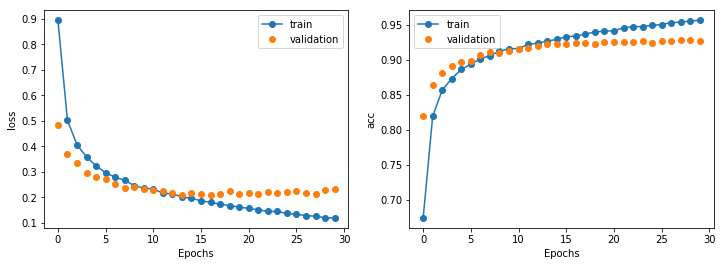

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics), '-o')
    plt.plot(history.history.get(val_metrics), 'o')
    plt.xlabel('Epochs')
    plt.ylabel(train_metrics)
    plt.legend(['train', 'validation'])
    
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_train_history(history, 'loss', 'val_loss')
plt.subplot(1, 2, 2)
plot_train_history(history, 'acc', 'val_acc')


plt.show()

### Evaluation

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.21646865357011558
Test accuracy:  0.9315


### each of classes accuracy 

In [16]:
predicted_classes = model.predict_classes(X_test)

y_true = test_data.iloc[:, 0]
corrects = np.nonzero(predicted_classes == y_true)[0]
incorrects = np.nonzero(predicted_classes != y_true)[0]

In [17]:
from sklearn.metrics import classification_report

target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.89      0.88      0.88      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.94      0.85      0.90      1000
    Class 3       0.95      0.94      0.95      1000
    Class 4       0.87      0.92      0.90      1000
    Class 5       1.00      0.97      0.99      1000
    Class 6       0.78      0.82      0.80      1000
    Class 7       0.96      0.96      0.96      1000
    Class 8       0.99      0.99      0.99      1000
    Class 9       0.96      0.98      0.97      1000

avg / total       0.93      0.93      0.93     10000



### predict correct examples

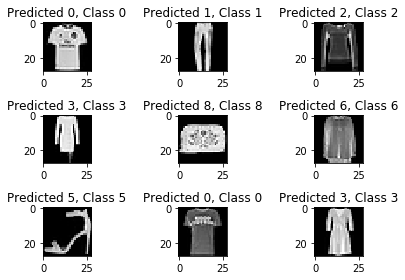

In [18]:
for i, correct in enumerate(corrects[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28),
               cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(
        predicted_classes[correct], y_true[correct]))
    plt.tight_layout()
    
plt.show()
    